### Project Description
#### Background & Context
The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged on every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers’ and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help bank improve their services so that customers do not renounce their credit cards

#### Objective

- Explore and visualize the dataset.
- Build a classification model to predict if the customer is going to churn or not
- Optimize the model using appropriate techniques
- Generate a set of insights and recommendations that will help the bank

#### Data Dictionary
* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np   
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint as sp_randint

#### Loading dataset

In [2]:
dataCC = pd.read_csv('BankChurners.csv')

In [3]:
#taking a copy of the dataset in case we need original data later on
data = dataCC.copy()

#### View first 5 and last 5 rows of the dataset

In [4]:
dataCC.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
0              39  ...                      3       12691.0   
1              44  ...                      2        8256.0   
2              36  ...                      0        3418.0   
3              34  ...                      1        3313.0   
4              21  ...                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Unnamed: 21  
0                  0.061          NaN  
1                  0.105          NaN  
2                  0.000          NaN  
3                  0.760          NaN  
4                  0.000          NaN  

[5 rows x 22 columns]

In [5]:
dataCC.tail()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Contacts_Count_12_mon  Credit_Limit  \
10122              40  ...                      3        4003.0   
10123              25  ...                      3        4277.0   
10124              36  ...                      4        5409.0   
10125              36  ...                      3        5281.0   
10126              25  ...                      4       10388.0   

       Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10122                 1851           2152.0                 0.703   
10123                 2186           2091.0                 0.804   
10124                    0           5409.0                 0.819   
10125                    0           5281.0                 0.535   
10126                 1961           8427.0                 0.703   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10122            15476             117                0.857   
10123             8764              69                0.683   
10124            10291              60                0.818   
10125             8395              62                0.722   
10126            10294              61                0.649   

       Avg_Utilization_Ratio  Unnamed: 21  
10122                  0.462          NaN  
10123                  0.511          NaN  
10124                  0.000          NaN  
10125                  0.000          NaN  
10126                  0.189          NaN  

[5 rows x 22 columns]

#### Checking shape of dataset

In [6]:
dataCC.shape

(10127, 22)

#### Checking data types and number of non-null values for each column

In [7]:
dataCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Insights:
- Dataset has 10127 rows and 22 columns (including unnamed column which can be removed)
- Column 'Unnamed: 21' has all null values and can be dropped from the dataset
- None of the columns seem to have null/missing values except 'Unnamed: 21', which is an empty column 
- The columns are integer, float or object types
- Different features seem to be on different scales

#### NULL (missing value) check

In [8]:
#Just checking null count, even though we saw there are no nulls except for 'Unnamed: 21'
dataCC.isnull().sum().sort_values(ascending=False)

Unnamed: 21                 10127
Avg_Utilization_Ratio           0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
CLIENTNUM                       0
dtype: int64

#### Removing unnamed column

In [9]:
#Since 'Unnamed: 21' is an empty column, it can be dropped
dataCC.drop('Unnamed: 21',axis=1,inplace=True)

In [10]:
#Checking null count and shape again to confirm empty column is dropped
dataCC.isnull().sum().sort_values(ascending=False)

Avg_Utilization_Ratio       0
Months_on_book              0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Total_Relationship_Count    0
Total_Ct_Chng_Q4_Q1         0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
CLIENTNUM                   0
dtype: int64

In [11]:
dataCC.shape

(10127, 21)

- NULL values are not present in the dataset now

#### Number of unique values in each column

In [12]:
dataCC.nunique().sort_values(ascending=False)

CLIENTNUM                   10127
Avg_Open_To_Buy              6813
Credit_Limit                 6205
Total_Trans_Amt              5033
Total_Revolving_Bal          1974
Total_Amt_Chng_Q4_Q1         1158
Avg_Utilization_Ratio         964
Total_Ct_Chng_Q4_Q1           830
Total_Trans_Ct                126
Customer_Age                   45
Months_on_book                 44
Contacts_Count_12_mon           7
Months_Inactive_12_mon          7
Education_Level                 7
Income_Category                 6
Dependent_count                 6
Total_Relationship_Count        6
Card_Category                   4
Marital_Status                  4
Gender                          2
Attrition_Flag                  2
dtype: int64

#### Insights:
- Client Number (CLIENTNUM) is an ID column and won't add value to the model, it can be dropped
- Avg_Open_To_Buy,Credit_Limit,Total_Trans_Amt,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Avg_Utilization_Ratio,
  Total_Ct_Chng_Q4_Q1,Total_Trans_Ct,Customer_Age,Months_on_book seem to have continuos values
- Contacts_Count_12_mon,Months_Inactive_12_mon,Education_Level,Income_Category,Dependent_count,Total_Relationship_Count,
  Card_Category,Marital_Status,Gender,Attrition_Flag seem to be categorical from the number of unique values

In [13]:
#Dropping column CLIENTNUM
dataCC.drop('CLIENTNUM',axis=1,inplace=True)

In [14]:
#Checking shape again to make sure that CLIENTNUM is dropped
dataCC.shape

(10127, 20)

#### Summary of the dataset

In [15]:
#This gives the summary for numeric (int/float) columns
dataCC.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

- Customer_Age ranges from 26 to 73, mean and median are almost same (46), fairly normal distribution
- Dependent_count ranges from 0 to 5, mean and median are almost same (2), fairly normal distribution
- Months_on_book ranges from 13 to 56, not much difference in mean and median
- Total_Relationship_Count ranges from 1 to 6, mean and median are almost same (4)
- Months_Inactive_12_mon ranges from 0 to 6,  mean and median are almost same (2)
- Contacts_Count_12_mon ranges from 0 to 6,  not much difference in mean and median
- Credit_Limit ranges from 1438 to 34516 (a large range), mean way more than median, right skewed data, and there is a big       difference between 75% and max values, which indicates possible outliers towards the right end
- Total_Revolving_Bal ranges from 0 to 2517 (a large range), not a huge difference b/w mean and median, there is some             difference b/w 75% and max, more data points are there b/w 25% and 50%
- Avg_Open_To_Buy ranges from 3 to 34516 (really large range), mean way more than median, right skewed data,and there is a big   difference between 75% and max values, which indicates possible outliers towards the right end
- Total_Amt_Chng_Q4_Q1 ranges from 0 to 3.397, mean and median almost same
- Total_Trans_Amt ranges from 510 to 18484 (a large range), not much difference in mean and median, there is some                 difference b/w 75% and max, possible outliers towards the right end
- Total_Trans_Ct ranges from 10 to 139, not a big difference b/w mean and median
- Total_Ct_Chng_Q4_Q1 ranges from 0 to 3.714, mean and median almost same
- Avg_Utilization_Ratio ranges from 0 to 0.999, mean > median

In [16]:
#This gives the summary for non-numeric (object) columns
dataCC.describe(include=['object']).T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level  10127      7           Graduate  3128
Marital_Status   10127      4            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

- All object columns look like category, from number of unique values
- No null values in these object type columns
- Attrition_Flag, which is our target variable has 2 unique values and record count is more for 'Existing Customer'
- Gender has 2 unique values and record count is more for 'Female'
- Education_Level has 7 unique values and record count is more for 'Graduate'
- Marital_Status has 4 unique values and record count is more for 'Married'
- Income_Category has 6 unique values and record count is more for 'Less than 40K'
- Card_Category has 4 unique values and record count is more for  'Blue'
- We will explore these columns further using univariate and bivariate analysis

#### Checking for duplicate records in the dataset

In [17]:
dataCC.duplicated().sum()

0

- No duplicates found in the dataset

#### Checking the count of each unique category in categorical variables

In [18]:
cat_cols = ['Contacts_Count_12_mon','Months_Inactive_12_mon','Education_Level','Income_Category',
            'Dependent_count','Total_Relationship_Count','Card_Category','Marital_Status','Gender','Attrition_Flag']

for col in cat_cols:
    print(dataCC[col].value_counts())
    print('-'*50)

3    3380
2    3227
1    1499
4    1392
0     399
5     176
6      54
Name: Contacts_Count_12_mon, dtype: int64
--------------------------------------------------
3    3846
2    3282
1    2233
4     435
5     178
6     124
0      29
Name: Months_Inactive_12_mon, dtype: int64
--------------------------------------------------
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
--------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
--------------------------------------------------
3    2732
2    2655
1    1838
4    1574
0     904
5     424
Name: Dependent_count, dtype: int64
--------------------------------------------------
3    2305
4    1912
5    1891
6    1866
2    1243
1     910


- Unique values for 'Number of contacts in last 12 months' are 0,1,2,3,4,5,6. And for 3 contacts in last 12 months, we have       more data points followed by 2
- Unique values for 'Number of months inactive in last 12 months' are 0,1,2,3,4,5,6. And we have more data points for 3           inactive months in last 12 months followed by 2
- Unique values for 'Education Level' are Graduate, High School, Unknown, Uneducated, College, Post-Graduate and Doctorate.
  Unknown seems to be missing value. Data points are more for Graduate followed by High School
- Unique values for 'Income Category' are Less than 40K, 40-60K, 60-80K, 80-120K, 120K+ and Unknown. Again unknown seems to be   missing value. Data points are more for 'Less than 40K' followed by 40-60K
- Unique values for 'Number of dependents' are 0,1,2,3,4,5. Data points are more for 3 dependents followed by 2
- Unique values for 'Total number of products held by the customer' are 1,2,3,4,5,6. Data points are more for 3 products         followed by 4
- 'Card Category' has 4 unique values - Blue, Silver, Gold, Platinum. Blue has more data points, followed by silver
- Married, Single, Divorced, Unknown are unique values in 'Marital Status' feature. 'unknown' looks like missing value. Data     points are more for Married followed by Single
- Female customer data is more compared to Male
- Attrition_Flag which is our target variable seems to be NOT balanced. Existing Customer data (+ve class) is more compared to   Attrited Customers (-ve class). But -ve class is of more focus in this project, since it tries to predict if the customer is   going to churn or not 

In [19]:
#Converting object types to category
for col in dataCC.columns: 
    if dataCC[col].dtype == 'object': 
        dataCC[col] = dataCC[col].astype('category')

- Based on number of unique values, following features have only handful of unique values and can be thought of as categories
- But these features can get more values if the dataset grows and hence going to treat them as numerical when building models

    - Dependent_count
    - Total_Relationship_Count
    - Months_Inactive_12_mon
    - Contacts_Count_12_mon

In [20]:
#checking info() again to see the data types
dataCC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           10127 non-null  category
 5   Marital_Status            10127 non-null  category
 6   Income_Category           10127 non-null  category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

- Reduces memory usuage by converting to category

#### EDA - univariate analysis

#### Univariate analysis for continuous variables using boxplot and histogram

In [21]:
# Function to create boxplot and histogram for any input numerical variable
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

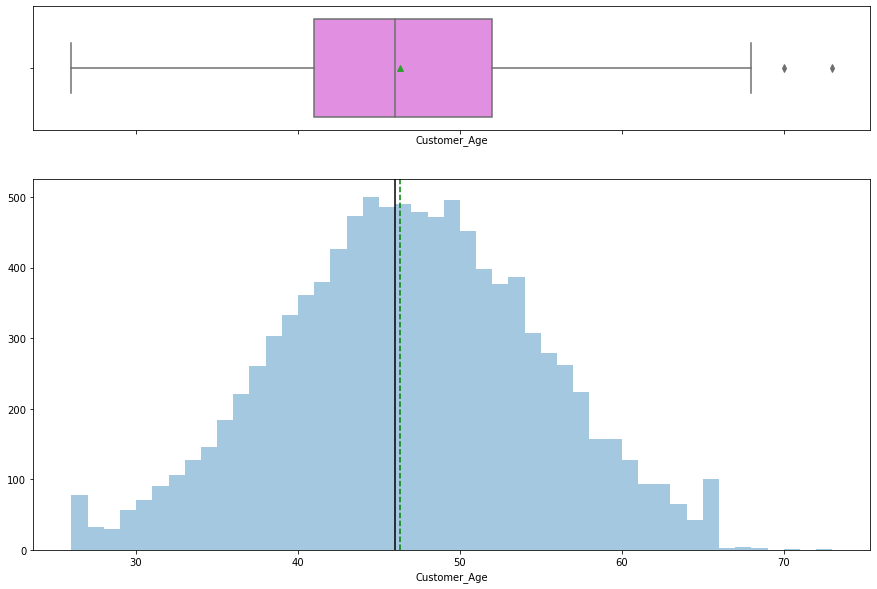

In [22]:
#Customer_Age
histogram_boxplot(dataCC['Customer_Age'])

- Mean and Median are very close to each other
- Fairly normal distribution of data is seen
- There are couple of outliers towards the right end
- We are going to see the outliers next

In [23]:
dataCC[dataCC['Customer_Age'] > 65 ]['Customer_Age'].sort_values(ascending=False)

251    73
254    70
198    68
151    68
432    67
410    67
320    67
177    67
52     66
39     66
Name: Customer_Age, dtype: int64

- Does not look like the two points that we see in boxplot as outliers need to be treated as outliers, since there is not a big   difference between the data point before those two points and these two right most points.

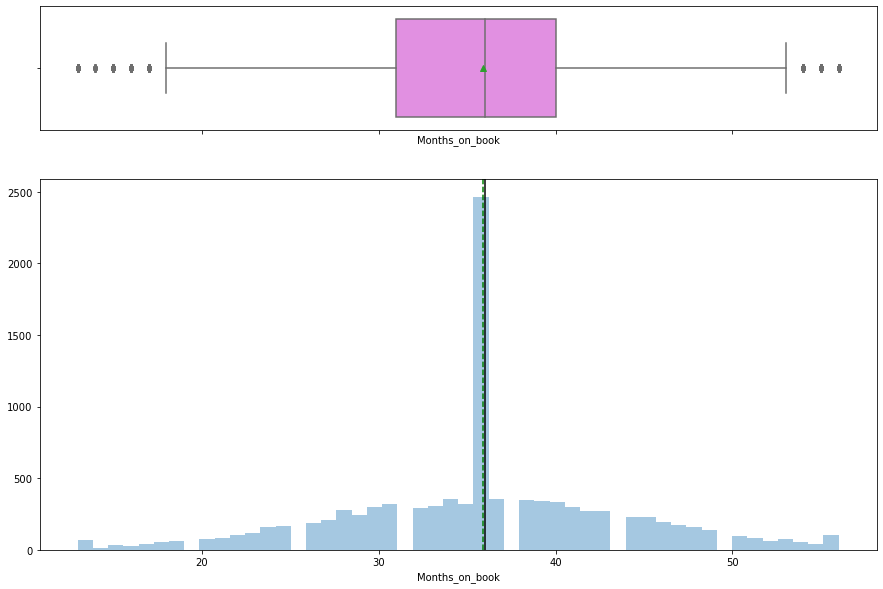

In [24]:
#Months_on_book
histogram_boxplot(dataCC['Months_on_book'])

- Mean and Median are almost the same
- Except for the peak between 30 and 40, it shows a fairly uniform distribution
- Boxplot shows couple of outliers on both the left and right end
- Let us see if these are outliers that need to be considered as outliers

In [25]:
dataCC[dataCC['Months_on_book'] >= 50 ]['Months_on_book'].sort_values(ascending=False)

552      56
388      56
5362     56
3507     56
1330     56
         ..
1232     50
1238     50
1241     50
4732     50
10121    50
Name: Months_on_book, Length: 514, dtype: int64

In [26]:
dataCC[dataCC['Months_on_book'] < 20 ]['Months_on_book'].sort_values(ascending=True)

514     13
3757    13
1748    13
3841    13
4241    13
        ..
5346    19
5168    19
4837    19
4683    19
6275    19
Name: Months_on_book, Length: 309, dtype: int64

- Does not look like the points that we see in boxplot as outliers need to be treated as outliers, since there is not a big difference between the data point before/after those points and these outlier points.

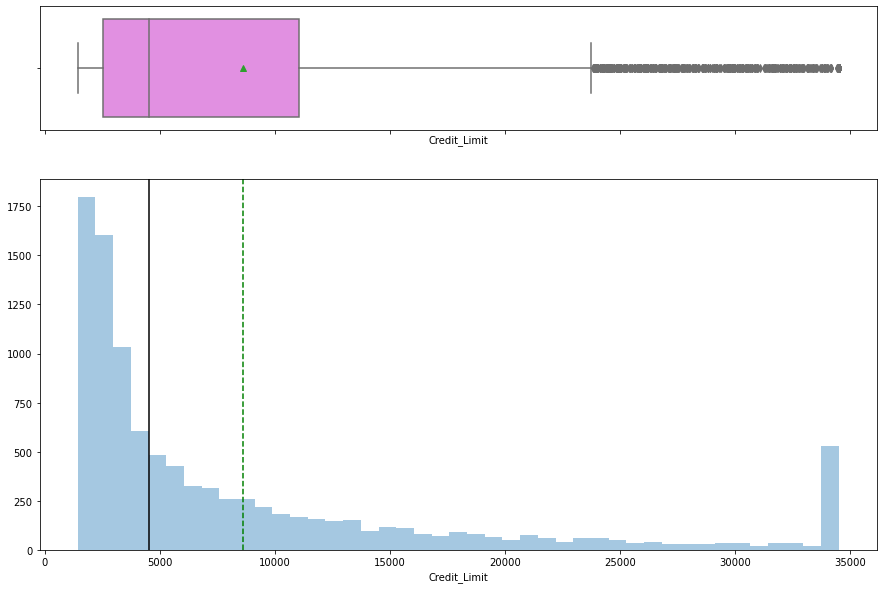

In [27]:
#Credit_Limit
histogram_boxplot(dataCC['Credit_Limit'])

- Mean way more than median and the data is right skewed
- From the boxplot, we can see that there are lot of outliers towards the right end
- There is a big difference between 75% and the max data points too
- We are going to see the outliers separely

In [28]:
dataCC[dataCC['Credit_Limit'] > 25000 ]['Credit_Limit'].sort_values(ascending=False)

10112    34516.0
4280     34516.0
4378     34516.0
4355     34516.0
4348     34516.0
          ...   
1293     25058.0
4452     25045.0
2152     25033.0
3933     25027.0
2022     25008.0
Name: Credit_Limit, Length: 892, dtype: float64

- Some variation is always expected in real world scenarios for the income variable and here the right most end data points are       many, they are not completely standing out from the rest of the data.
- So it does not look like data entry errors and need not be removed

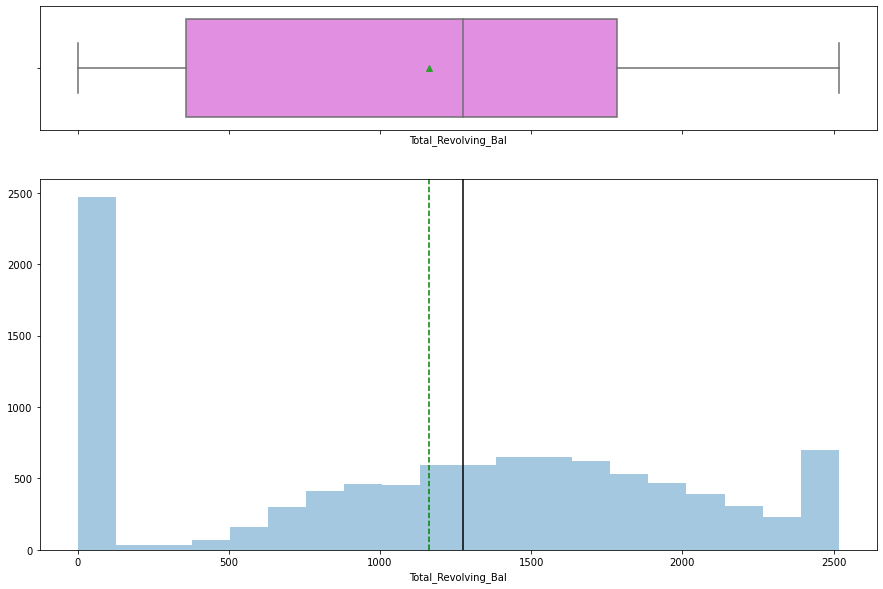

In [29]:
#Total_Revolving_Bal
histogram_boxplot(dataCC['Total_Revolving_Bal'])

- Slightly left skewed, except for the peak at the lowest end
- Mean and Median are not much different
- Most of the data is concentrated b/w 25% and median
- Boxplot does not show any outliers

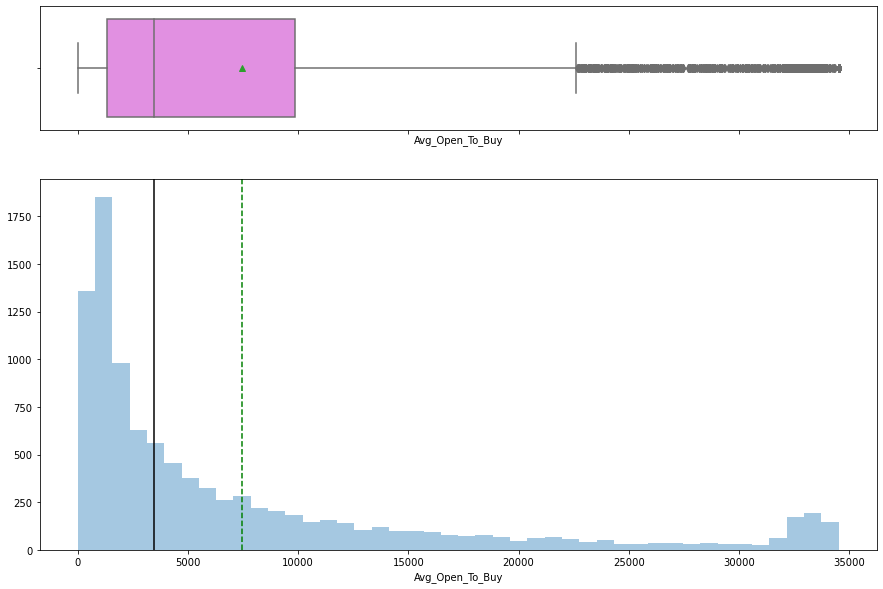

In [30]:
#Avg_Open_To_Buy
histogram_boxplot(dataCC['Avg_Open_To_Buy'])

- Right skewed data distribution
- Boxplot shows outliers towards the right end of the distribution
- Most data points are towards the lower end of the distribution, which is kind of expected in real world scenarios as the       spending will be more
- Let us check the outliers to see if there are any unusual data points

In [31]:
dataCC[dataCC['Credit_Limit'] >= 30000 ]['Credit_Limit'].sort_values(ascending=False)

10112    34516.0
3834     34516.0
3989     34516.0
3988     34516.0
3888     34516.0
          ...   
3037     30137.0
8985     30117.0
9990     30082.0
2630     30030.0
1516     30011.0
Name: Credit_Limit, Length: 667, dtype: float64

- There are many data points for the value '34516' itself, which is the max value
- Since these are not standing out from the rest of the data, this does not look like data entry errors and need not be removed

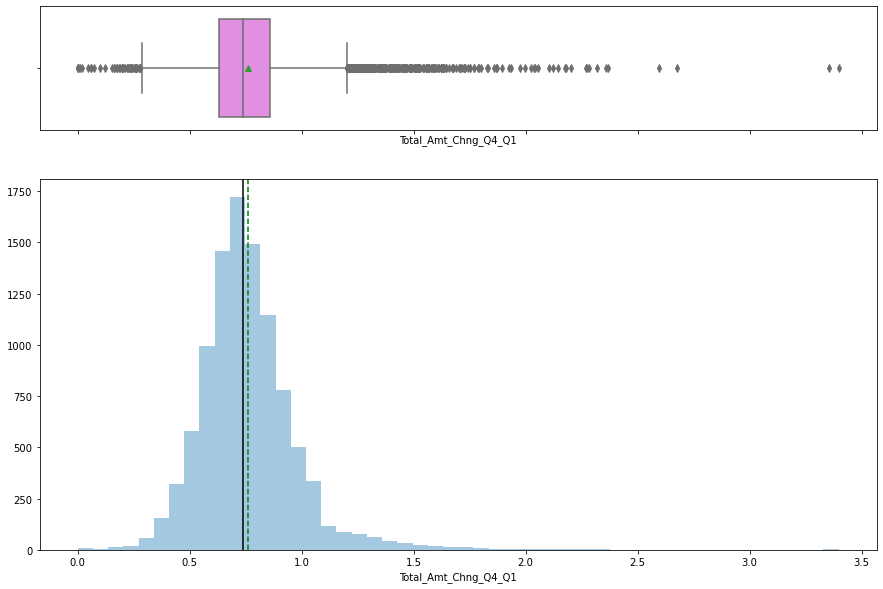

In [32]:
#Total_Amt_Chng_Q4_Q1
histogram_boxplot(dataCC['Total_Amt_Chng_Q4_Q1'])

- Mean and Median almost same
- The distribution is fairly normal, if we don't consider the outliers
- Many outliers both at the left and right ends
- Let us check the outliers

In [33]:
dataCC[dataCC['Total_Amt_Chng_Q4_Q1'] > 2.0 ]['Total_Amt_Chng_Q4_Q1'].sort_values(ascending=False)

12      3.397
8       3.355
773     2.675
2       2.594
219     2.368
47      2.357
46      2.316
658     2.282
58      2.275
466     2.271
7       2.204
841     2.180
4       2.175
284     2.145
154     2.121
1219    2.103
177     2.053
1085    2.041
1873    2.037
431     2.023
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

In [34]:
dataCC[dataCC['Total_Amt_Chng_Q4_Q1'] < 0.2 ]['Total_Amt_Chng_Q4_Q1'].sort_values(ascending=True)

3596     0.000
4417     0.000
4701     0.000
7998     0.000
7207     0.000
7165     0.010
4184     0.018
7761     0.046
5161     0.061
6484     0.061
9567     0.072
8398     0.101
4443     0.120
1905     0.153
6083     0.163
10119    0.166
9136     0.175
3555     0.176
5874     0.183
4730     0.187
9307     0.196
7330     0.198
Name: Total_Amt_Chng_Q4_Q1, dtype: float64

- There are 2 data points greater than 3.0 and are part of the outliers at the right end
- There are 5 data points that are 0.0 and are part of the outliers at the left end
- These are not standing out from rest of the values and hence need not be removed
- There can be variations in change in transaction amount in real world scenarios too

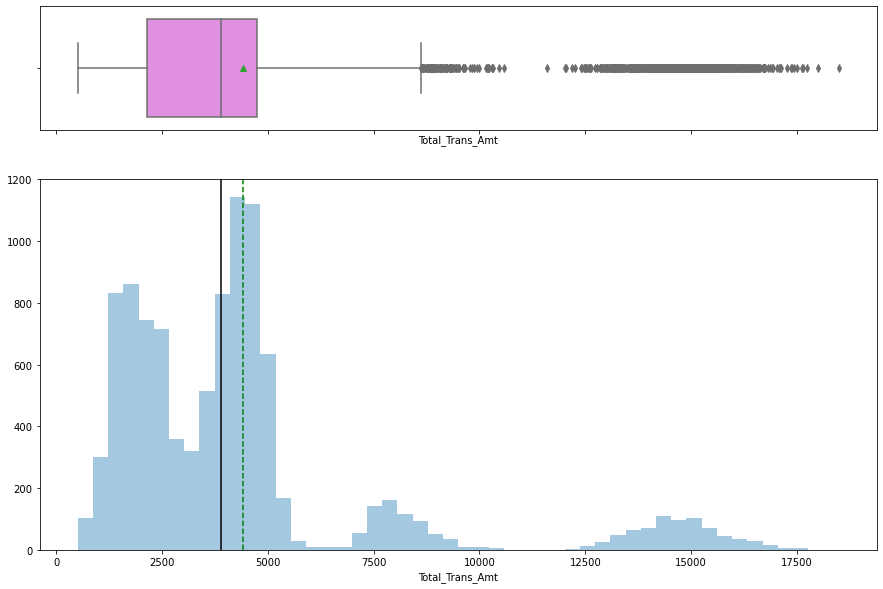

In [35]:
#Total_Trans_Amt
histogram_boxplot(dataCC['Total_Trans_Amt'])

- Right skewed data distribution, with lot of outliers towards the right end
- There is significant difference b/w 75% and max data points, most of the data points concentrated at the lower end
- It is good to notice that there are no data points with 0 transaction amount

In [36]:
dataCC[(dataCC['Total_Trans_Amt'] > 7500) & (dataCC['Total_Trans_Amt'] < 10000) ]['Total_Trans_Amt'].sort_values(ascending=False)

9877     9980
10098    9931
9975     9867
9695     9865
9797     9819
         ... 
8823     7512
8851     7510
8667     7509
8937     7508
9483     7507
Name: Total_Trans_Amt, Length: 557, dtype: int64

In [37]:
dataCC[(dataCC['Total_Trans_Amt'] > 12500) & (dataCC['Total_Trans_Amt'] < 17000) ]['Total_Trans_Amt'].sort_values(ascending=False)

10053    16937
10061    16920
9746     16908
9876     16856
9819     16824
         ...  
9196     12592
9366     12576
9794     12575
8968     12535
9208     12510
Name: Total_Trans_Amt, Length: 723, dtype: int64

- There are lot of data points in these outliers and does not seem to be data entry errors
- And in real world scenario too total transactiom amount can vary
- Hence deciding to keep the outliers

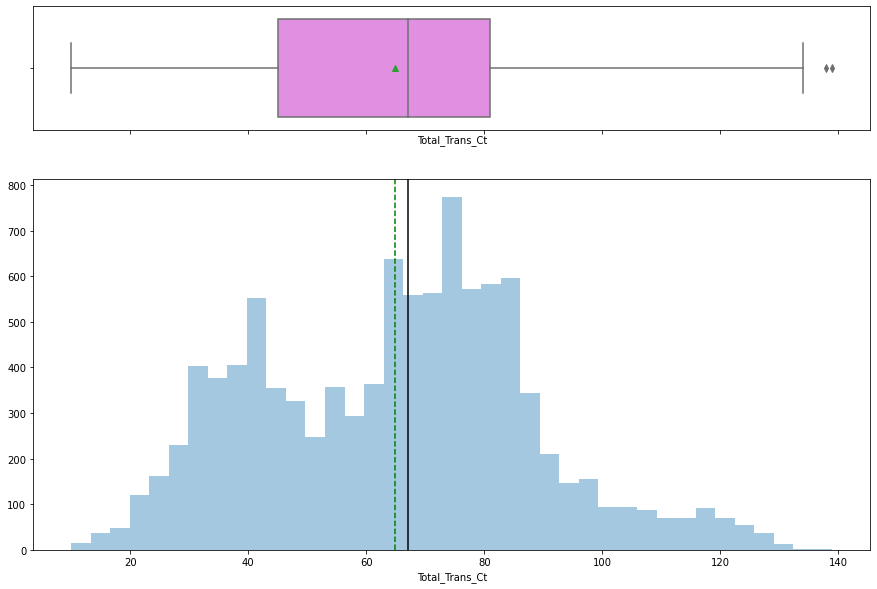

In [38]:
#Total_Trans_Ct
histogram_boxplot(dataCC['Total_Trans_Ct'])

- Mean and Median are almost close to each other
- Except for some peaks, the distribution is fairly normal
- Boxplot shows couple of outliers at the right end

In [39]:
dataCC[dataCC['Total_Trans_Ct'] > 135 ]['Total_Trans_Ct'].sort_values(ascending=False)

9324    139
9586    138
Name: Total_Trans_Ct, dtype: int64

- These are not really standing out from the rest of the data
- Deciding to keep the points and not removing them

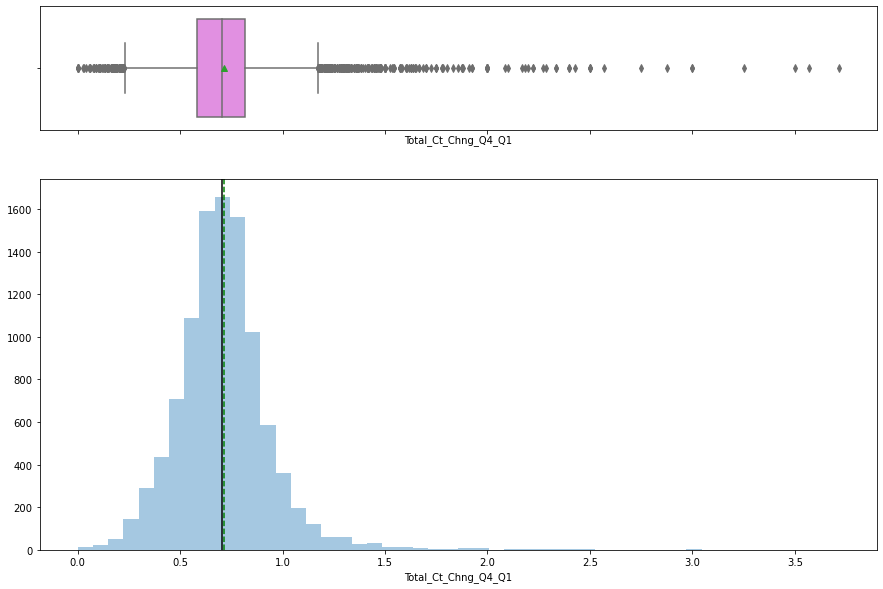

In [40]:
#Total_Ct_Chng_Q4_Q1
histogram_boxplot(dataCC['Total_Ct_Chng_Q4_Q1'])

- Mean and Median almost same
- The distribution is fairly normal, if we don't consider the outliers
- Many outliers both at the left and right ends
- Let us check the outliers

In [41]:
dataCC[dataCC['Total_Ct_Chng_Q4_Q1'] > 2.0 ]['Total_Ct_Chng_Q4_Q1'].sort_values(ascending=False)

1       3.714
773     3.571
269     3.500
12      3.250
190     3.000
113     3.000
146     2.875
366     2.750
30      2.571
4       2.500
2510    2.500
805     2.500
158     2.429
280     2.400
68      2.400
3       2.333
2       2.333
167     2.286
239     2.273
1095    2.222
757     2.222
131     2.200
91      2.182
162     2.167
309     2.100
294     2.083
Name: Total_Ct_Chng_Q4_Q1, dtype: float64

In [42]:
dataCC[dataCC['Total_Ct_Chng_Q4_Q1'] < 0.2 ]['Total_Ct_Chng_Q4_Q1'].sort_values(ascending=True)

4417    0.000
7998    0.000
7207    0.000
3596    0.000
4701    0.000
        ...  
1818    0.190
7803    0.192
7948    0.194
802     0.194
836     0.194
Name: Total_Ct_Chng_Q4_Q1, Length: 66, dtype: float64

- There are many data points at the left and right ends
- Since these are not standing out from the rest of the data, this does not look like data entry errors and need not be removed

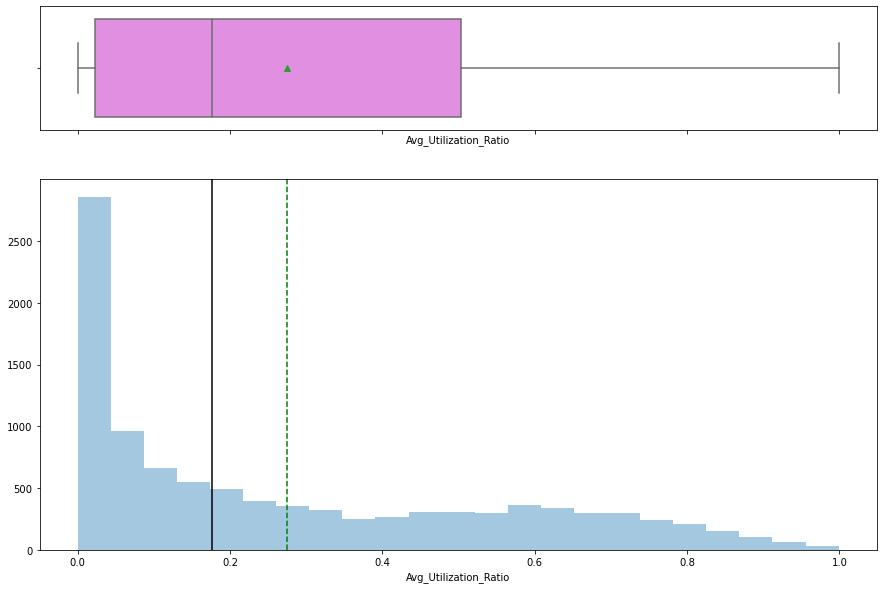

In [43]:
#Avg_Utilization_Ratio
histogram_boxplot(dataCC['Avg_Utilization_Ratio'])

- Mean is greater than Median and it is right skewed data
- There are no outliers
- More data points are below 0.2, which means the avg utilization is really low

#### Univariate analysis for categorical variables using bar charts

In [44]:
#Function to plot barchart with percentage for categorical variables

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=feature, data=dataCC)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.25 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

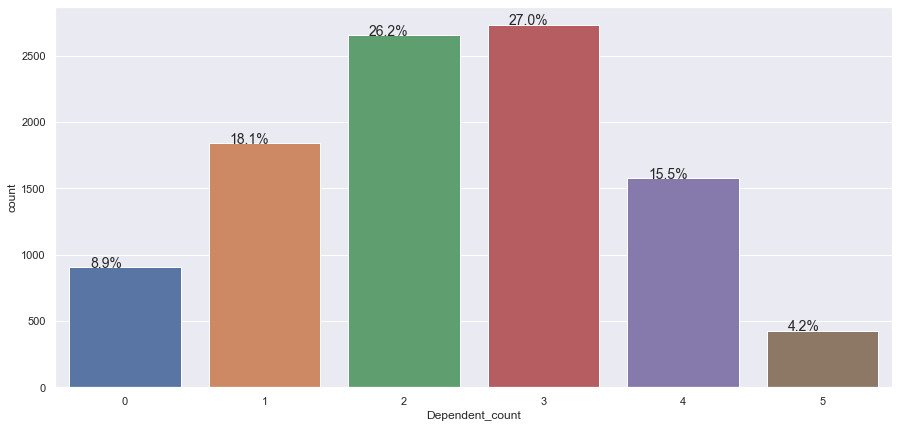

In [45]:
#Dependent_count
perc_on_bar(dataCC['Dependent_count'])

- Highest number of data points are for number of dependents 3, followed by 2
- Number of dependents 5 and no dependents have less data volume

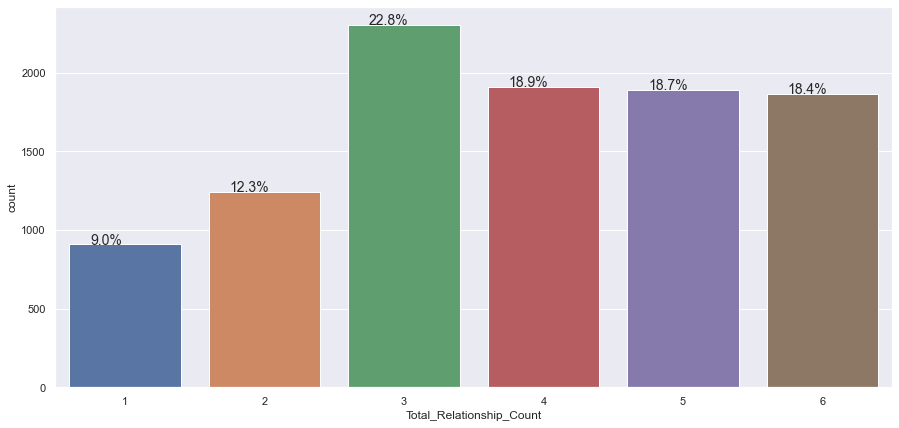

In [46]:
#Total_Relationship_Count
perc_on_bar(dataCC['Total_Relationship_Count'])

- Most data points are for number of products 3
- Number of proucts 4,5 and 6 have almost same data volume
- Number of products 2,1 have less data volume

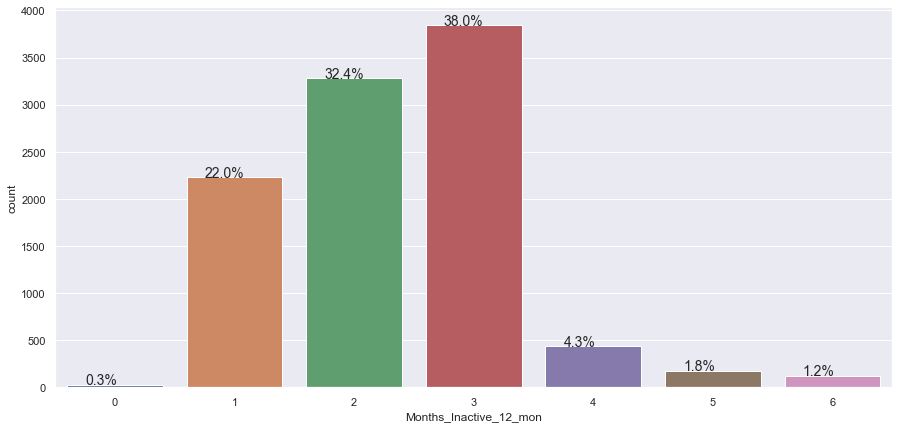

In [47]:
#Months_Inactive_12_mon
perc_on_bar(dataCC['Months_Inactive_12_mon'])

- Most data points are for number of months inactive 3 , followed by 2 and 1
- Data points are less for number of inactive months 4,5 and 6 which could mean more credit card usage

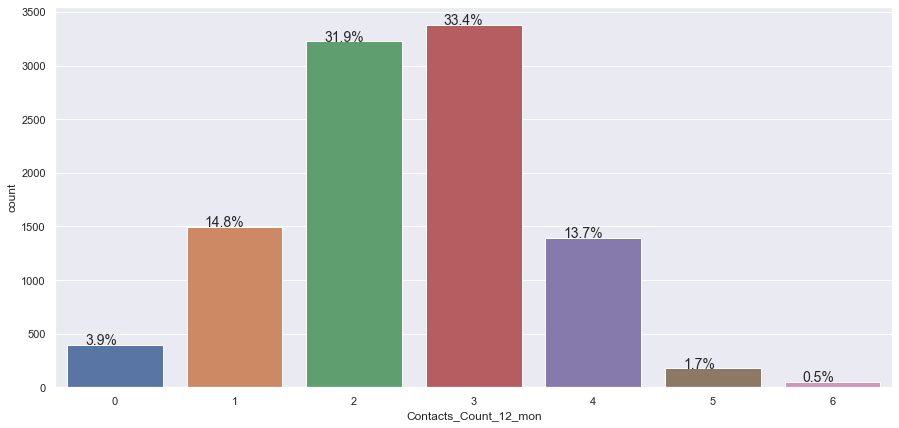

In [48]:
#Contacts_Count_12_mon
perc_on_bar(dataCC['Contacts_Count_12_mon'])

- Number of obsevations are high for number of contacts (number of times bank contacted the customer) 3, followed by 2
- Number of obsevations are low for higher number of contacts

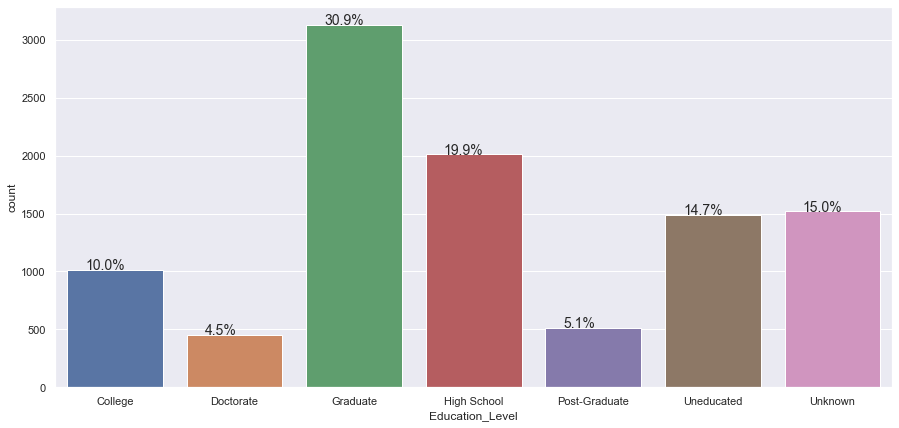

In [49]:
#Education_Level
perc_on_bar(dataCC['Education_Level'])

- Number of observations are more for Graduate level followed by High School
- Unknown has 15% data points, this could be missing values and can be imputed later on

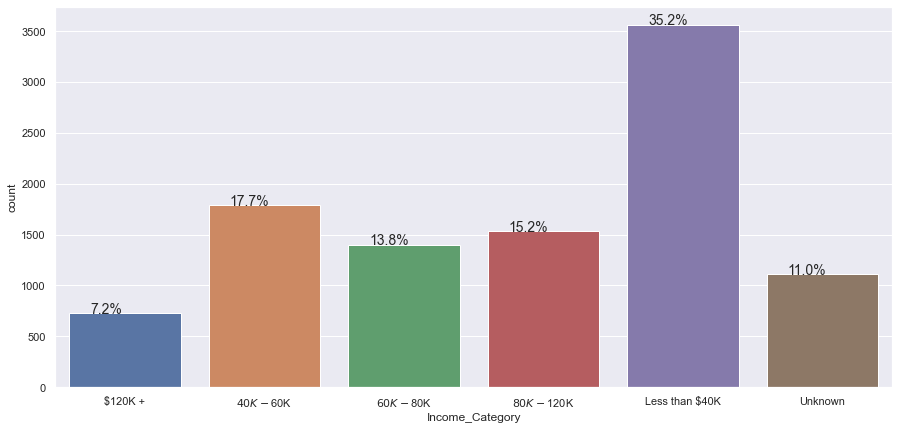

In [50]:
#Income_Category
perc_on_bar(dataCC['Income_Category'])

- Data points are highest for income category Less than 40K, followed by 40-60K
- Income category 120K + has less observations
- Unknown could be missing data and can be imputed later on

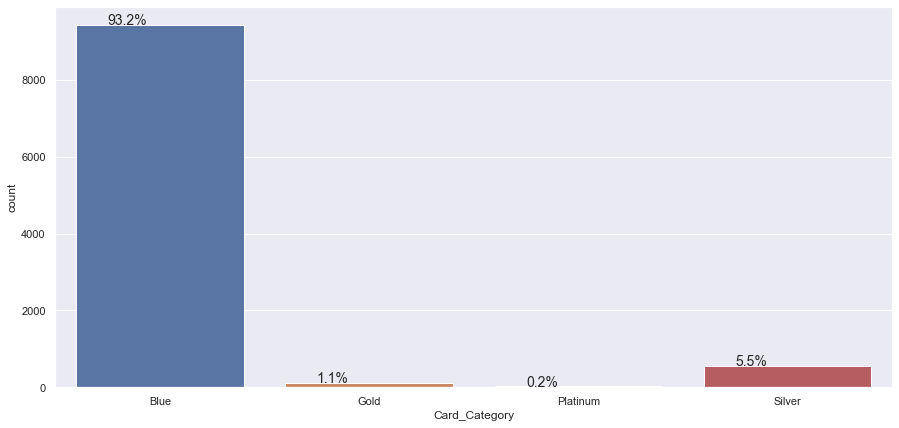

In [51]:
#Card_Category
perc_on_bar(dataCC['Card_Category'])

- 93% of observations are for card category Blue
- Silver has 5% and other categories have minimal data points

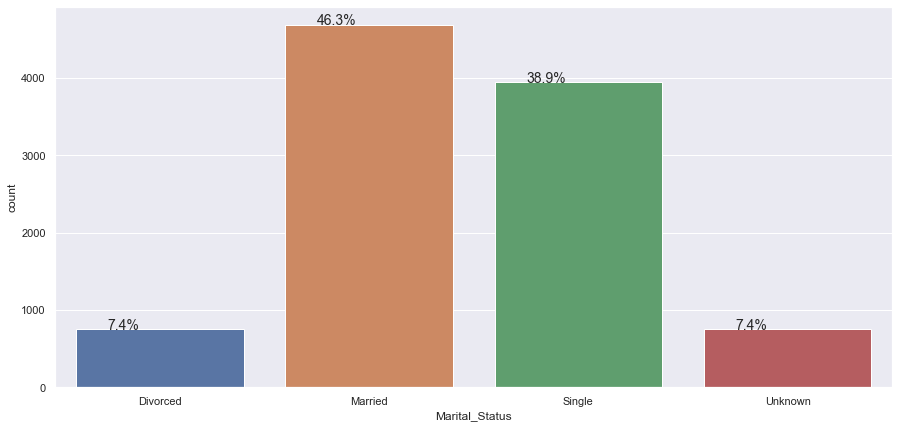

In [52]:
#Marital_Status
perc_on_bar(dataCC['Marital_Status'])

- Number of observations for Married is the highest, followed by Single
- Unknown marital status could be missing value and can be imputed later on

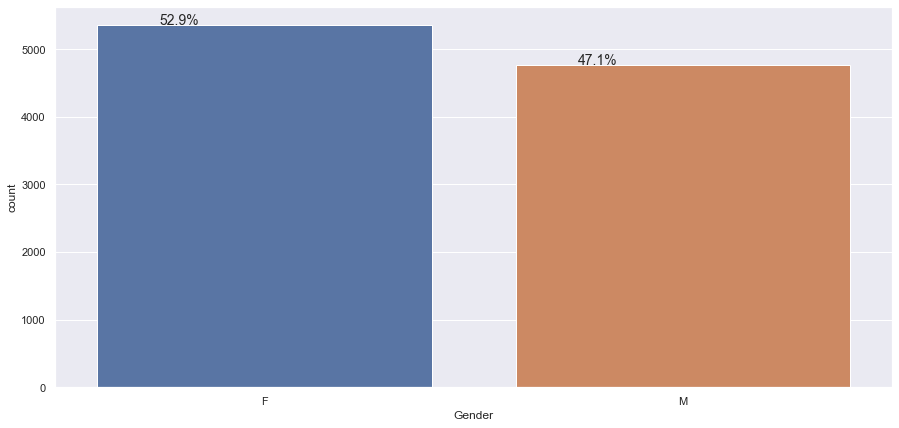

In [53]:
#Gender
perc_on_bar(dataCC['Gender'])

- Number of observations slightly more for Female, but not much difference

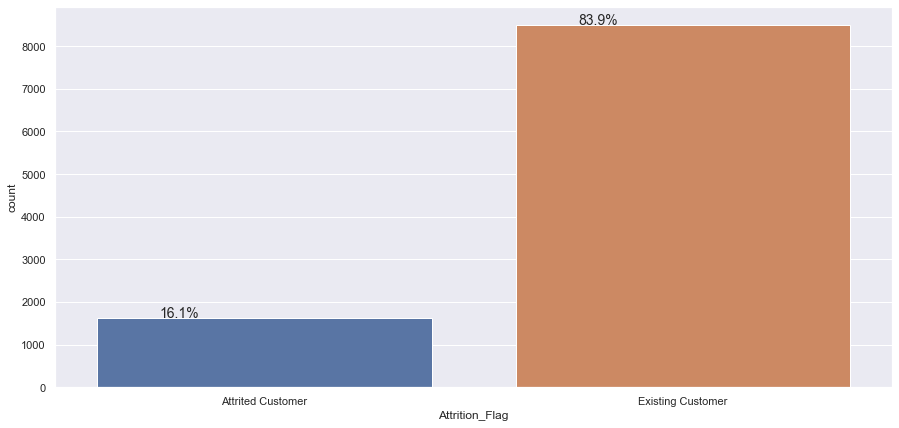

In [54]:
#Attrition_Flag
perc_on_bar(dataCC['Attrition_Flag'])

- This is our target variable, which is not balanced
- Class of interest for this problem statement is 'Attrited Customer' and that class has less data volume (16%)

#### EDA - Bivariate Analysis

- To see target variable Attrition_Flag in heatmap, converting it to numeric
- But for the rest of the analysis, it is more readable to keep it as category and hence will revert it back after heatmap and pairplot analysis is done

In [55]:
#Converting Attrition_Flag to 1 and 0 and chaging to integer
attrition = {'Existing Customer':0, 'Attrited Customer':1}
dataCC['Attrition_Flag']=dataCC['Attrition_Flag'].map(attrition)

dataCC['Attrition_Flag'] = dataCC['Attrition_Flag'].astype('int64')

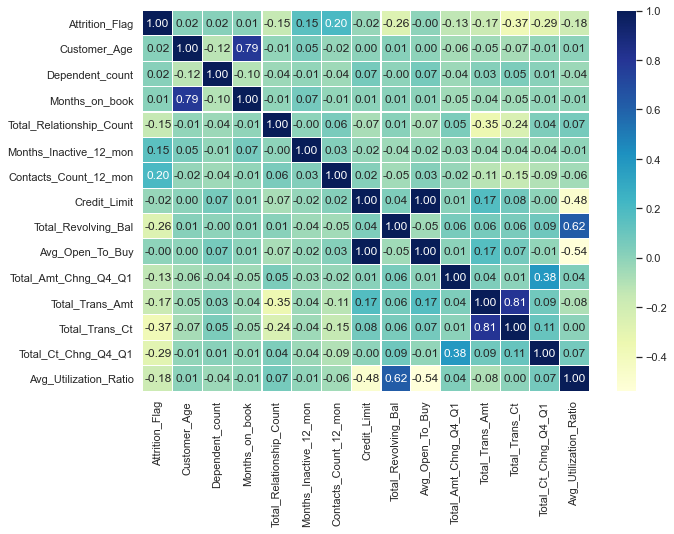

In [56]:
#Heatmap to visualize the relationship between non-categorical variables
fig, ax = plt.subplots(figsize=(10,7));
sns.heatmap(dataCC.corr(),annot=True,linewidths=0.1,cmap='YlGnBu',fmt='.2f');

- Customer_Age and Months_on_book (period of relationship with the bank) have strong +ve correlation
- Credit_Limit has strong +ve correlation with Avg_Open_To_Buy (Avg open to buy credit limit). Both these features shows 100%     correlation, becuase when credit limit goes up, the open to buy credit line also goes up, which is expected
- Credit_limit has -ve correlation with Avg_utilization_ratio, which shows with increase in credit limit the usage is not         increasing
- Avg_utilization_ratio has -ve correlation with Avg_Open_to_buy (Avg open to buy credit limit), which shows with increase   in   the usage, open to buy credit line decreases
- Total_Revolving_Bal has strong +ve correlation with Avg_utilization_ratio, which is expected, with more usage of card,         revolving balance goes up
- Total_Amt_Chng_Q4_Q1 (Change in transaction amount) has some +ve correlation with Total_Ct_Chng_Q4_Q1 (change in transaction   count), which is expected, since both these features are inter-related
-  Total_Trans_Amt (Total transaction amount) has some +ve correlation with Total_Trans_Ct (Total transaction count),
   which is expected, since both these features are inter-related
- Target variable "Attrition_Flag" is impacted by these features
    - with increase in number of contacts b/w bank and customer, attrition increases
    - with increase in number of inactive months, attrition increases
    - with increase in number of products held by customer, attrition decreases
    - with increase in total revolving balance, attrition decreases
    - with increase in Change in Transaction Amount (Q4 over Q1), attrition decreases
    - with increase in Change in Transaction Count (Q4 over Q1), attrition decreases
    - with increase in Total Transaction Count, attrition decreases
    - with increase in Total Transaction Amount, attrition decreases
    - with increase in Average Card Utilization Ratio, attrition decreases

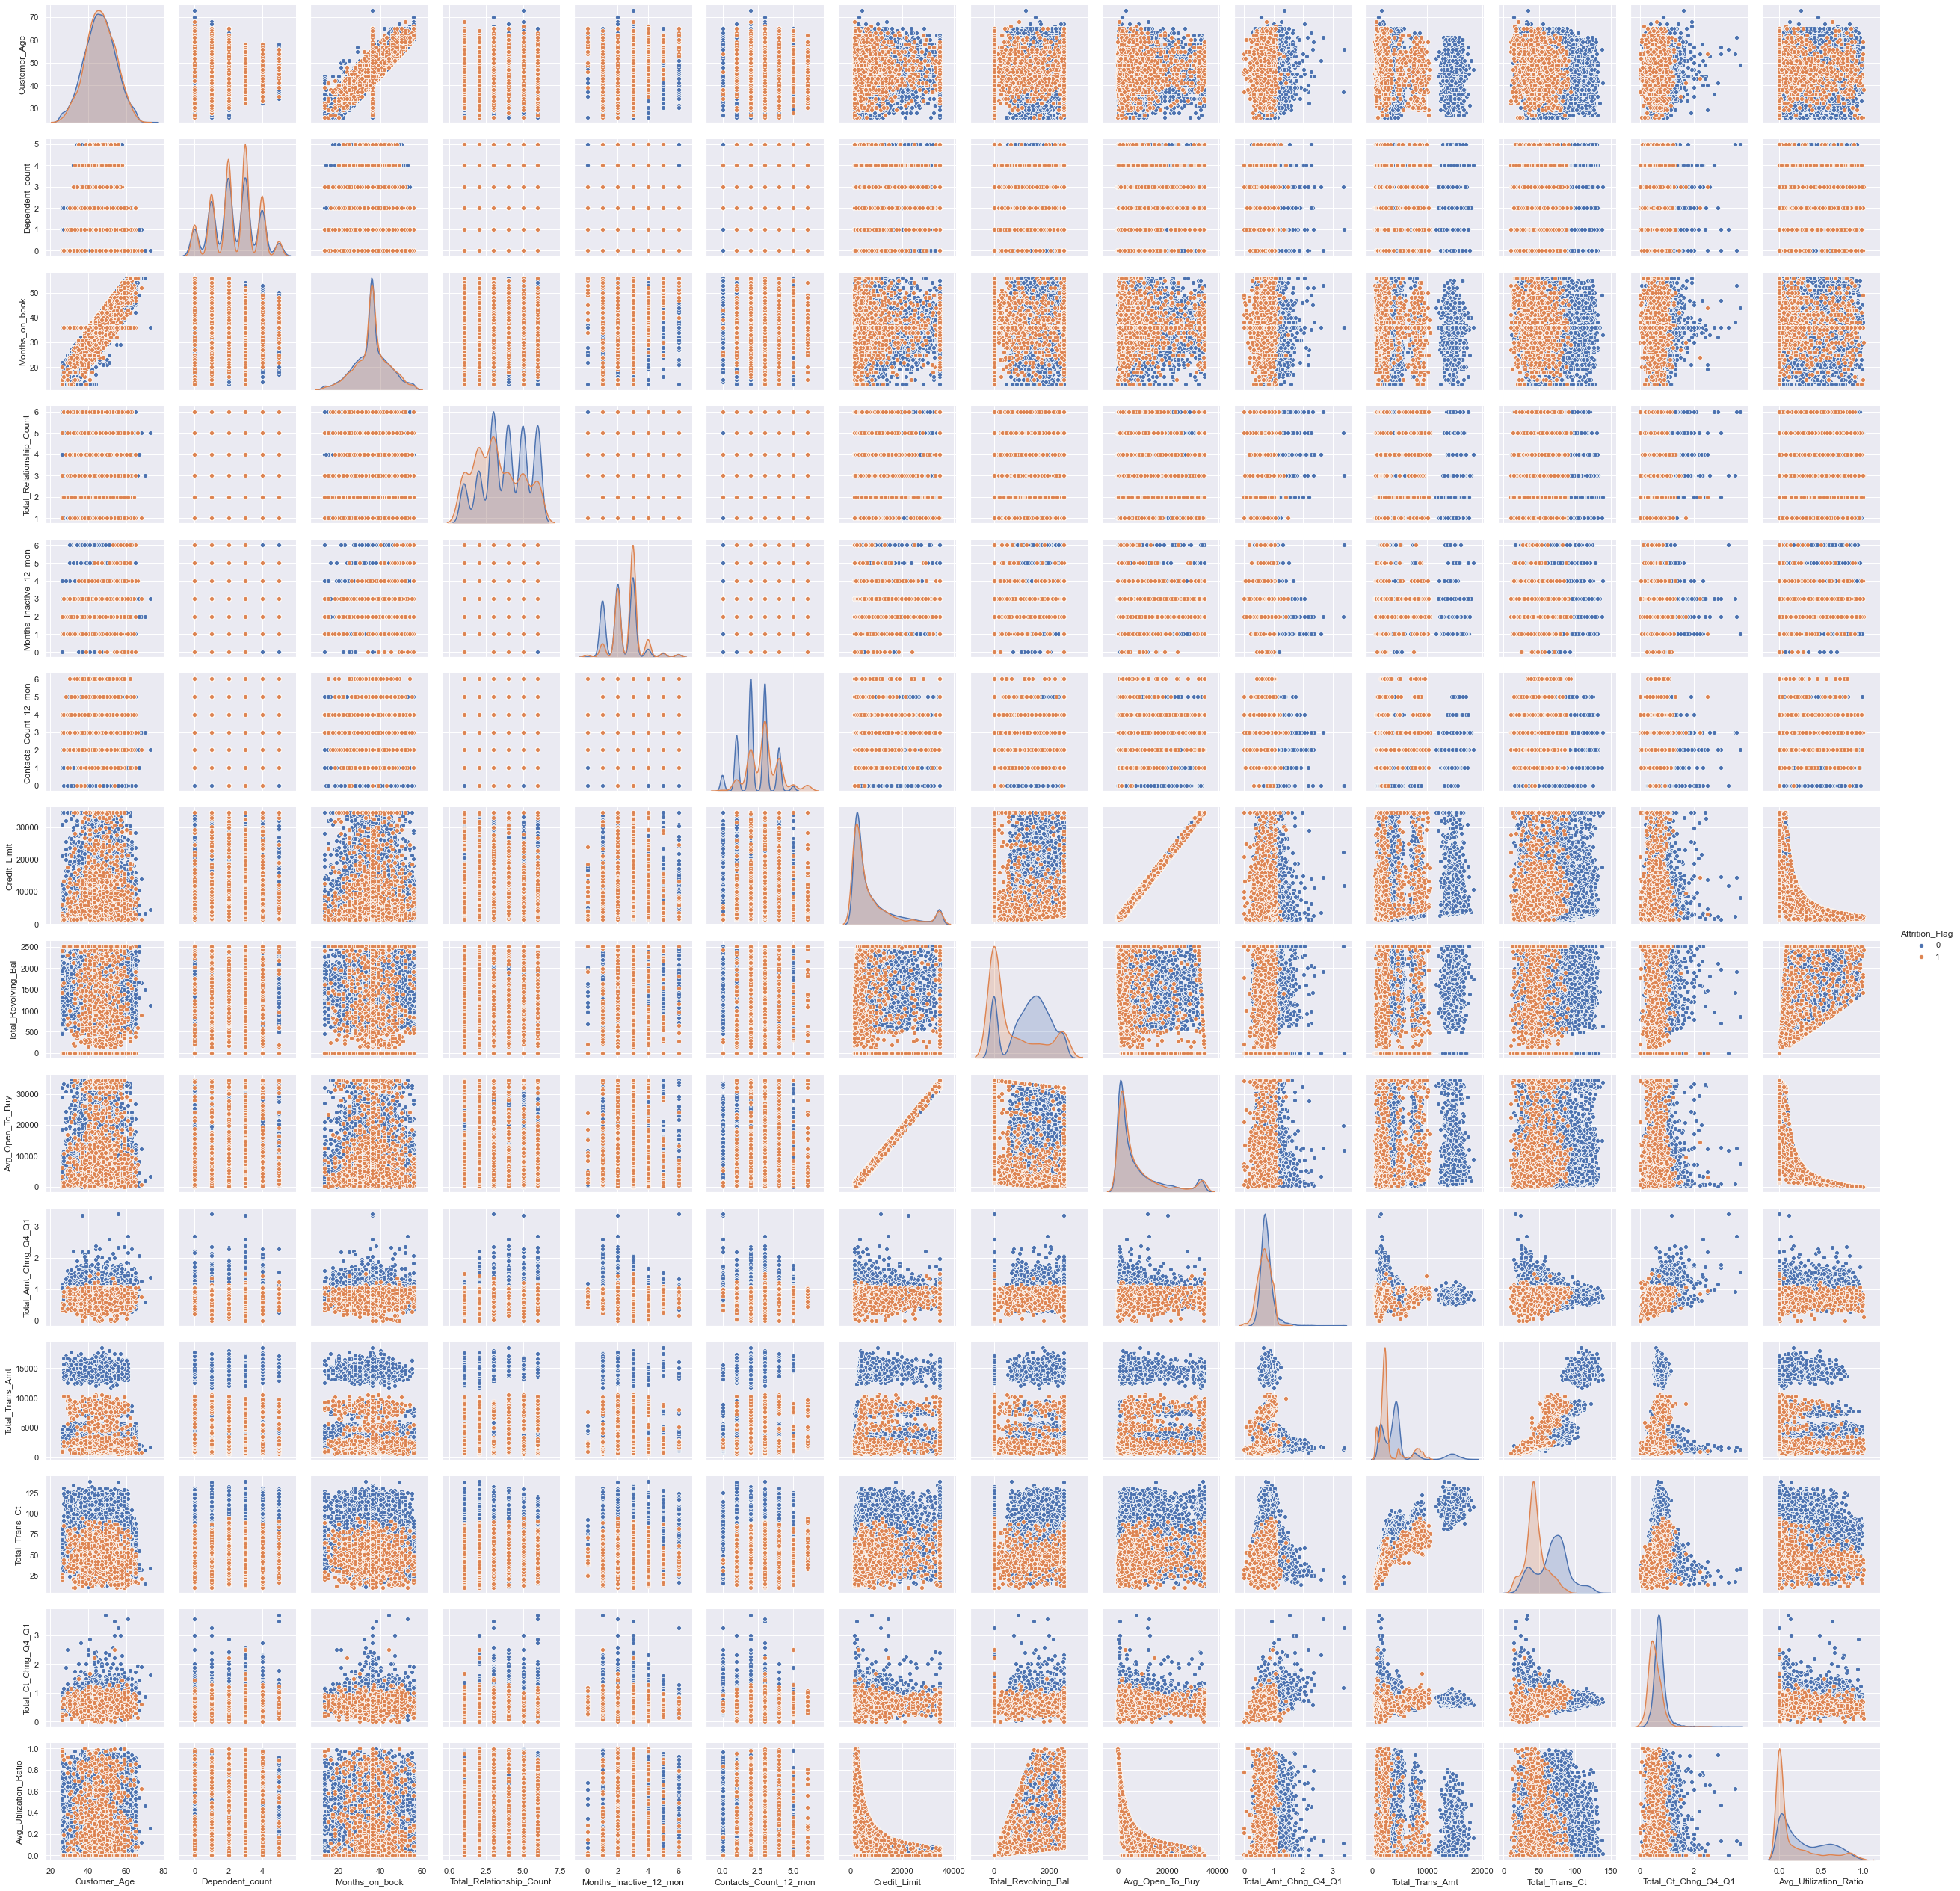

In [57]:
#Pairplot for the dataset
sns.pairplot(data=dataCC, hue='Attrition_Flag');

- Pairplot also shows the same relationsships b/w variables that we saw in heatmap
- It clearly shows there are very less data points for 'Attrited Customer'

In [58]:
#Converting Attrition_Flag back to original values and type category
attrition = {0:'Existing Customer', 1:'Attrited Customer'}
dataCC['Attrition_Flag']=dataCC['Attrition_Flag'].map(attrition)

dataCC['Attrition_Flag'] = dataCC['Attrition_Flag'].astype('category')

In [59]:
#Bivariate Analysis - let us look at how target variable (Attrition_Flag) is distributed amongst continuous variables
numeric_cols = ['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio','Attrition_Flag']
dataCC[numeric_cols].groupby(['Attrition_Flag']).mean()

Customer_Age  Months_on_book  Credit_Limit  \
Attrition_Flag                                                  
Attrited Customer     46.659496       36.178242   8136.039459   
Existing Customer     46.262118       35.880588   8726.877518   

                   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                                  
Attrited Customer           672.822987      7463.216472              0.694277   
Existing Customer          1256.604118      7470.273400              0.772510   

                   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                            
Attrited Customer      3095.025814       44.933620             0.554386   
Existing Customer      4654.655882       68.672588             0.742434   

                   Avg_Utilization_Ratio  
Attrition_Flag                            
Attrited Customer               0.162475  
Existing Customer               0.296412

In [60]:
dataCC[numeric_cols].groupby(['Attrition_Flag']).median()

Customer_Age  Months_on_book  Credit_Limit  \
Attrition_Flag                                                  
Attrited Customer            47              36        4178.0   
Existing Customer            46              36        4643.5   

                   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
Attrition_Flag                                                                  
Attrited Customer                    0           3488.0                 0.701   
Existing Customer                 1364           3469.5                 0.743   

                   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
Attrition_Flag                                                            
Attrited Customer             2329              43                0.531   
Existing Customer             4100              71                0.721   

                   Avg_Utilization_Ratio  
Attrition_Flag                            
Attrited Customer                  0.000  
Existing Customer                  0.211

- When we see mean and median of continuos variables with respect to the target variable, following features seem to have no     major difference between the two categories (attrited and existing customers). 
        Customer_Age
        Months_on_book
        Credit_Limit (has slight diff, but not much)
        Avg_Open_To_Buy
        Total_Amt_Chng_Q4_Q1
        Total_Ct_Chng_Q4_Q1
- It could be becuase these variables are not impacting the attrition, we will analyze further and see the feature     importance after building the model to arrive at a final conclusion
- Total_Revolving_Bal (balance that carries over month to month)  seems to be higher for existing customers, this could be because of the data imbalance b/w the two classes
- Total_Trans_Amt and Total_Trans_Ct seem to be higher for existing customers, this could be because of the data imbalance b/w the two classes
- Avg_Utilization_Ratio or usage of card seems to be high for existing customers,this could be because of the data imbalance b/w the two classes

In [61]:
#Bivariate Analysis - let us look at how target variable (Attrition_Flag) is distributed amongst categorical variables
pd.crosstab(dataCC['Dependent_count'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag   Attrited Customer  Existing Customer
Dependent_count                                      
0                         0.149336           0.850664
1                         0.146355           0.853645
2                         0.157062           0.842938
3                         0.176428           0.823572
4                         0.165184           0.834816
5                         0.150943           0.849057

- Dependent count does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be same across multiple values of dependent count

In [62]:
pd.crosstab(dataCC['Total_Relationship_Count'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag            Attrited Customer  Existing Customer
Total_Relationship_Count                                      
1                                  0.256044           0.743956
2                                  0.278359           0.721641
3                                  0.173536           0.826464
4                                  0.117678           0.882322
5                                  0.120042           0.879958
6                                  0.105038           0.894962

- This seem to have an impact on the target variable
- As number of products held by customers increase, % decrease in attrited customers and % of existing customers increase

In [63]:
pd.crosstab(dataCC['Months_Inactive_12_mon'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag          Attrited Customer  Existing Customer
Months_Inactive_12_mon                                      
0                                0.517241           0.482759
1                                0.044783           0.955217
2                                0.153870           0.846130
3                                0.214769           0.785231
4                                0.298851           0.701149
5                                0.179775           0.820225
6                                0.153226           0.846774

- When number of inactive months is '0', the % of Attrited customers is almost same as existing customers
- When number of inactive months is more, there is some increase in % attrition

In [64]:
pd.crosstab(dataCC['Contacts_Count_12_mon'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag         Attrited Customer  Existing Customer
Contacts_Count_12_mon                                      
0                               0.017544           0.982456
1                               0.072048           0.927952
2                               0.124884           0.875116
3                               0.201479           0.798521
4                               0.226293           0.773707
5                               0.335227           0.664773
6                               1.000000           0.000000

- This feature seem to have an impact on the target variable
- When the number of contacts increases, attrition rate also seems to increase. For the highest value of number of contacts,     attrition is 100%

In [65]:
pd.crosstab(dataCC['Education_Level'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag   Attrited Customer  Existing Customer
Education_Level                                      
College                   0.152024           0.847976
Doctorate                 0.210643           0.789357
Graduate                  0.155691           0.844309
High School               0.152012           0.847988
Post-Graduate             0.178295           0.821705
Uneducated                0.159381           0.840619
Unknown                   0.168532           0.831468

- Education Level does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be same across different education levels

In [66]:
pd.crosstab(dataCC['Income_Category'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag   Attrited Customer  Existing Customer
Income_Category                                      
$120K +                   0.173315           0.826685
$40K - $60K               0.151397           0.848603
$60K - $80K               0.134807           0.865193
$80K - $120K              0.157655           0.842345
Less than $40K            0.171862           0.828138
Unknown                   0.168165           0.831835

- Income category does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be same across different income categories

In [67]:
pd.crosstab(dataCC['Card_Category'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag  Attrited Customer  Existing Customer
Card_Category                                       
Blue                     0.160979           0.839021
Gold                     0.181034           0.818966
Platinum                 0.250000           0.750000
Silver                   0.147748           0.852252

- Card category does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be almost same across different card categories
- Platinum shows slightly more attrition %

In [68]:
pd.crosstab(dataCC['Marital_Status'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag  Attrited Customer  Existing Customer
Marital_Status                                      
Divorced                 0.161765           0.838235
Married                  0.151269           0.848731
Single                   0.169414           0.830586
Unknown                  0.172230           0.827770

- Marital Status does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be almost same across different status

In [69]:
pd.crosstab(dataCC['Gender'],dataCC['Attrition_Flag'],normalize='index')

Attrition_Flag  Attrited Customer  Existing Customer
Gender                                              
F                        0.173572           0.826428
M                        0.146152           0.853848

- Gender does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be almost same across Male and Female

#### Let us explore the correlation between variables that we saw in heatmap

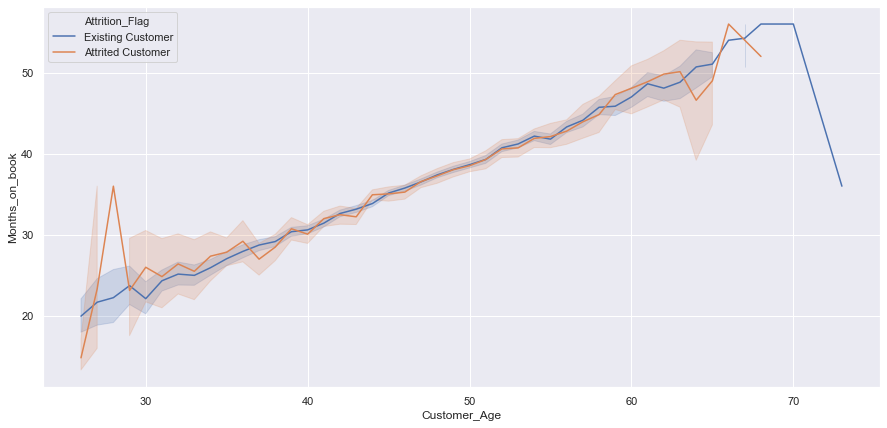

In [70]:
#Months_on_book Vs Customer_Age
sns.lineplot(y=dataCC.Months_on_book, x=dataCC.Customer_Age,hue=dataCC.Attrition_Flag);

- For both classes of target variable, there is some kind of linear relation b/w Age and Months on book

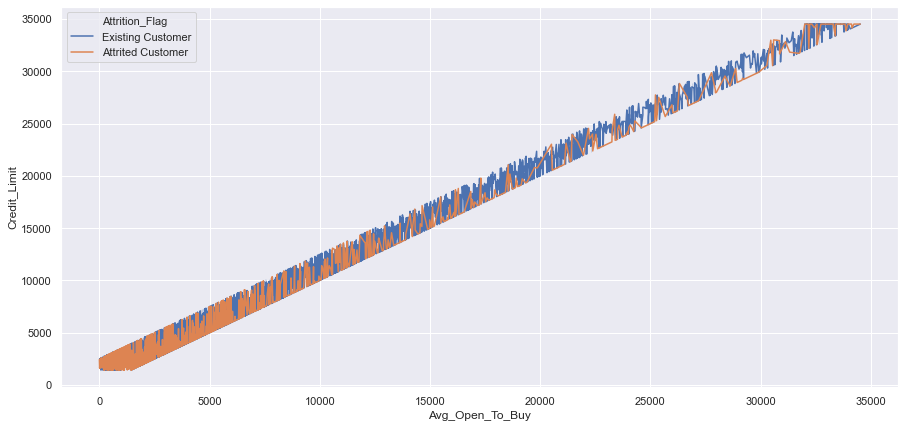

In [71]:
#Credit_Limit Vs Avg_Open_To_Buy
sns.lineplot(y=dataCC.Credit_Limit, x=dataCC.Avg_Open_To_Buy,hue=dataCC.Attrition_Flag);

- For both classes of target variable, there is clear linear relation b/w Credit Limit and Avg Open to Buy credit

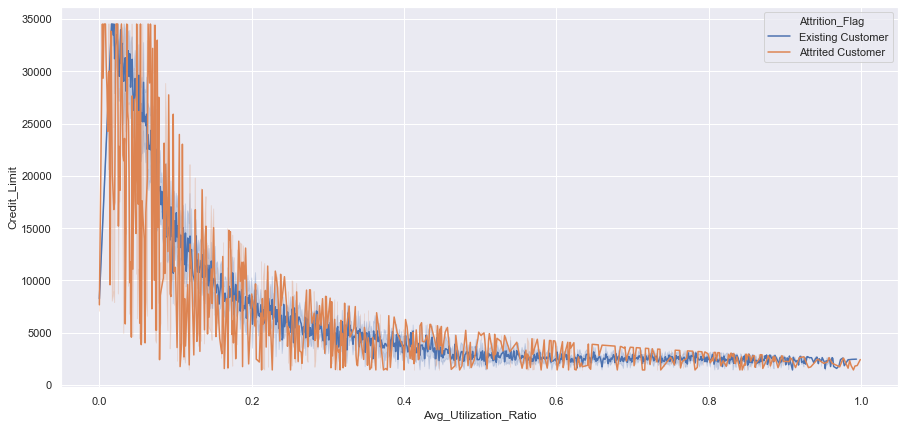

In [72]:
#Credit_Limit Vs Avg_Utilization_Ratio
sns.lineplot(y=dataCC.Credit_Limit, x=dataCC.Avg_Utilization_Ratio,hue=dataCC.Attrition_Flag);

- For both classes of target variable, there is some kind of -ve correlation b/w Credit Limit and Avg Utilization Ratio

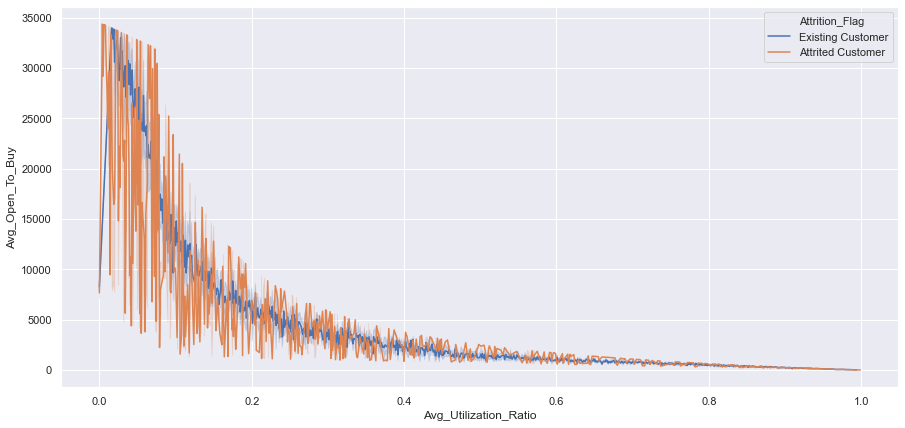

In [73]:
#Avg_Open_To_Buy Vs Avg_Utilization_Ratio
sns.lineplot(y=dataCC.Avg_Open_To_Buy, x=dataCC.Avg_Utilization_Ratio,hue=dataCC.Attrition_Flag);

- For both classes of target variable, there is some kind of -ve correlation b/w Avg Open to buy credit line and Avg Utilization Ratio

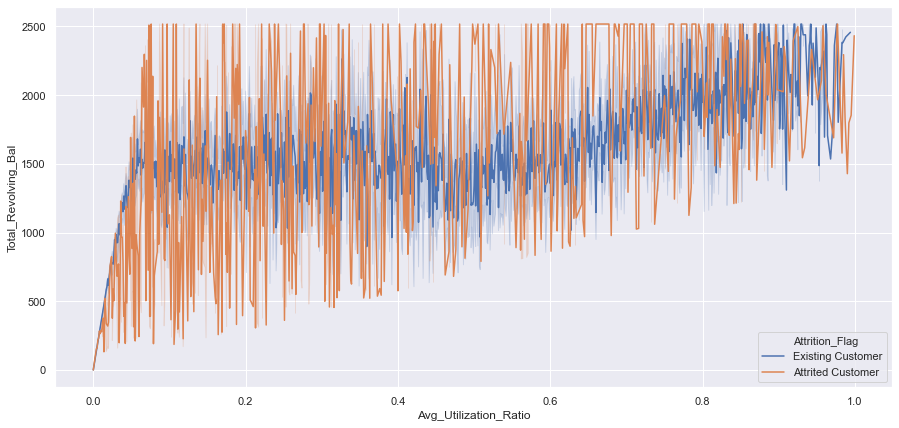

In [74]:
#Total_Revolving_Bal Vs Avg_Utilization_Ratio
sns.lineplot(y=dataCC.Total_Revolving_Bal, x=dataCC.Avg_Utilization_Ratio,hue=dataCC.Attrition_Flag);

- For both classes of target variable, there is some kind of linear relation b/w Avg_Utilization_Ratio and Total_Revolving_Bal

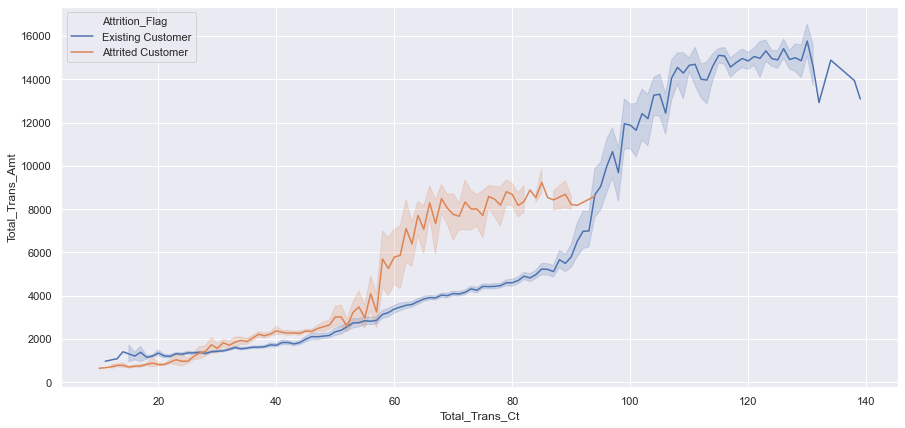

In [75]:
#Total_Trans_Amt Vs Total_Trans_Ct
sns.lineplot(y=dataCC.Total_Trans_Amt, x=dataCC.Total_Trans_Ct,hue=dataCC.Attrition_Flag);

- For both classes of target variable, there is some kind of linear relation b/w Total_Trans_Amt and Total_Trans_Ct

#### Attrition_Flag Vs continuous variables

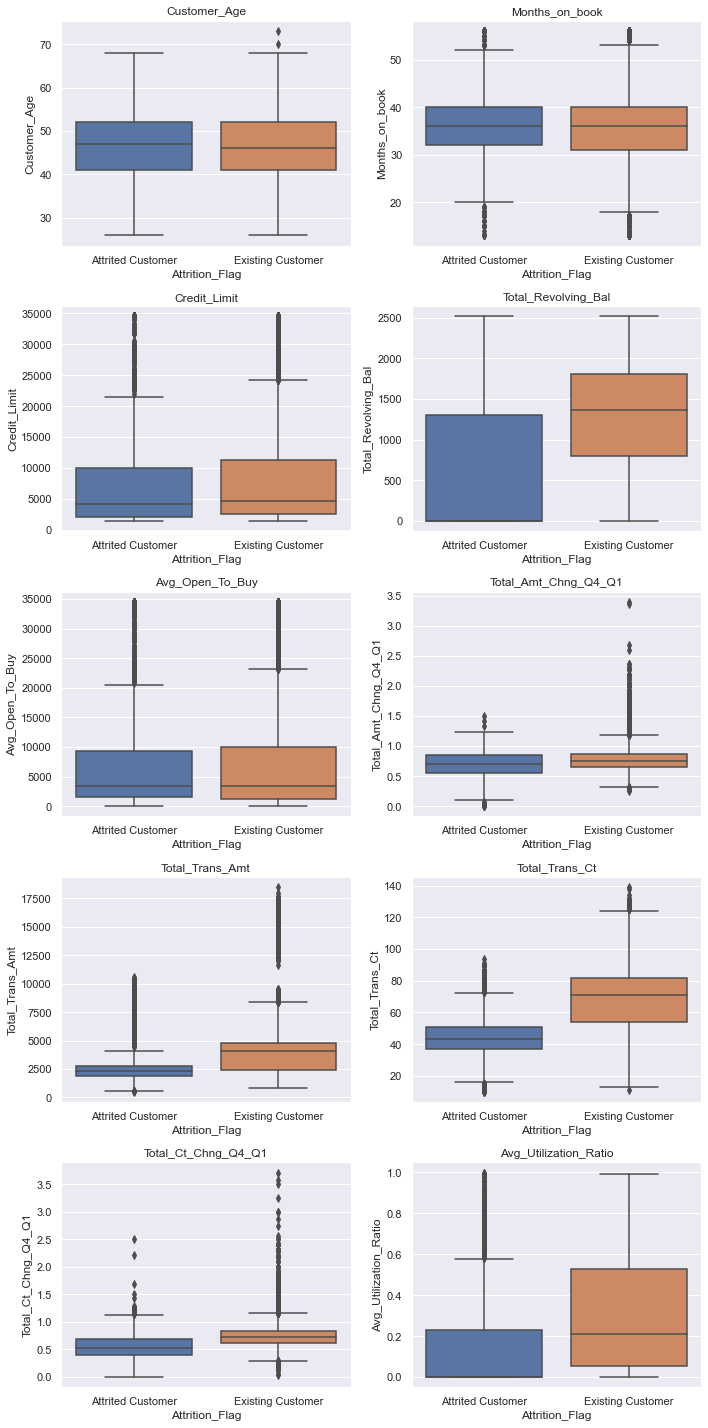

In [76]:
#Bivariate plot for numeric variables and target variable
cols = dataCC[
    [
        "Customer_Age",
        "Months_on_book",
        "Credit_Limit",
        "Total_Revolving_Bal",
        "Avg_Open_To_Buy",
        "Total_Amt_Chng_Q4_Q1",
        "Total_Trans_Amt",
        "Total_Trans_Ct",
        "Total_Ct_Chng_Q4_Q1",
        "Avg_Utilization_Ratio"
        
    ]
].columns.tolist()
plt.figure(figsize=(10, 20))

for i, variable in enumerate(cols):
    plt.subplot(5, 2, i + 1)
    sns.boxplot(dataCC["Attrition_Flag"], dataCC[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Similar to the analysis done using median and mean, the boxplots also show that the target variable is not much impacted by     Customer Age,Months on book and Avg open to buy credit
- There is very slight difference b/w two catefories for Credit limit, Change in total amount and Change in total count
- For existing customers, median and 75% are higher for total revolving balance
- Total transaction amount and Total transaction count are higher for existing customers
- Utilization Ratio Median and 75% are higher for existing customers

In [77]:
#Function to get count plot with hue, that shows % among each class
#Shows crosstab again for better readability and to show % within class and different classes altogether
def perc_on_bar_with_hue(x):
    tab1 = pd.crosstab(dataCC[x],dataCC['Attrition_Flag'],margins=True)
    print(tab1)
    print('-'*80)    
    df1 = dataCC.groupby(x)['Attrition_Flag'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue='Attrition_Flag',kind='bar',data=df1,aspect=2.0)
    g.ax.set_ylim(0,100)    

    for p in g.ax.patches:
        #print(p)
        height = p.get_height()        
        if np.isnan(height):
            height = 0
        txt = str(round(height,2)) + '%'
        txt_x = p.get_x() 
        txt_y = height
        g.ax.text(txt_x,txt_y,txt)

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
0                              135                769    904
1                              269               1569   1838
2                              417               2238   2655
3                              482               2250   2732
4                              260               1314   1574
5                               64                360    424
All                           1627               8500  10127
--------------------------------------------------------------------------------


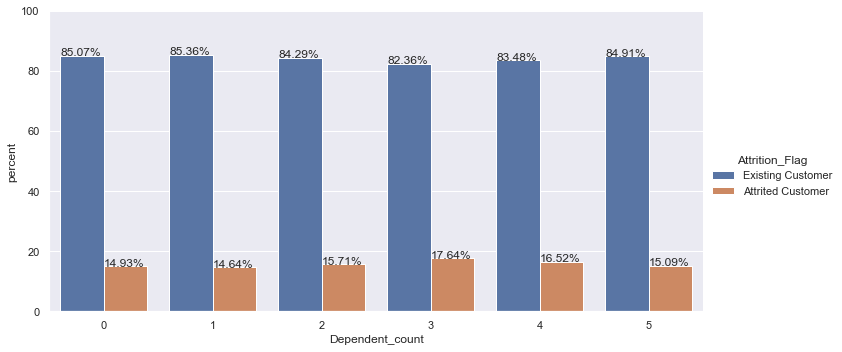

In [78]:
#Dependent_count Vs Attrition_Flag
perc_on_bar_with_hue('Dependent_count')

- % of existing customers Vs attrited customers seem to be almost same accross multiple values of dependent count
- So dependent count does not look like it is impacting the target variable

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
1                                       233                677    910
2                                       346                897   1243
3                                       400               1905   2305
4                                       225               1687   1912
5                                       227               1664   1891
6                                       196               1670   1866
All                                    1627               8500  10127
--------------------------------------------------------------------------------


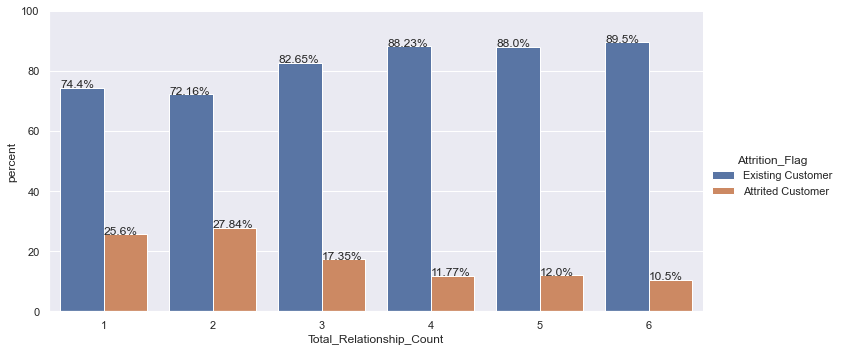

In [79]:
#Total_Relationship_Count Vs Attrition_Flag
perc_on_bar_with_hue('Total_Relationship_Count')

- For higher number of products held by customers, attrition % goes down and existing customer % goes up

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
0                                      15                 14     29
1                                     100               2133   2233
2                                     505               2777   3282
3                                     826               3020   3846
4                                     130                305    435
5                                      32                146    178
6                                      19                105    124
All                                  1627               8500  10127
--------------------------------------------------------------------------------


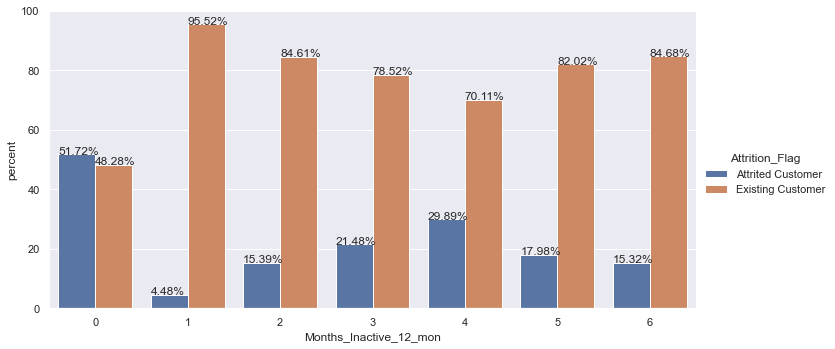

In [80]:
#Months_Inactive_12_mon Vs Attrition_Flag
perc_on_bar_with_hue('Months_Inactive_12_mon')

- When number of inactive months is '0', the % of Attrited customers is almost same as existing customers
- When number of inactive months is more, there is % attrition increases first and then after a point it comes down

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
0                                      7                392    399
1                                    108               1391   1499
2                                    403               2824   3227
3                                    681               2699   3380
4                                    315               1077   1392
5                                     59                117    176
6                                     54                  0     54
All                                 1627               8500  10127
--------------------------------------------------------------------------------


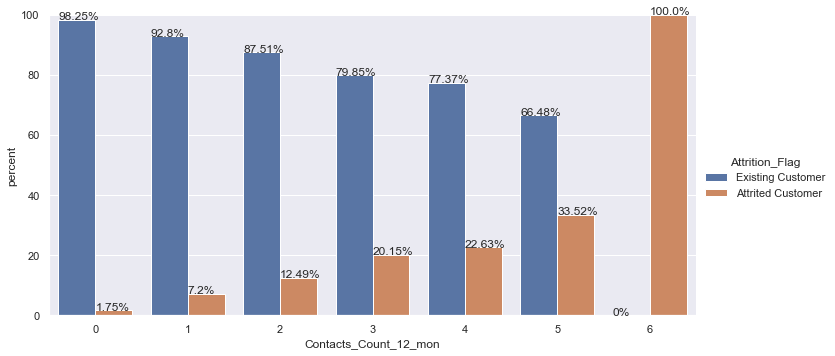

In [81]:
#Contacts_Count_12_mon Vs Attrition_Flag
perc_on_bar_with_hue('Contacts_Count_12_mon')

- When the number of contacts increases, attrition rate also seems to increase. For the highest value of number of contacts,     attrition is 100%, may be these are the customers need to be contacted by the bank multiple times for payment

Attrition_Flag   Attrited Customer  Existing Customer    All
Education_Level                                             
College                        154                859   1013
Doctorate                       95                356    451
Graduate                       487               2641   3128
High School                    306               1707   2013
Post-Graduate                   92                424    516
Uneducated                     237               1250   1487
Unknown                        256               1263   1519
All                           1627               8500  10127
--------------------------------------------------------------------------------


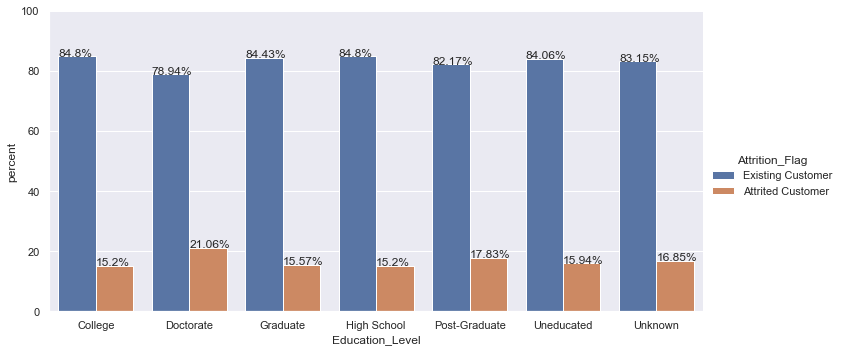

In [82]:
#Education_Level Vs Attrition_Flag
perc_on_bar_with_hue('Education_Level')

- Education Level does not seem to have an impact on target variable
- % of Attrited Vs Existing customers seem to be same across different education levels, except for Doctorate, that has a         slightly higher % attrition

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
$120K +                        126                601    727
$40K - $60K                    271               1519   1790
$60K - $80K                    189               1213   1402
$80K - $120K                   242               1293   1535
Less than $40K                 612               2949   3561
Unknown                        187                925   1112
All                           1627               8500  10127
--------------------------------------------------------------------------------


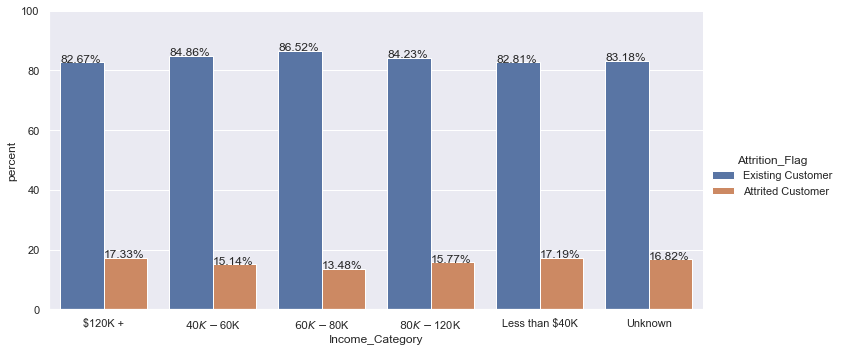

In [83]:
#Income_Category Vs Attrition_Flag
perc_on_bar_with_hue('Income_Category')

- % of Attrited Vs Existing customers seem to be almost same across different income categories

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
Blue                         1519               7917   9436
Gold                           21                 95    116
Platinum                        5                 15     20
Silver                         82                473    555
All                          1627               8500  10127
--------------------------------------------------------------------------------


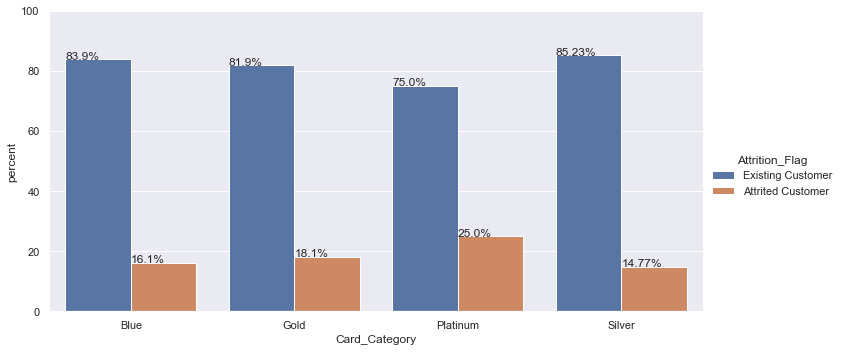

In [84]:
#Card_Category Vs Attrition_Flag
perc_on_bar_with_hue('Card_Category')

- Platinum shows bit more % in attrited customers
- Other than that, % of attrited customers Vs existing customers seem to be same accross card categories

Attrition_Flag  Attrited Customer  Existing Customer    All
Marital_Status                                             
Divorced                      121                627    748
Married                       709               3978   4687
Single                        668               3275   3943
Unknown                       129                620    749
All                          1627               8500  10127
--------------------------------------------------------------------------------


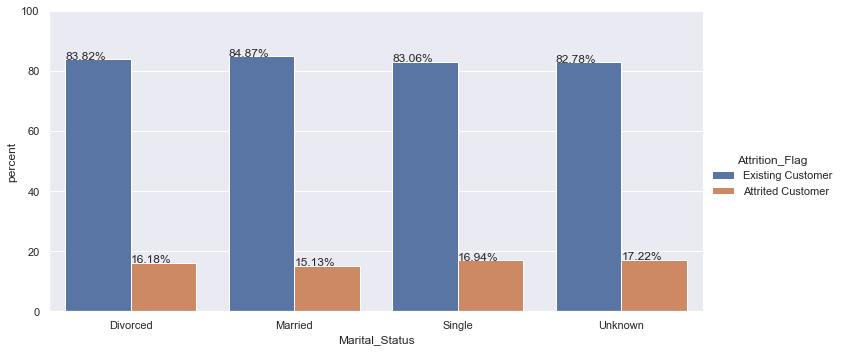

In [85]:
#Marital_Status Vs Attrition_Flag
perc_on_bar_with_hue('Marital_Status')

- % of Attrited Vs Existing customers seem to be almost same across different status

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
F                             930               4428   5358
M                             697               4072   4769
All                          1627               8500  10127
--------------------------------------------------------------------------------


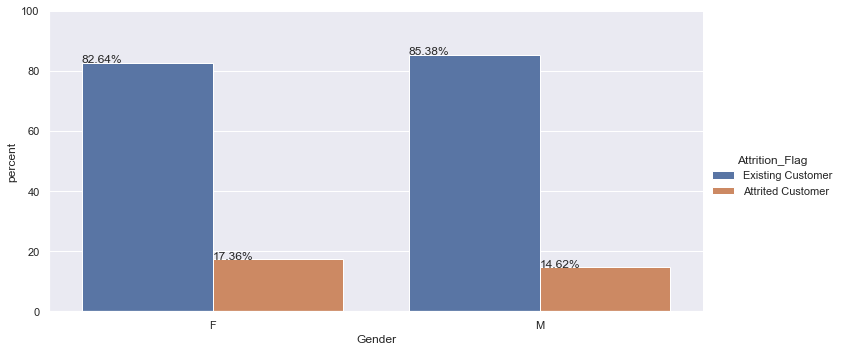

In [86]:
#Gender Vs Attrition_Flag
perc_on_bar_with_hue('Gender')

% of Attrited Vs Existing customers seem to be almost same across Male and Female (there is very slight % increase in Female)

#### Insights based on EDA

#### Key meaningful observations on the relationship between variables

- In terms of attrition %, customers with more total revolving balance tend to keep using the bank credit card, hence less       attrition rate
- In terms of attrition %, customers with more total transaction amount in last 12 months seem to keep using the bank credit     card, hence less attrition rate
- In terms of attrition %, customers with more total transaction count in last 12 months seem to keep using the bank credit       card, hence less attrition rate
- In terms of attrition %, customers with more card utilization seem to keep using the bank credit card, hence less attrition     rate
- Attrition % seems to be lower for customers having more number of products offered by the bank
- Attrition % seems to increase when the card is inactive for longer period of time
- For customers who need to be contacted by the bank multiple times, they tend to become attrited customers
- With increase in Change in Transaction Amount (Q4 over Q1), attrition decreases
- With increase in Change in Transaction Count (Q4 over Q1), attrition decreases
- Platinum card shows bit more attrition % comapred to other types of cards
- Attrition % seems to be little bit more in Females compared to Males, not a significant difference though
- Customer Age and Period of relationship with the bank are two features that are positively correlated
- Credit Limit and Avg open to buy credit line are positively correlated, could be because when credit limit goes up more         amount is open for usage
- Credit Limit and Avg utilization are negatively correlated, that means with increase in credit limit, usage is not increasing
- Avg utilization and Avg open to buy credit line are negatively correlated, which means with more usage the available credit     line decreases
- Avg utilization and Total revolving balance are positively correlated, which make sense, when there is more usage, balance     that carries over month to month also increases

#### Data Pre-processing

- CLIENTNUM column removed since that is just an ID column and not going to add value to the model
- There was an empty column (Unnamed) in the dataset, that is removed
- Missing data (unknown) present in columns - Education_Level, Income_Category and Marital_Status, we will handle these missing   values in this data pre-processing step
- Outliers are present in some of the columns and they were explained in the univariate analysis. Since those values are not     standing out from the rest of the data, they are not removed
- Target variable (Attrition_Flag) is a categorical featured with just two values and hence can be mapped to 1 and 0
- Since Credit limit shows 100% correlation with Avg_open_to_buy, one of this features can be dropped
- Since Total_Trans_Ct shows 81% correlation with Total_Trans_Amt, one of this features can be dropped

In [87]:
#Change target variable (Attrition_Flag) to 1 and 0
#Attrition_Flag: Internal event (customer activity) variable - if the account is closed then 1 else 0
attrition = {'Existing Customer':0, 'Attrited Customer':1}
dataCC['Attrition_Flag']=dataCC['Attrition_Flag'].map(attrition)

In [88]:
#Checking columns that contain zeros
for col in dataCC.drop('Attrition_Flag',axis=1).columns:
    if (dataCC[col] == 0).any() == True:
        print('{} has one or more zeros'.format(col))

Dependent_count has one or more zeros
Months_Inactive_12_mon has one or more zeros
Contacts_Count_12_mon has one or more zeros
Total_Revolving_Bal has one or more zeros
Total_Amt_Chng_Q4_Q1 has one or more zeros
Total_Ct_Chng_Q4_Q1 has one or more zeros
Avg_Utilization_Ratio has one or more zeros


- The above 7 columns have zeros, but they are features that can have zeros in real world scenarios, hence not imputing them

In [89]:
#For KNN to work, the columns for which we do KNN imputation need to be converted to numeric
#After KNN imputation for missing values is done, reverse mapping can be done to restore original values
education = {'Uneducated':1, 'High School':2, 'College':3, 'Graduate':4, 'Post-Graduate':5, 'Doctorate':6}
dataCC['Education_Level']=dataCC['Education_Level'].map(education)

income = {'Less than $40K':1, '$40K - $60K':2, '$60K - $80K':3, '$80K - $120K':4, '$120K +':5}
dataCC['Income_Category']=dataCC['Income_Category'].map(income)

marital_status = {'Married':1,'Single':2, 'Divorced':3}
dataCC['Marital_Status']=dataCC['Marital_Status'].map(marital_status)

In [90]:
#Checking nulls
dataCC.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Income_Category             1112
Marital_Status               749
Avg_Utilization_Ratio          0
Total_Ct_Chng_Q4_Q1            0
Customer_Age                   0
Gender                         0
Dependent_count                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Attrition_Flag                 0
dtype: int64

In [91]:
# Separating target variable and other variables
X = dataCC.drop(columns='Attrition_Flag',axis=1)
Y = dataCC['Attrition_Flag'].astype('category') 

In [92]:
#Dropping Avg_Open_To_Buy, since Credit limit shows 100% correlation with Avg_open_to_buy
X.drop('Avg_Open_To_Buy',axis=1,inplace=True)

In [93]:
#Dropping Total_Trans_Ct, since Total_Trans_Ct shows 81% correlation with Total_Trans_Amt
X.drop('Total_Trans_Ct',axis=1,inplace=True)

In [94]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train.shape, X_test.shape)

(7088, 17) (3039, 17)


In [95]:
#checking target variable imbalance in train and test set
print('Existing customer % in training dataset is: {}'.format((y_train == 0).sum()/y_train.count()) )
print('Attrited customer % in training dataset is: {}'.format((y_train == 1).sum()/y_train.count()) )

print('Existing customer % in test dataset is: {}'.format((y_test == 0).sum()/y_test.count()) )
print('Attrited customer % in test dataset is: {}'.format((y_test == 1).sum()/y_test.count()) )

Existing customer % in training dataset is: 0.8393058690744921
Attrited customer % in training dataset is: 0.1606941309255079
Existing customer % in test dataset is: 0.8394208621256992
Attrited customer % in test dataset is: 0.16057913787430075


- Target variable is 84% Existing customer class and 16% Attrited customer class

#### Missing-Value Treatment

In [96]:
imputer = KNNImputer(n_neighbors=5)

In [97]:
reqd_col_for_impute = ['Education_Level','Income_Category','Marital_Status']

In [98]:
#Fit and transform the train data
X_train[reqd_col_for_impute]=imputer.fit_transform(X_train[reqd_col_for_impute])

#Transform the test data 
X_test[reqd_col_for_impute]=imputer.transform(X_test[reqd_col_for_impute])

In [99]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
------------------------------
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt           

- All missing values are imputed
- Now we can inverse map the encoded values in Education_Level,Income_Category and Marital_Status

In [100]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

In [101]:
inverse_mapping(education,'Education_Level')
inverse_mapping(income,'Income_Category')
inverse_mapping(marital_status,'Marital_Status')

In [102]:
#Checking inverse mapped values/categories on training dataset
for i in reqd_col_for_impute:
    print(X_train[i].value_counts())
    print('*'*30)

Graduate         2589
High School      1471
College          1321
Uneducated       1031
Post-Graduate     364
Doctorate         312
Name: Education_Level, dtype: int64
******************************
Less than $40K    2541
$40K - $60K       1804
$80K - $120K      1176
$60K - $80K       1064
$120K +            503
Name: Income_Category, dtype: int64
******************************
Married     3503
Single      3083
Divorced     502
Name: Marital_Status, dtype: int64
******************************


In [103]:
#Checking inverse mapped values/categories on test dataset
for i in reqd_col_for_impute:
    print(X_test[i].value_counts())
    print('*'*30)

Graduate         1128
High School       609
College           555
Uneducated        456
Post-Graduate     152
Doctorate         139
Name: Education_Level, dtype: int64
******************************
Less than $40K    1090
$40K - $60K        772
$80K - $120K       497
$60K - $80K        456
$120K +            224
Name: Income_Category, dtype: int64
******************************
Married     1499
Single      1294
Divorced     246
Name: Marital_Status, dtype: int64
******************************


- Inverse mapping returned original labels

#### Encoding categorical varaibles

In [104]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7088, 27) (3039, 27)


- After encoding there are 27 columns

In [105]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7088 entries, 4124 to 4752
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    7088 non-null   int64  
 1   Dependent_count                 7088 non-null   int64  
 2   Months_on_book                  7088 non-null   int64  
 3   Total_Relationship_Count        7088 non-null   int64  
 4   Months_Inactive_12_mon          7088 non-null   int64  
 5   Contacts_Count_12_mon           7088 non-null   int64  
 6   Credit_Limit                    7088 non-null   float64
 7   Total_Revolving_Bal             7088 non-null   int64  
 8   Total_Amt_Chng_Q4_Q1            7088 non-null   float64
 9   Total_Trans_Amt                 7088 non-null   int64  
 10  Total_Ct_Chng_Q4_Q1             7088 non-null   float64
 11  Avg_Utilization_Ratio           7088 non-null   float64
 12  Gender_M                       

#### Model Building

#### Model performance evaluation - right metric to use

- The objective is to find out if a customer is going to leave credit card services or not. Because customers leaving credit     card services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who       will leave their credit card services

#### Here are the wrong predictions that the model can make
   - Predicting a customer will leave credit card services and the customer does not leave
   - Predicting a customer will NOT leave credit card services and the customer leaves

#### Which prediction is more important
   - In the first scenario, the model predicts customer will leave credit card services, so the bank takes effort to                retain them, which causes the bank more resources and money
   - In the second scenario, the model predicts customer will NOT leave credit card services, so the bank is not going to take      any effort to retain those customers, but in real world scenario the customer leaves the serives, which causes the bank        huge loss

#### Which is the right metric
   - The first wrong prediction type is FP (False Positive) and the second wrong prediction type is FN(False Negative)
   - Since the bank wants to avoid losses due to customers leaving credit card services, we need to focus on reducing the false      negatives, recall is the right metric in this case, greater the Recall lesser the chances of false negatives
   - We will focus more on Recall, but also keep an eye on precision, which is the metric if our focus is on reducing false          positives, in this case reducing the resources

#### How to interpret confusion matrix for the given problem

***True Positives:***

- Reality: A customer leaves credit card services
- Model predicted: The customer will leave credit card services
- Outcome: The model is good

***True Negatives:***

- Reality: A customer does not leave credit card services
- Model predicted: The customer will NOT leave credit card services
- Outcome: The model is good

***False Positives:***

- Reality: A customer does not leave credit card services
- Model predicted: The customer will leave credit card services
- Outcome: Bank will be spending more on resources trying to reatin the customers who will not leave credit card services

***False Negatives:***

- Reality: A customer leaves credit card services
- Model predicted: The customer will NOT leave credit card services
- Outcome: Bank will face a huge loss, since they will not focus on retaining the potential customers who will leave credit       card services

#### Model evaluation
- It is recommended to split the dataset into training,evaluation and testing and fit the model on training set, perform hyper parameter tuning on evaluation set and after finding the right set of parameters check if the model is underfit, overfit or right fit on the test set
- Here Stratified ***K-Folds cross-validator*** is used, which will split data in train/validation sets. Split dataset into k consecutive folds keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

In [106]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [107]:
#Function to display confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Model building - Logistic Regression

In [108]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train,y_train)

LogisticRegression(random_state=1)

#### Evaluating model performance by using KFold and cross_val_score

[0.33333333 0.40789474 0.35526316 0.33920705 0.31140351]


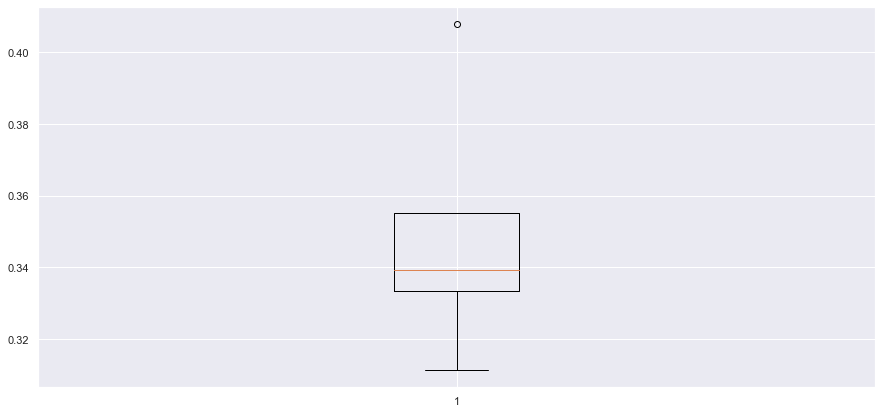

In [109]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_bfr)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

- Performance on training set varies between 0.31 and 0.40 recall (boxplot is showing a distribution with one outlier)

Accuracy on training set :  0.8795146726862303
Accuracy on test set :  0.8743007568279039
Recall on training set :  0.34679543459174716
Recall on test set :  0.3135245901639344
Precision on training set :  0.7821782178217822
Precision on test set :  0.765


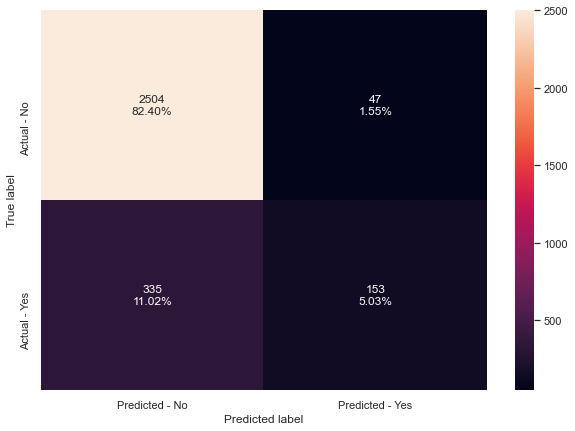

In [110]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(lr,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(lr,y_test)

- Logistic Regression has given a generalized performance on training and test set.
- Recall is very low, we will try oversampling and undersampling to see if the model performance can be improved.
- From confusion matrix, false negative is 11% and our focus should be reducing that, since these cause a huge loss for the     bank as explained in "how to interpret confusion matrix" 
- True positives which are correct positive predictions is only 5%

#### Oversampling train data using SMOTE

In [111]:
print("Before UpSampling, counts of label 'Existing': {}".format(sum(y_train==0)))
print("Before UpSampling, counts of label 'Attrited': {} \n".format(sum(y_train==1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Existing': {}".format(sum(y_train_over==0)))
print("After UpSampling, counts of label 'Attrited': {} \n".format(sum(y_train_over==1)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

Before UpSampling, counts of label 'Existing': 5949
Before UpSampling, counts of label 'Attrited': 1139 

After UpSampling, counts of label 'Existing': 5949
After UpSampling, counts of label 'Attrited': 5949 

After UpSampling, the shape of train_X: (11898, 27)
After UpSampling, the shape of train_y: (11898,) 



#### Logistic Regression on oversampled data

In [112]:
log_reg_over = LogisticRegression(random_state = 1)

# Training the basic logistic regression model with training set 
log_reg_over.fit(X_train_over,y_train_over)

LogisticRegression(random_state=1)

#### Evaluating model performance by using KFold and cross_val_score

[0.74621849 0.77226891 0.75462185 0.72834315 0.74705882]


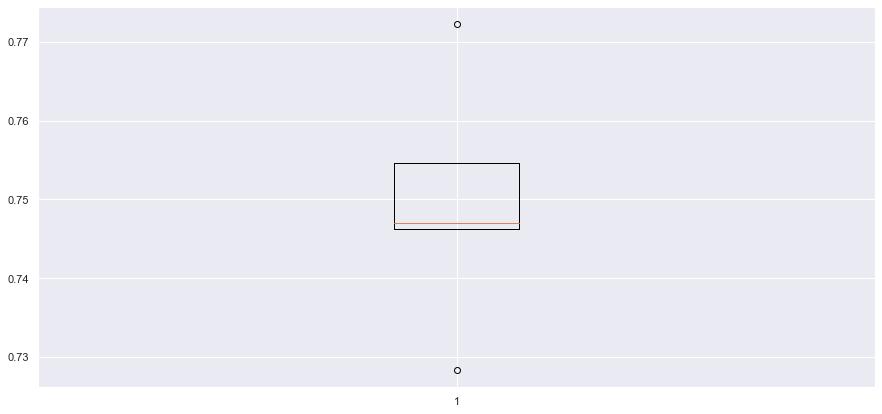

In [113]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_over=cross_val_score(estimator=log_reg_over, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold)
print(cv_result_over)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_over)
plt.show()

- Performance on training set varies between 0.72 and 0.77 recall, which is an improvement from the base model and it is pretty consistent

Accuracy on training set :  0.7877794587325601
Accuracy on test set :  0.767686739058901
Recall on training set :  0.787359220036981
Recall on test set :  0.6516393442622951
Precision on training set :  0.7880215343203231
Precision on test set :  0.37236533957845436


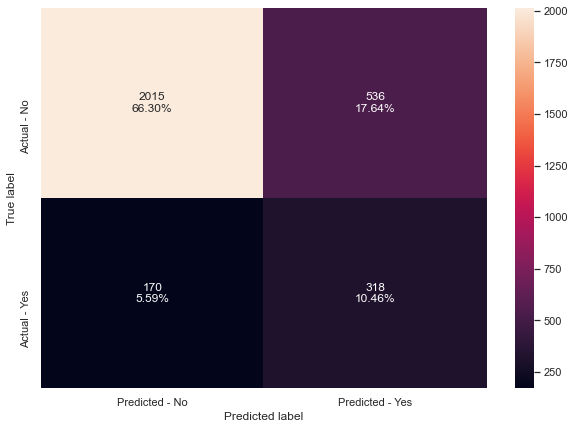

In [114]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(log_reg_over,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(log_reg_over,y_test)

- Performance on the training set improved but the model is showing a clear difference b/w train and test scores 

- False negative came down to 5.6%, compared to previous model, which is good

- True positives which are correct positive predictions increased to 10%, compared to previous model, which is also good

- Model is overfitting, train/test scores have a clear difference.

- We can try both these options:

    a) Regularization to see if overfitting can be reduced

    b) Undersampling the train set to handle the imbalance between classes and check the model performance.

#### Regularization

In [115]:
# Choose the type of classifier. 
#LogisticRegression has a parameter 'penalty', default values is l2. SAGA solver supports l1 penalty.
#l1 is Lasso Regression and l2 is Ridge Regression
#Since we use SAGA solver, we are implementing Lasso
lr_estimator = LogisticRegression(random_state=1,solver='saga')

# Grid of parameters to choose from
parameters = {'C': np.arange(0.1,1.1,0.1)}

# Run the grid search
grid_obj = GridSearchCV(lr_estimator, parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1, random_state=1, solver='saga')

Accuracy on training set :  0.7029752899646999
Accuracy on test set :  0.7499177360974004
Recall on training set :  0.6096822995461422
Recall on test set :  0.5573770491803278
Precision on training set :  0.749535027898326
Precision on test set :  0.3333333333333333


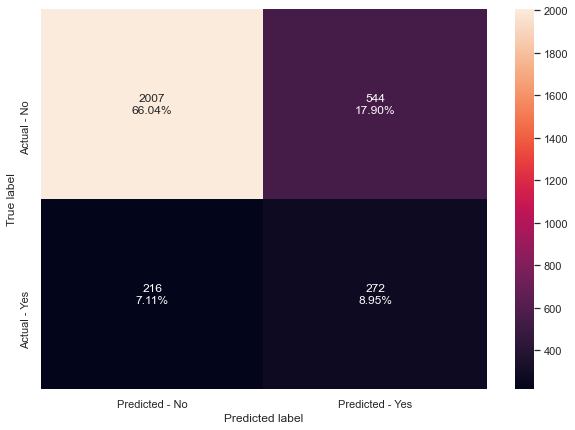

In [116]:
#Calculating different metrics
get_metrics_score(lr_estimator,X_train_over,X_test,y_train_over,y_test)

# creating confusion matrix
make_confusion_matrix(lr_estimator,y_test)

- Over-fitting has reduced to a good extent, test recall is lower compared to previous model, but train and test recall are       close now

- False negative has come down to 7%, compared to base model

- True positives which are correct positive predictions increased to 9%, compared to base model

- We can try downsampling now

#### Undersampling train data using RandomUnderSampler

In [117]:
rus = RandomUnderSampler(random_state = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [118]:
print("Before Under Sampling, counts of label 'Existing': {}".format(sum(y_train==0)))
print("Before Under Sampling, counts of label 'Attrited': {} \n".format(sum(y_train==1)))

print("After Under Sampling, counts of label 'Existing': {}".format(sum(y_train_un==0)))
print("After Under Sampling, counts of label 'Attrited': {} \n".format(sum(y_train_un==1)))

print('After Under Sampling, the shape of train_X: {}'.format(X_train_un.shape))
print('After Under Sampling, the shape of train_y: {} \n'.format(y_train_un.shape))

Before Under Sampling, counts of label 'Existing': 5949
Before Under Sampling, counts of label 'Attrited': 1139 

After Under Sampling, counts of label 'Existing': 1139
After Under Sampling, counts of label 'Attrited': 1139 

After Under Sampling, the shape of train_X: (2278, 27)
After Under Sampling, the shape of train_y: (2278,) 



#### Logistic Regression on undersampled data

In [119]:
log_reg_under = LogisticRegression(random_state = 1)
log_reg_under.fit(X_train_un,y_train_un )

LogisticRegression(random_state=1)

[0.74561404 0.72368421 0.75438596 0.73568282 0.75      ]


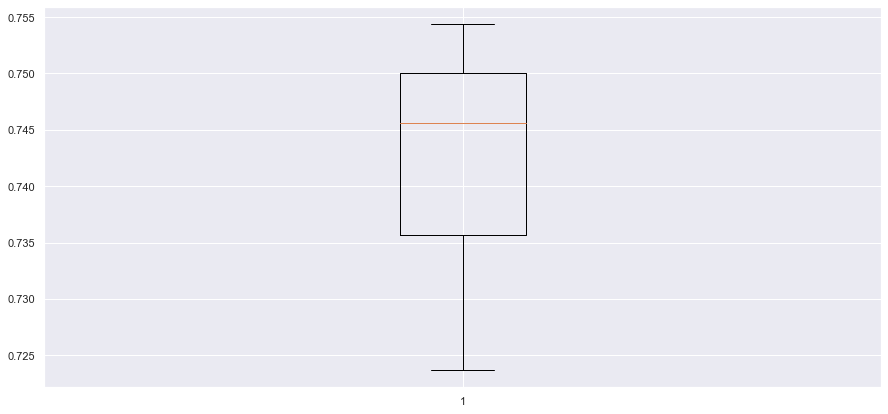

In [120]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)     #Setting number of splits equal to 5
cv_result_under=cross_val_score(estimator=log_reg_under, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold)
print(cv_result_under)
#Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_under)
plt.show()

- Performance of model on training set varies between 0.72 to 0.75, which is an improvement from the initial model(without       oversampling)

Accuracy on training set :  0.7392449517120281
Accuracy on test set :  0.7538664034221784
Recall on training set :  0.7401229148375769
Recall on test set :  0.6967213114754098
Precision on training set :  0.7388255915863278
Precision on test set :  0.3617021276595745


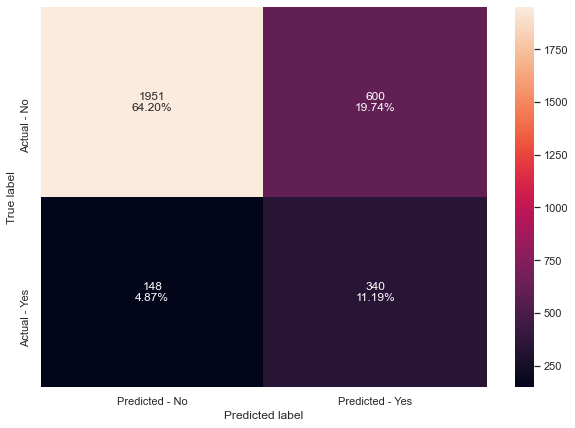

In [121]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(log_reg_under,X_train_un,X_test,y_train_un,y_test)


# creating confusion matrix
make_confusion_matrix(log_reg_under,y_test)

- Model has given a generalized performance on training and test set.
- Model performance(recall) has improved using downsampling, it is better than the initial model and the one with oversampling
- Looking at the confusion matrix, False Negative has come down really well, which is good
- True positives which are correct positive predictions increased to 11%, which is also very good for the model

#### Finding the coefficients from logistic regression

In [122]:
log_odds = log_reg_under.coef_[0]
df = pd.DataFrame(log_odds, X_train_un.columns, columns=['coef'])
df.reindex(df.coef.abs().sort_values(ascending=False).index)

coef
Contacts_Count_12_mon           0.420464
Total_Relationship_Count       -0.346568
Months_Inactive_12_mon          0.303769
Total_Ct_Chng_Q4_Q1            -0.123524
Dependent_count                 0.115199
Income_Category_Less than $40K  0.065142
Gender_M                       -0.042264
Marital_Status_Single           0.033617
Income_Category_$60K - $80K    -0.029232
Total_Amt_Chng_Q4_Q1           -0.027332
Education_Level_Post-Graduate   0.023457
Months_on_book                  0.017047
Education_Level_Graduate       -0.013410
Card_Category_Silver            0.013321
Education_Level_Doctorate       0.012158
Avg_Utilization_Ratio          -0.010894
Card_Category_Gold              0.007053
Education_Level_High School    -0.003689
Marital_Status_Married         -0.003624
Card_Category_Platinum          0.002639
Income_Category_$40K - $60K    -0.002488
Total_Revolving_Bal            -0.000743
Customer_Age                    0.000632
Education_Level_Uneducated      0.000605
Income_Category_$80K - $120K   -0.000461
Total_Trans_Amt                -0.000227
Credit_Limit                    0.000006

#### Converting coefficients to odds

In [123]:
odds = np.exp(log_reg_under.coef_[0])-1
pd.set_option('display.max_rows',None)
df=pd.DataFrame(odds, X_train_un.columns, columns=['odds'])
df.reindex(df.odds.abs().sort_values(ascending=False).index)

odds
Contacts_Count_12_mon           0.522668
Months_Inactive_12_mon          0.354956
Total_Relationship_Count       -0.292889
Dependent_count                 0.122096
Total_Ct_Chng_Q4_Q1            -0.116199
Income_Category_Less than $40K  0.067310
Gender_M                       -0.041383
Marital_Status_Single           0.034188
Income_Category_$60K - $80K    -0.028809
Total_Amt_Chng_Q4_Q1           -0.026961
Education_Level_Post-Graduate   0.023734
Months_on_book                  0.017193
Card_Category_Silver            0.013410
Education_Level_Graduate       -0.013320
Education_Level_Doctorate       0.012232
Avg_Utilization_Ratio          -0.010834
Card_Category_Gold              0.007078
Education_Level_High School    -0.003682
Marital_Status_Married         -0.003617
Card_Category_Platinum          0.002643
Income_Category_$40K - $60K    -0.002485
Total_Revolving_Bal            -0.000742
Customer_Age                    0.000633
Education_Level_Uneducated      0.000605
Income_Category_$80K - $120K   -0.000460
Total_Trans_Amt                -0.000227
Credit_Limit                    0.000006

#### Concluding findings from logistic regression

- Contacts_Count_12_mon: For one-unit increase in the number of contacts in last 12 months, we expect to see about a 52% increase in the odds of a customer leaving credit card services

- Months_Inactive_12_mon: For one-unit increase in the number of inactive months in last 12 months, we expect to see about a 35% increase in the odds of a customer leaving credit card services

- Total_Relationship_Count: For one-unit increase in the number of products owned by a customer, we expect to see about a 29% decrease in the odds of a customer leaving credit card services

- Dependent_count: For one-unit increase in the number of dependents, we expect to see about a 12% increase in the odds of a customer leaving credit card services

- Total_Ct_Chng_Q4_Q1: For one-unit increase in the number of transactions between Q1 and Q4, we expect to see about a 11% decrease in the odds of a customer leaving credit card services

- All other features can be interpretted in the same way

- We will try other models and see the feature importance

#### Model building - Bagging and Boosting

- Building Decision tree, random forest, bagging classifier, Xgboost, AdaBoost, and gradient boosting models using pipeline

- Stratified K-Folds cross-validator is used, which will split data in train/validation sets. Split dataset into k consecutive folds keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

- This is better than splitting the data into just 3 sets - train,validation and test

- Since I want to apply StandardScaler() on the dataset and fit the models, I am using pipeline() to do both together

#### DecisionTreeClassifier

In [124]:
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

In [125]:
dtree = Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("d_tree", DecisionTreeClassifier(criterion='gini',class_weight={0:0.16,1:0.84},random_state=1))

            ]
        )
dtree.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('d_tree',
                 DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84},
                                        random_state=1))])

#### Evaluating model performance by using KFold and cross_val_score

In [126]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_dtree=cross_val_score(estimator=dtree, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_dtree)
results.append(cv_result_dtree)
names.append('DTREE')
print("{}: {}".format('Mean recall score for DecisionTreeClassifier is', cv_result_dtree.mean() * 100))

[0.73245614 0.77192982 0.71929825 0.72687225 0.71491228]
Mean recall score for DecisionTreeClassifier is: 73.30937475848212


- Performance on training set varies between 0.71 and 0.77 recall.

Accuracy on training set :  1.0
Accuracy on test set :  0.9249753208292202
Recall on training set :  1.0
Recall on test set :  0.7663934426229508
Precision on training set :  1.0
Precision on test set :  0.7663934426229508


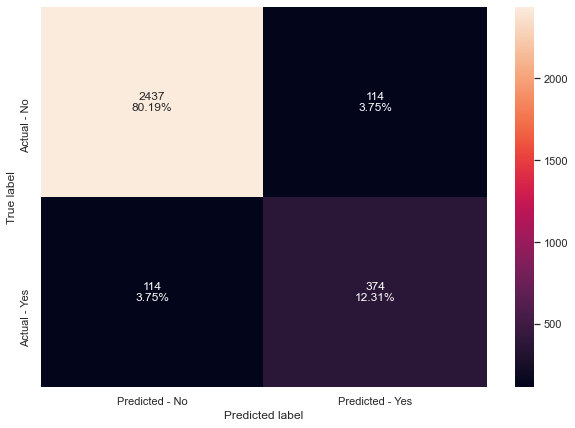

In [127]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(dtree,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(dtree,y_test)

- With k-fold cross validation on training set the avg recall score is 73.3%
- But when we fit the model on test set, it clearly shows over-fitting
- Looking at the confusion matrix, False Negative is low, which is good, as explained in "how to interpret confusion matrix"
- True positives which are correct positive predictions increased to 12%, which is also very good for the model

#### Feature importance - DecisionTree

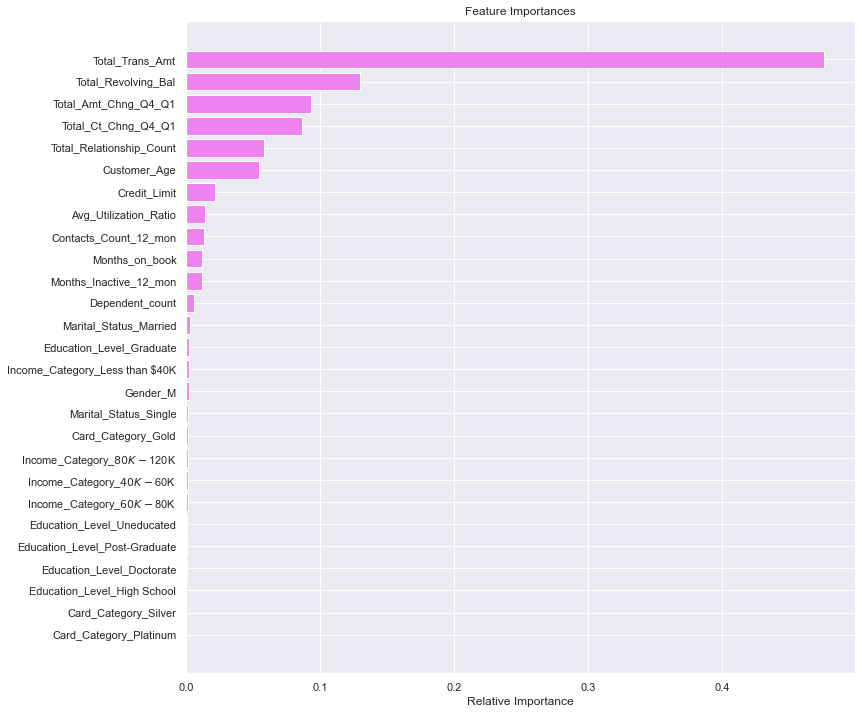

In [128]:
feature_names = X_train.columns
importances = dtree[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_trans_amt, total_revolving_bal are the 2 most important features impacting attrition as per decision tree model
- Decision Tree model is over-fitting on training data
- False Negative is low, which is good, since that indicate lower loss for the bank, since the model is making less mistakes in making -ve predictions (model predicts customer will NOT leave, but they actually leave)

#### RandomForest Classifier

In [129]:
rf = Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=1))
            ]
        )
rf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('random_forest', RandomForestClassifier(random_state=1))])

#### Evaluating model performance by using KFold and cross_val_score

In [130]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_rf=cross_val_score(estimator=rf, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_rf)
results.append(cv_result_rf)
names.append('RF')
print("{}: {}".format('Mean recall score for RandomForestClassifier is', cv_result_rf.mean() * 100))

[0.68421053 0.76315789 0.6754386  0.69162996 0.68421053]
Mean recall score for RandomForestClassifier is: 69.9729499961357


- Performance on training set varies between 0.67 and 0.76 recall.

Accuracy on training set :  1.0
Accuracy on test set :  0.945705824284304
Recall on training set :  1.0
Recall on test set :  0.7254098360655737
Precision on training set :  1.0
Precision on test set :  0.9194805194805195


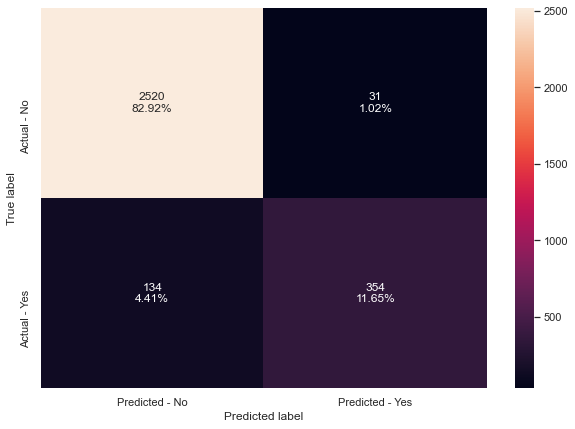

In [131]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(rf,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(rf,y_test)

- With k-fold cross validation on training set the avg recall score is 69.9%
- But when we fit the model on test set, it again shows over-fitting
- Looking at the confusion matrix, False Negative is bit higher than decision tree
- True positives which are correct positive predictions also is slightly lower than decision tree

#### Feature importance - Random Forest

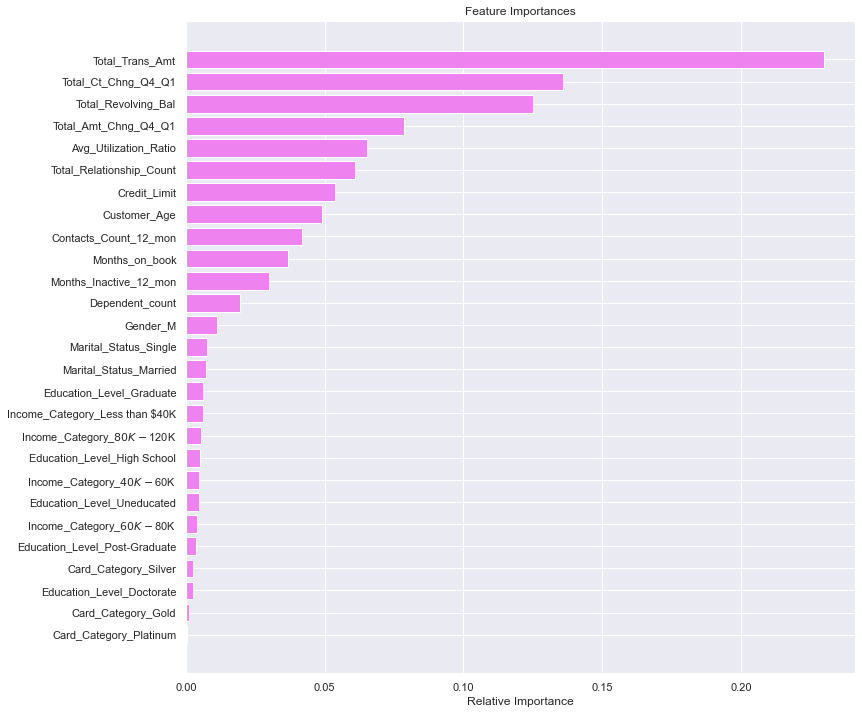

In [132]:
feature_names = X_train.columns
importances = rf[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_trans_amt,  Change in Transaction Count (Q4 over Q1) are the 2 most important features impacting attrition as per random forest model
- This model is over-fitting on training data
- False Negative is bit higher than Decision Tree and True positive is bit lower compared to decision tree

#### BaggingClassifier

In [133]:
bc =    Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bagging", BaggingClassifier(random_state=1))
            ]
        )
bc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('bagging', BaggingClassifier(random_state=1))])

#### Evaluating model performance by using KFold and cross_val_score

In [134]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_bc=cross_val_score(estimator=bc, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_bc)
results.append(cv_result_bc)
names.append('BC')
print("{}: {}".format('Mean recall score for BaggingClassifier is', cv_result_bc.mean() * 100))

[0.71491228 0.82017544 0.73245614 0.71806167 0.72368421]
Mean recall score for BaggingClassifier is: 74.18579488368499


- Performance on training set varies between 0.71 and 0.82 recall.

Accuracy on training set :  0.9956264108352144
Accuracy on test set :  0.9496544916090819
Recall on training set :  0.9798068481123793
Recall on test set :  0.7745901639344263
Precision on training set :  0.9928825622775801
Precision on test set :  0.8978622327790974


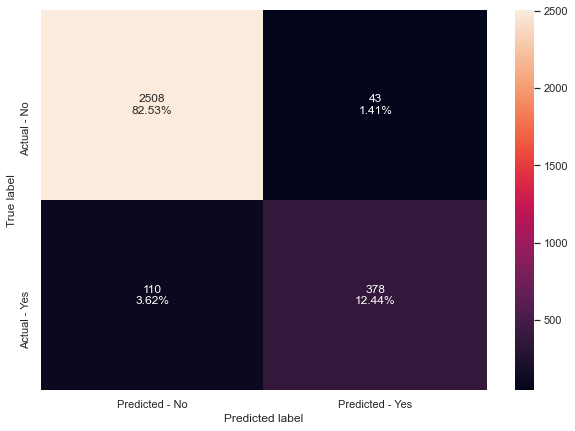

In [135]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(bc,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(bc,y_test)

- With k-fold cross validation on training set the avg recall score is 74.18%
- Test recall score is good
- But when we fit the model on test set, it shows clear difference b/w train and test scores
- Looking at the confusion matrix, False Negative is low, which is good
- True positives which are correct positive predictions is 12.44%, which is also very good for the model

#### ***Bagging classifier has no feature importance attribute***

#### XGBClassifier

In [136]:
xgb = Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=1,eval_metric='logloss'))
            ]
        )
xgb.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('xgboost',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

#### Evaluating model performance by using KFold and cross_val_score

In [137]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_xgb=cross_val_score(estimator=xgb, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_xgb)
results.append(cv_result_xgb)
names.append('XGB')
print("{}: {}".format('Mean recall score for XGBClassifier is', cv_result_xgb.mean() * 100))

[0.82894737 0.87719298 0.79824561 0.81938326 0.8245614 ]
Mean recall score for XGBClassifier is: 82.96661256665894


- Performance on training set varies between 0.79 and 0.87 recall.

Accuracy on training set :  1.0
Accuracy on test set :  0.9667653833497861
Recall on training set :  1.0
Recall on test set :  0.8688524590163934
Precision on training set :  1.0
Precision on test set :  0.9197396963123644


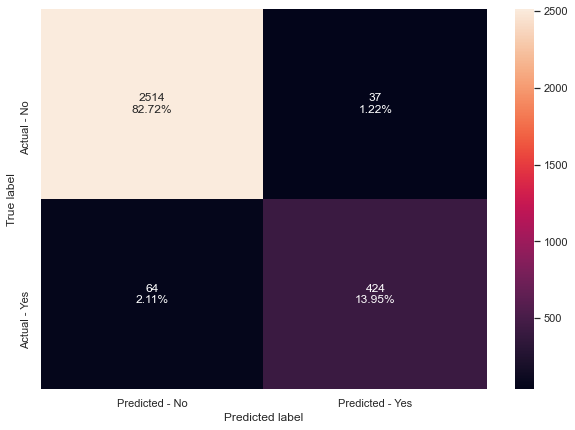

In [138]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(xgb,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(xgb,y_test)

- With k-fold cross validation on training set the avg recall score is 83%
- But when we fit the model on test set, it is over-fitting 
- Looking at the confusion matrix, False Negative is low, which is good
- True positives which are correct positive predictions is 14%, which is also very good for the model

#### Feature importance - XGBoost

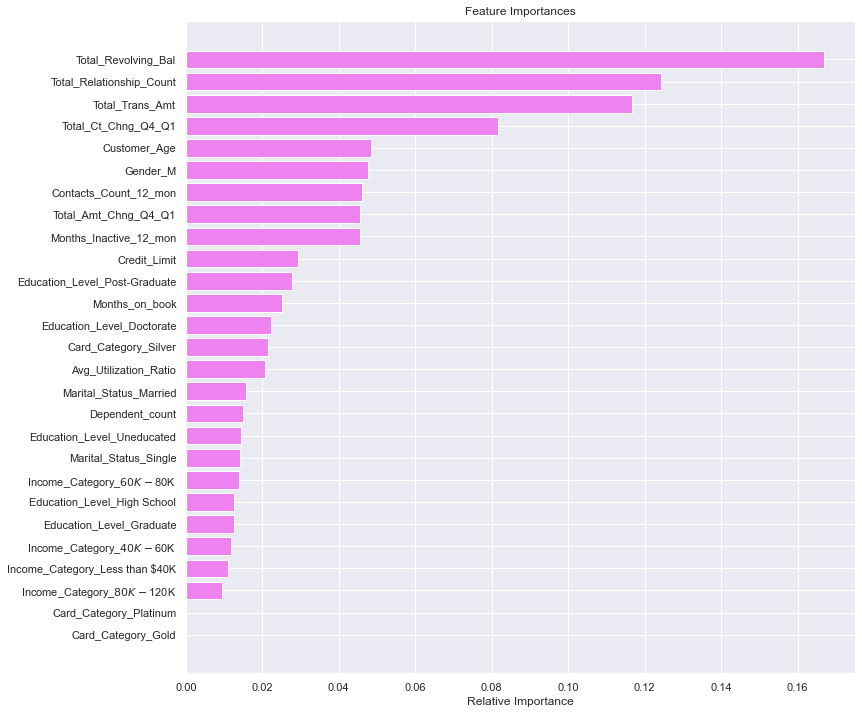

In [139]:
feature_names = X_train.columns
importances = xgb[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Revolving_Bal, Total_Relationship_Count are the 2 most important features impacting attrition from XGBoost
- This model is over-fitting on training data
- False Negative is low, which is good and True positive is improved a bit

#### Adaboost

In [140]:
abc = Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=1))
            ]
        )

abc.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('adaboost', AdaBoostClassifier(random_state=1))])

#### Evaluating model performance by using KFold and cross_val_score

In [141]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_abc=cross_val_score(estimator=abc, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_abc)
results.append(cv_result_abc)
names.append('ABC')
print("{}: {}".format('Mean recall score for AdaboostClassifier is', cv_result_abc.mean() * 100))

[0.68859649 0.77631579 0.71929825 0.76211454 0.73684211]
Mean recall score for AdaboostClassifier is: 73.66334338047761


- Performance on training set varies between 0.69 and 0.77 recall.

Accuracy on training set :  0.9398984198645598
Accuracy on test set :  0.935176044751563
Recall on training set :  0.7594381035996488
Recall on test set :  0.7274590163934426
Precision on training set :  0.8505408062930186
Precision on test set :  0.847255369928401


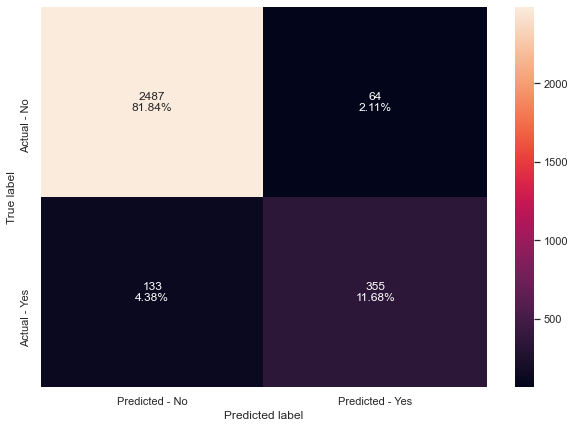

In [142]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(abc,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(abc,y_test)

- With k-fold cross validation on training set the avg recall score is 73.6%
- When we fit the model on test set, it is not over-fitting and gives good scores (test recall score 73% is almost same as avg CV score)
- Looking at the confusion matrix, False Negative is bit higher than xgboost
- True positives which are correct positive predictions is 12%, bit lower than xgboost 

#### Feature importance - Adaboost

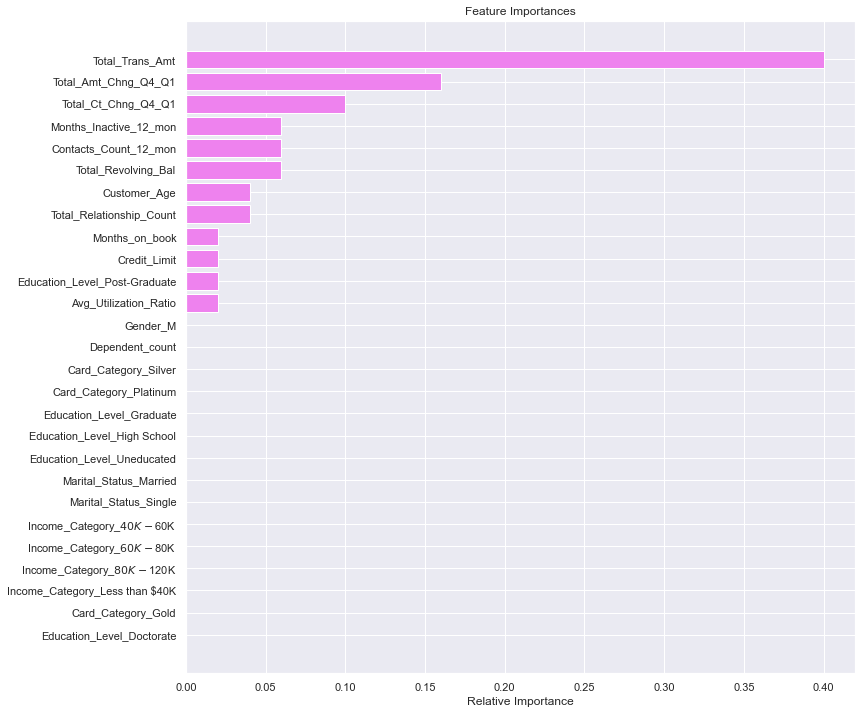

In [143]:
feature_names = X_train.columns
importances = abc[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Change in Transaction Amount (Q4 over Q1) are the 2 most important features impacting attrition as per AdaBoost model
- This model is not over-fitting on training data and gives good scores
- False Negative is bit higher than xgboost, and True positive is bit lower than xgboost

#### GradientBoostingClassifier

In [144]:
gbm = Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=1))
            ]
        )

gbm.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('gradient_boosting',
                 GradientBoostingClassifier(random_state=1))])

#### Evaluating model performance by using KFold and cross_val_score

In [145]:
scoring='recall'
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)  #Setting number of splits equal to 5
cv_result_gbm=cross_val_score(estimator=gbm, X=X_train, y=y_train, scoring=scoring, cv=kfold)
print(cv_result_gbm)
results.append(cv_result_gbm)
names.append('GBM')
print("{}: {}".format('Mean recall score for GradientboostClassifier is', cv_result_gbm.mean() * 100))

[0.75       0.8245614  0.71929825 0.74449339 0.76754386]
Mean recall score for GradientboostClassifier is: 76.11793801684829


- Performance on training set varies between 0.71 and 0.82 recall.

Accuracy on training set :  0.9631772009029346
Accuracy on test set :  0.9605133267522211
Recall on training set :  0.8252853380158033
Recall on test set :  0.805327868852459
Precision on training set :  0.93812375249501
Precision on test set :  0.9401913875598086


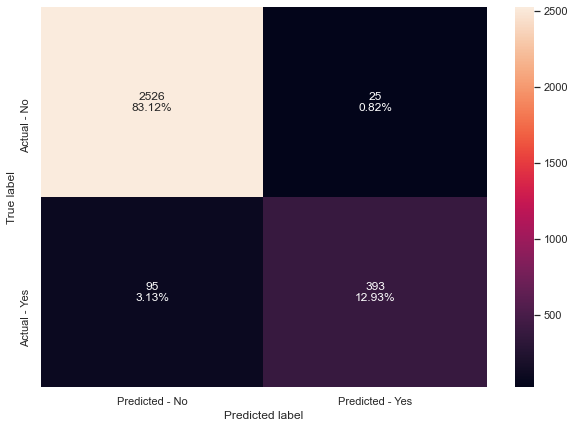

In [146]:
#Checking the performance on test dataset

#Calculating different metrics
get_metrics_score(gbm,X_train,X_test,y_train,y_test)

# creating confusion matrix
make_confusion_matrix(gbm,y_test)

- With k-fold cross validation on training set the avg recall score is 76.11%
- When we fit the model on test set, it is not over-fitting and gives good scores
- Looking at the confusion matrix, False Negative is lower and it is good
- True positives which are correct positive predictions is 13%, which is also very good for the model

#### Feature importance - GradientBoost

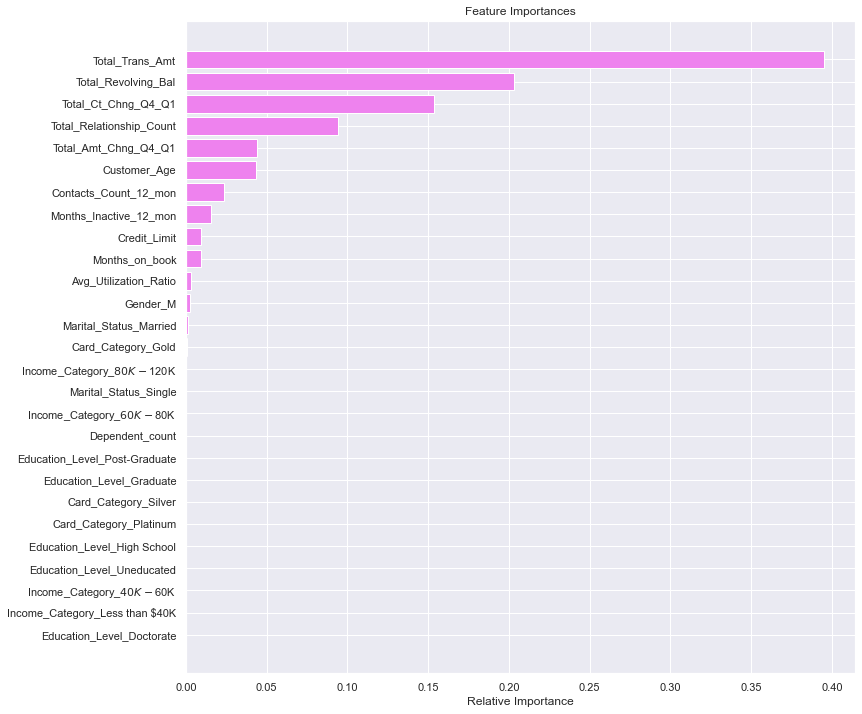

In [147]:
feature_names = X_train.columns
importances = gbm[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Total_Revolving_bal are the 2 most important features impacting attrition from GradientBoost
- This model is not over-fitting on training data and gives good scores
- False Negative is low, which is good

#### CV scores for all models in a boxplot with avg score for each model

       CV_Score1  CV_Score2  CV_Score3  CV_Score4  CV_Score5  AVG_Score
DTREE   0.714912   0.719298   0.726872   0.732456   0.771930   0.733094
RF      0.675439   0.684211   0.684211   0.691630   0.763158   0.699729
BC      0.714912   0.718062   0.723684   0.732456   0.820175   0.741858
XGB     0.798246   0.819383   0.824561   0.828947   0.877193   0.829666
ABC     0.688596   0.719298   0.736842   0.762115   0.776316   0.736633
GBM     0.719298   0.744493   0.750000   0.767544   0.824561   0.761179


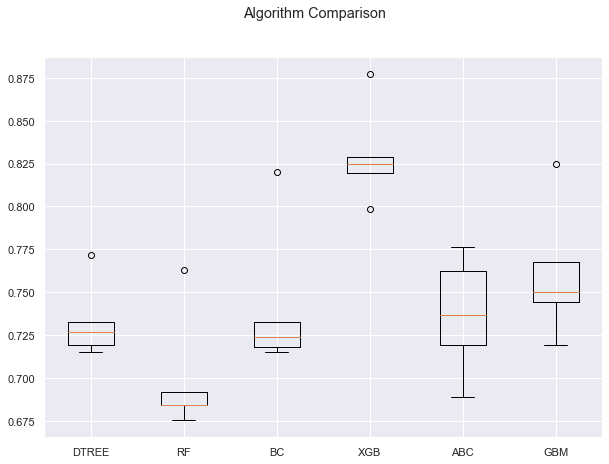

In [148]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

dfResults = pd.DataFrame(results,index=names,columns=['CV_Score1','CV_Score2','CV_Score3','CV_Score4','CV_Score5'])

#sorting the CV results for each model (row wise) and showing the max CV score at the end (last column) and avg score
a = dfResults.values
a.sort(axis=1)
dfResults1 = pd.DataFrame(a, dfResults.index, dfResults.columns)
dfResults1['AVG_Score'] = dfResults1.mean(axis=1)

print(dfResults1)

#print(results)

plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()

- We can see that XGBoost is giving the highest cross validated recall followed by GradientBoost
- We will tune all these models using GridSearch and RandomSearch and see if the performance improves.

#### Hyperparameter Tuning Using GridSearch

- Using pipelines with StandardScaler and each of the above model to tune the model using GridSearchCV and RandomizedSearchCV. 

- Since I have already used Pipeline() method to create pipelines in the above code, I am using make_pipeline() function here

#### Decision Tree - GridSearchCV

In [149]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='gini',class_weight={0:0.16,1:0.84},random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
              'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': np.arange(1,10,2),
              'decisiontreeclassifier__max_leaf_nodes' : np.arange(1,10,2),
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01],
              'decisiontreeclassifier__max_features': np.arange(0.2, 0.7, 0.2)
           }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'decisiontreeclassifier__max_depth': 4, 'decisiontreeclassifier__max_features': 0.4, 'decisiontreeclassifier__max_leaf_nodes': 9, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__min_samples_leaf': 1} 
Score: 0.8735837390833913
Wall time: 2min 49s


In [150]:
# Creating new pipeline with best parameters
dtree_tuned1 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        criterion='gini',class_weight={0:0.16,1:0.84},random_state=1,
        max_depth=4,
        max_leaf_nodes=9,
        min_samples_leaf=1,
        min_impurity_decrease=0.0001,
        max_features=0.4
    )
)

# Fit the model on training data
dtree_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84},
                                        max_depth=4, max_features=0.4,
                                        max_leaf_nodes=9,
                                        min_impurity_decrease=0.0001,
                                        random_state=1))])

Accuracy on training set :  0.7890801354401806
Accuracy on test set :  0.7811780190852254
Recall on training set :  0.9095697980684812
Recall on test set :  0.9098360655737705
Precision on training set :  0.42668863261943984
Precision on test set :  0.4169014084507042


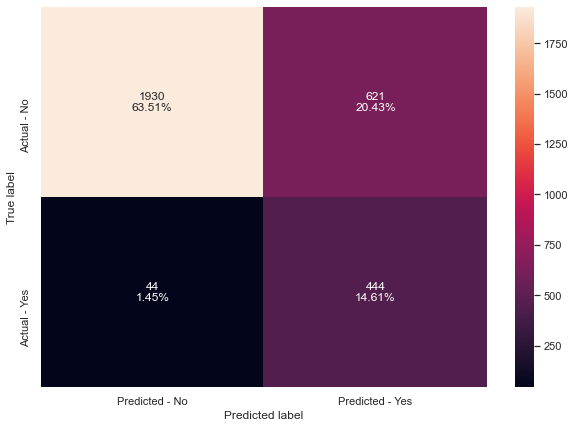

In [151]:
# Calculating different metrics
get_metrics_score(dtree_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned1, y_test)

- Recall on training set is 91% and recall on test set is 91%
- Train and test recall scores are very close and good
- Precision and accuracy scores are not good and can be improved
- False Negative is very low which is really good
- True positives which are correct positive predictions is 15%, which is also very good for the model

#### Feature importance - Decision Tree using GridSearch

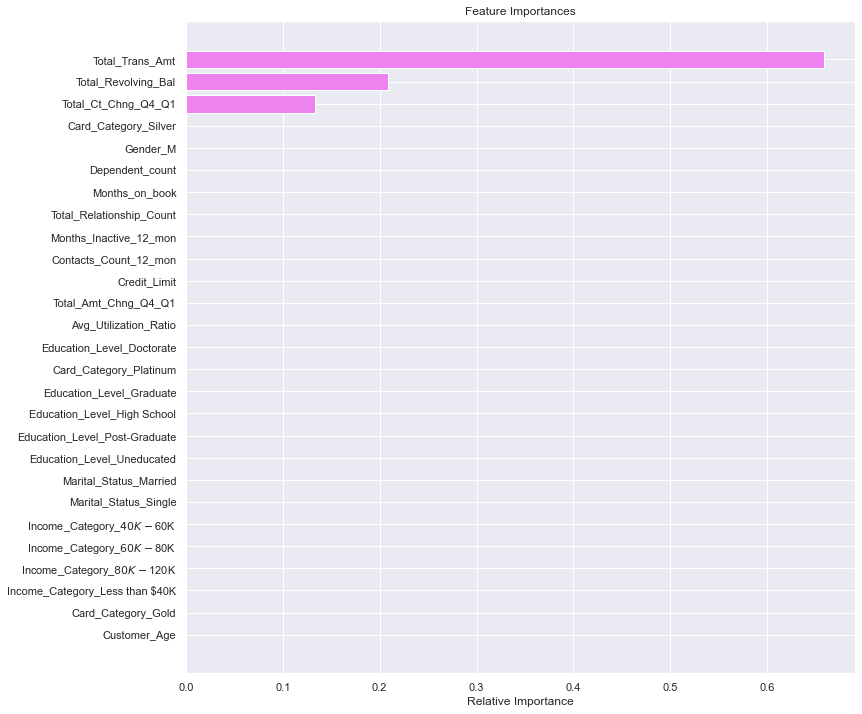

In [152]:
feature_names = X_train.columns
importances = dtree_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt,Total_Revolving_Bal are the 2 most important features impacting attrition as per Decision Tree using GridSearch
- Model gives good train and test scores, but accuracy and precision are low
- False Negative is low and True positive is high, which is good

#### Random Forest - GridSearchCV

In [153]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=1,class_weight={0:0.16,1:0.84}))

# Parameter grid to pass in GridSearchCV
param_grid = {
                "randomforestclassifier__max_depth": np.arange(1,10),
                "randomforestclassifier__n_estimators": [150,200,250],
                "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
                "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1)
               
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 8, 'randomforestclassifier__max_features': 0.6000000000000001, 'randomforestclassifier__min_samples_leaf': 6, 'randomforestclassifier__n_estimators': 150} 
Score: 0.9007921786845969
Wall time: 1h 7min 19s


In [154]:
# Creating new pipeline with best parameters
rf_tuned1 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        class_weight={0:0.16,1:0.84},random_state=1,
        max_features=0.6000000000000001,
        min_samples_leaf=6,
        n_estimators=150,
        max_depth=8
    )
)

# Fit the model on training data
rf_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.16, 1: 0.84},
                                        max_depth=8,
                                        max_features=0.6000000000000001,
                                        min_samples_leaf=6, n_estimators=150,
                                        random_state=1))])

Accuracy on training set :  0.9524548532731377
Accuracy on test set :  0.9381375452451465
Recall on training set :  0.9578577699736611
Recall on test set :  0.8995901639344263
Precision on training set :  0.7905797101449276
Precision on test set :  0.759515570934256


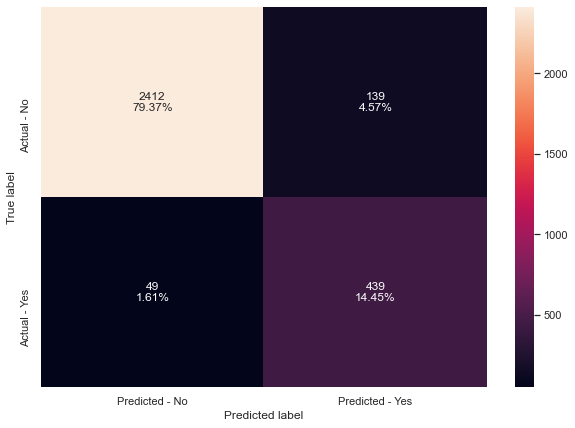

In [155]:
# Calculating different metrics
get_metrics_score(rf_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned1, y_test)

- Recall on training set is 96% and recall on test set is 90 %
- Precision and Accuracy scores have improved compared to Decision Tree tuned model using GridSearch
- Let us see if the difference b/w train and test recall scores can be improved further
- False Negative is low and that is really good for the bank
- True positives which are correct positive predictions is 14%, which is also very good for the model

#### Feature importance - Random Forest using GridSearch

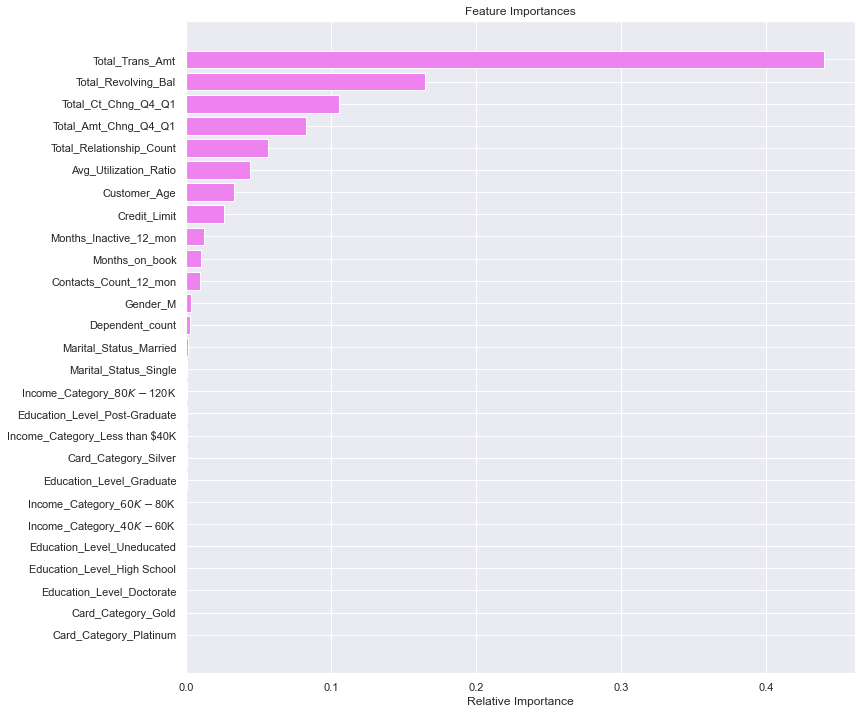

In [156]:
feature_names = X_train.columns
importances = rf_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Total_Revolving_bal are the 2 most important features impacting attrition as per Random Forest using GridSearch
- This model is not much over-fitting on training data and gives good scores (train,test scores are having difference though)
- False Negative is low and True positive is 14%, which is good

#### Bagging Classifier - GridSearchCV

In [157]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), BaggingClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
               'baggingclassifier__max_samples': np.arange(0.7,1.1,0.1), 
               'baggingclassifier__max_features': np.arange(0.7,1.1,0.1),
               'baggingclassifier__n_estimators' : np.arange(10,60,10)
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'baggingclassifier__max_features': 0.9999999999999999, 'baggingclassifier__max_samples': 0.8999999999999999, 'baggingclassifier__n_estimators': 50} 
Score: 0.7945784063683438
Wall time: 4min 15s


In [158]:
# Creating new pipeline with best parameters
bc_tuned1 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        random_state=1,
        max_features=0.9999999999999999,
        max_samples=0.8999999999999999,
        n_estimators=50
    )
)

# Fit the model on training data
bc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9999999999999999,
                                   max_samples=0.8999999999999999,
                                   n_estimators=50, random_state=1))])

Accuracy on training set :  0.9992945823927766
Accuracy on test set :  0.9598552155314248
Recall on training set :  0.9956101843722563
Recall on test set :  0.8299180327868853
Precision on training set :  1.0
Precision on test set :  0.9121621621621622


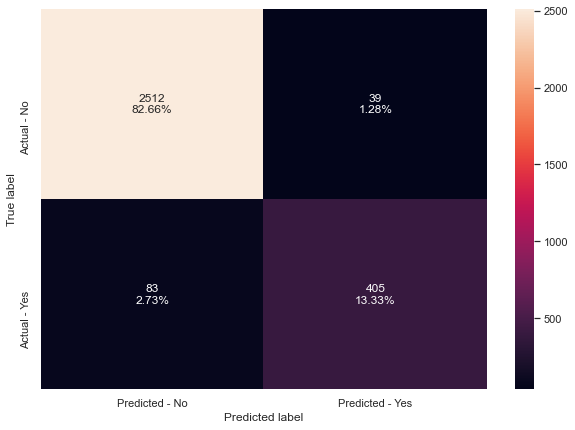

In [159]:
# Calculating different metrics
get_metrics_score(bc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bc_tuned1, y_test)

- Recall on training set is 99% and recall on test set is 83%
- The model shows over-fitting on training dataset
- False Negative increased and True positive decreased compared to the above 2 models

#### ***Bagging classifier has no feature importance attribute***

#### XGBoost - GridSearchCV

In [160]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), XGBClassifier(random_state=1,eval_metric='logloss'))

# Parameter grid to pass in GridSearchCV
param_grid = {
                  'xgbclassifier__n_estimators': np.arange(75,175,25), 
                  'xgbclassifier__subsample':np.arange(0.7,1.1,0.1),
                  'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
                  #'xgbclassifier__gamma':np.arange(0,6,1),
                  'xgbclassifier__colsample_bytree':np.arange(0.5,1.0,0.2),
                  'xgbclassifier__colsample_bylevel':np.arange(0.5,1.0,0.2),
                  'xgbclassifier__scale_pos_weight':np.arange(5,7,1)
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'xgbclassifier__colsample_bylevel': 0.8999999999999999, 'xgbclassifier__colsample_bytree': 0.7, 'xgbclassifier__learning_rate': 0.05, 'xgbclassifier__n_estimators': 100, 'xgbclassifier__scale_pos_weight': 6, 'xgbclassifier__subsample': 0.7} 
Score: 0.9306476543782363
Wall time: 44min 32s


In [161]:
# Creating new pipeline with best parameters
xgb_tuned1 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        eval_metric='logloss',
        n_estimators=100,
        subsample=0.7,
        learning_rate=0.05,
        #gamma=5,
        colsample_bytree=0.7,
        colsample_bylevel=0.8999999999999999,
        scale_pos_weight=6
    )
)

# Fit the model on training data
xgb_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.8999999999999999,
                               colsample_bynode=1, colsample_bytree=0.7,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=6,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9672686230248307
Accuracy on test set :  0.9516288252714709
Recall on training set :  0.990342405618964
Recall on test set :  0.9385245901639344
Precision on training set :  0.8361749444032617
Precision on test set :  0.7965217391304348


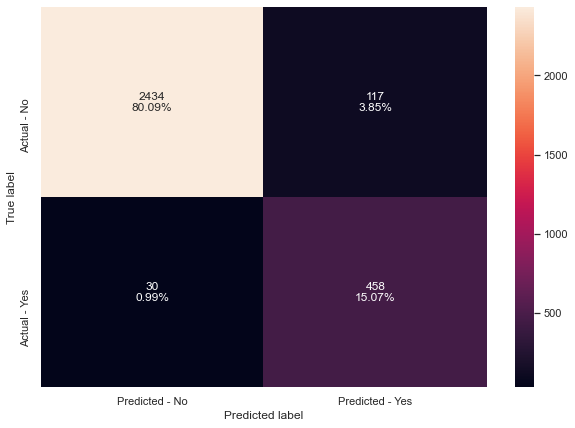

In [162]:
# Calculating different metrics
get_metrics_score(xgb_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned1, y_test)

- Recall on training set is 99% and recall on test set is 94%
- Precision and Accuracy scores are good
- False Negative is low and that is really good for the bank
- True positives which are correct positive predictions is 15%, which is also very good for the model

#### Feature importance - XGBoost using GridSearch

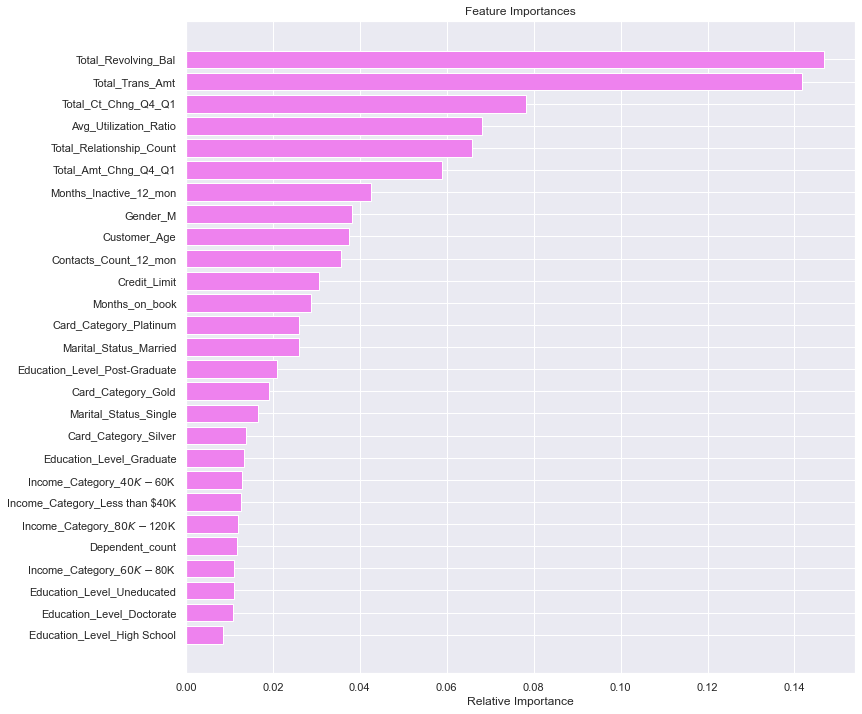

In [163]:
feature_names = X_train.columns
importances = xgb_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Revolving_bal,Total_Trans_Amt are the 2 most important features impacting attrition from XGBoost using GridSearch
- This model is not over-fitting on training data and gives good scores
- False Negative is very low, which is good
- True positive is 15% which is also good

#### Adaboost - GridSearchCV

In [164]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), AdaBoostClassifier(random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
                "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
                "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
                "adaboostclassifier__base_estimator": [
                                                        DecisionTreeClassifier(max_depth=1, random_state=1),
                                                        DecisionTreeClassifier(max_depth=2, random_state=1),
                                                        DecisionTreeClassifier(max_depth=3, random_state=1),
                                                      ]
            }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=2, random_state=1), 'adaboostclassifier__learning_rate': 1, 'adaboostclassifier__n_estimators': 70} 
Score: 0.825295617899374
Wall time: 7min 3s


In [165]:
# Creating new pipeline with best parameters
abc_tuned1 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        random_state=1,        
        n_estimators=70,
        learning_rate=1,
        base_estimator=DecisionTreeClassifier(max_depth=2, random_state=1)
    )
)

# Fit the model on training data
abc_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                          random_state=1),
                                    learning_rate=1, n_estimators=70,
                                    random_state=1))])

Accuracy on training set :  0.9789785553047404
Accuracy on test set :  0.9608423823626193
Recall on training set :  0.9183494293239683
Recall on test set :  0.8647540983606558
Precision on training set :  0.9491833030852994
Precision on test set :  0.888421052631579


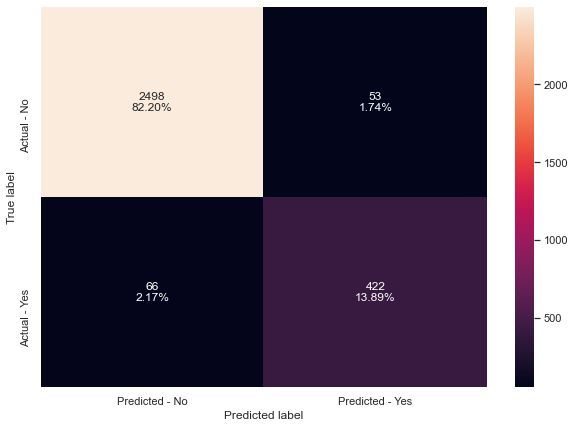

In [166]:
# Calculating different metrics
get_metrics_score(abc_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned1, y_test)

- Recall on training set is 91% and recall on test set is 86 %
- Precision and Accuracy scores are good, will see if the train Vs test recall difference is improved with other models
- False Negative slightly went up compared to XGBoost with GridSearch
- True positive slightly went down compared to XGBoost with GridSearch

#### Feature importance - Adaboost using GridSearch

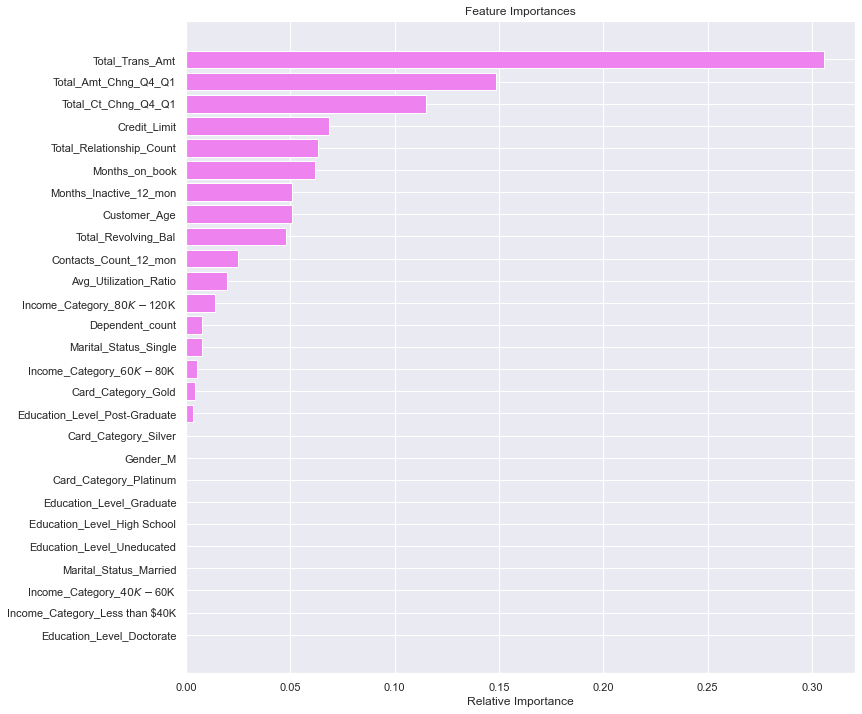

In [167]:
feature_names = X_train.columns
importances = abc_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Change in Transaction Amount (Q4 over Q1) are the 2 most important features impacting attrition from Adaboost using GridSearch
- This model is not over-fitting on training data and gives good scores
- False Negative slightly went up compared to XGBoost with GridSearch
- True positive slightly went down compared to XGBoost with GridSearch

#### Gradientboost - GridSearchCV

In [168]:
%%time 

# Creating pipeline
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))

# Parameter grid to pass in GridSearchCV
param_grid = {
                  'gradientboostingclassifier__n_estimators': np.arange(50,200,25), 
                  'gradientboostingclassifier__subsample':np.arange(0.7,1.1,0.1),
                  'gradientboostingclassifier__max_features':np.arange(0.7,1.1,0.1)
                  
              }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)


# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'gradientboostingclassifier__max_features': 0.8999999999999999, 'gradientboostingclassifier__n_estimators': 175, 'gradientboostingclassifier__subsample': 0.7999999999999999} 
Score: 0.8147693021099004
Wall time: 10min 41s


In [169]:
# Creating new pipeline with best parameters
gbm_tuned1 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,        
        n_estimators=175,
        subsample=0.7999999999999999,
        max_features=0.8999999999999999,
        init=AdaBoostClassifier(random_state=1)
    )
)

# Fit the model on training data
gbm_tuned1.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.8999999999999999,
                                            n_estimators=175, random_state=1,
                                            subsample=0.7999999999999999))])

Accuracy on training set :  0.9734762979683973
Accuracy on test set :  0.9638038828562027
Recall on training set :  0.887620719929763
Recall on test set :  0.8422131147540983
Precision on training set :  0.9439775910364145
Precision on test set :  0.9256756756756757


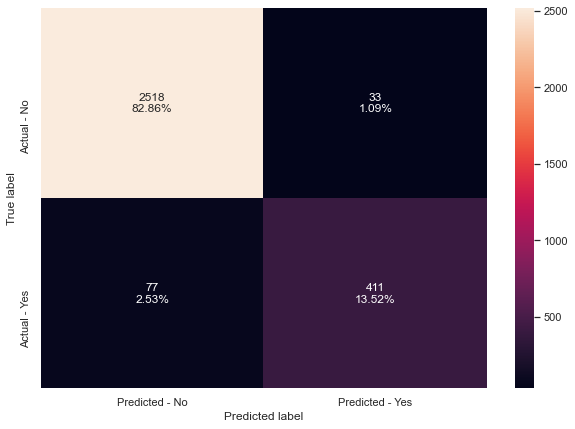

In [170]:
# Calculating different metrics
get_metrics_score(gbm_tuned1,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned1, y_test)

- Recall on training set is 88% and recall on test set is 84 %
- Precision and Accuracy scores are good too
- False Negative slightly went up compared to XGBoost with GridSearch
- True positive slightly went down compared to XGBoost with GridSearch

#### Feature importance - GradientBoost using GridSearch

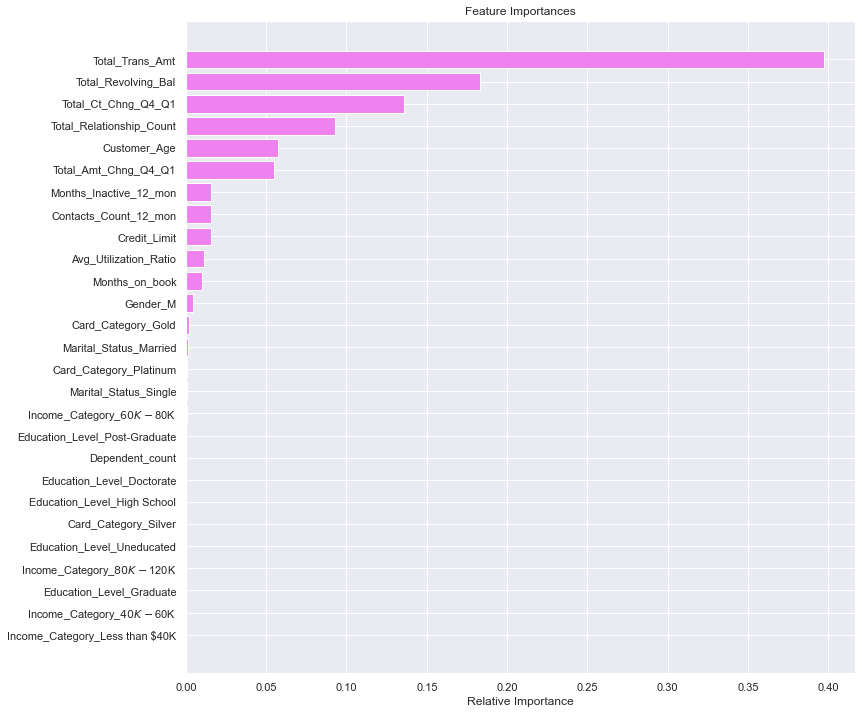

In [171]:
feature_names = X_train.columns
importances = gbm_tuned1[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Total_Revolving_bal are the 2 most important features impacting attrition from Gradient Boost using GridSearch
- This model is not over-fitting on training data and gives good scores
- False Negative slightly went up compared to XGBoost with GridSearch
- True positive slightly went down compared to XGBoost with GridSearch

#### Hyperparameter Tuning Using RandomSearch

- Using pipelines with StandardScaler and each of the above model to tune the model using RandomizedSearchCV
- Using make_pipeline() function to create pipeline

#### Decision Tree - RandomizedSearchCV

In [172]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),DecisionTreeClassifier(criterion='gini',class_weight={0:0.16,1:0.84},random_state=1))

#Parameter distribution to pass in RandomSearchCV
param_dist={
              'decisiontreeclassifier__max_depth': np.arange(1,10), 
              'decisiontreeclassifier__min_samples_leaf': np.arange(1,10,2),
              'decisiontreeclassifier__max_leaf_nodes' : np.arange(1,10,2),
              'decisiontreeclassifier__min_impurity_decrease': [0.0001,0.001,0.01],
              'decisiontreeclassifier__max_features': np.arange(0.2, 0.7, 0.2)
           }




# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_dist, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'decisiontreeclassifier__min_samples_leaf': 3, 'decisiontreeclassifier__min_impurity_decrease': 0.0001, 'decisiontreeclassifier__max_leaf_nodes': 9, 'decisiontreeclassifier__max_features': 0.6000000000000001, 'decisiontreeclassifier__max_depth': 9} with CV score=0.8577672153953164:
Wall time: 4.27 s


In [173]:
# Creating new pipeline with best parameters
dtree_tuned2 = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier(
        criterion='gini',class_weight={0:0.16,1:0.84},random_state=1,        
        max_depth=9,        
        min_samples_leaf=3,
        min_impurity_decrease=0.0001,
        max_leaf_nodes=9,
        max_features=0.6000000000000001
    )
)

# Fit the model on training data
dtree_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(class_weight={0: 0.16, 1: 0.84},
                                        max_depth=9,
                                        max_features=0.6000000000000001,
                                        max_leaf_nodes=9,
                                        min_impurity_decrease=0.0001,
                                        min_samples_leaf=3, random_state=1))])

Accuracy on training set :  0.8283013544018059
Accuracy on test set :  0.8219809147745969
Recall on training set :  0.8560140474100087
Recall on test set :  0.8381147540983607
Precision on training set :  0.4807692307692308
Precision on test set :  0.4695752009184845


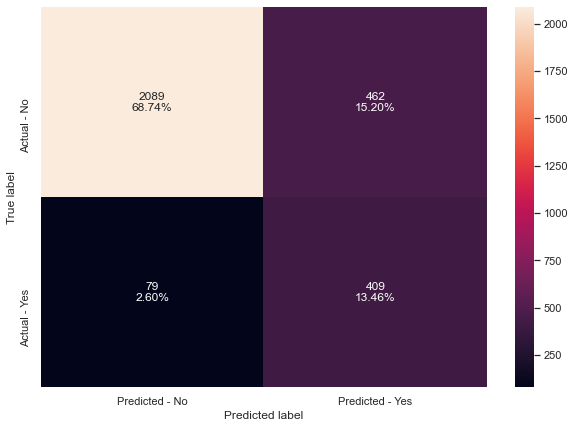

In [174]:
# Calculating different metrics
get_metrics_score(dtree_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(dtree_tuned2, y_test)

- Recall on training set is 86% and recall on test set is 84%
- Which is good, since it is not showing overfit and gives good results
- But precision scores can be improved
- Looking at the confusion matrix, False Negative is low, which is good, as explained in "how to interpret confusion matrix"
- True positives which are correct positive predictions is 13%, which is also good for the model

#### Feature importance - Decision Tree using Random Search

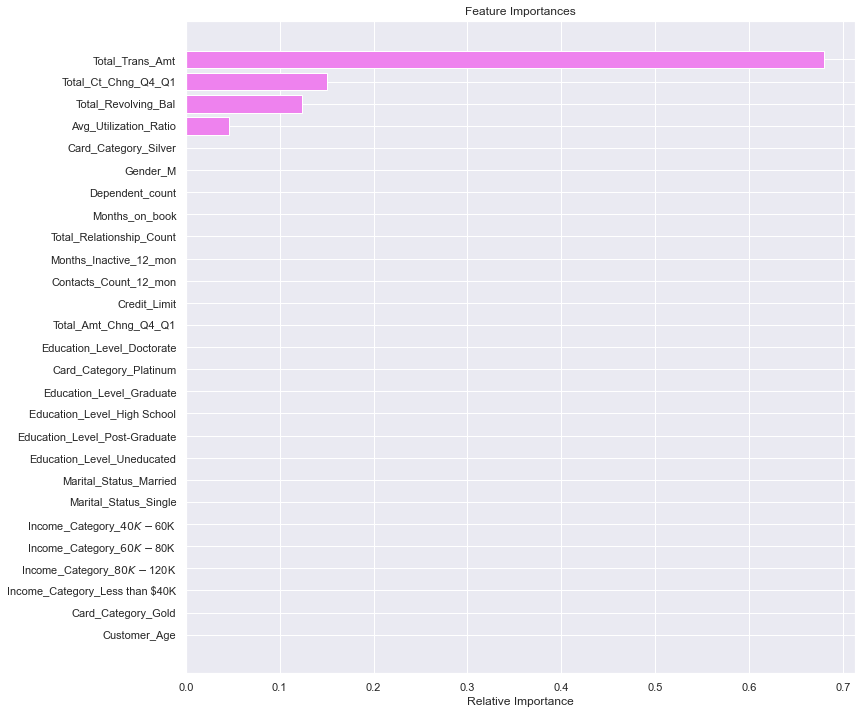

In [175]:
feature_names = X_train.columns
importances = dtree_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt,Change in Transaction Count (Q4 over Q1),Total_Revolving_Bal are the most important features impacting attrition as per Decision Tree using Random Search
- This model is not over-fitting on training data and gives good scores
- False Negative is low and True positive is 13% which is good

#### Random Forest - RandomizedSearchCV

In [176]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),RandomForestClassifier(random_state=1,class_weight={0:0.16,1:0.84}))

#Parameter distribution to pass in RandomSearchCV
param_dist= {
                "randomforestclassifier__max_depth": np.arange(1,10),
                "randomforestclassifier__n_estimators": [150,200,250],
                "randomforestclassifier__min_samples_leaf": np.arange(5, 10),
                "randomforestclassifier__max_features": np.arange(0.2, 0.7, 0.1)
               
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_dist, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 150, 'randomforestclassifier__min_samples_leaf': 9, 'randomforestclassifier__max_features': 0.6000000000000001, 'randomforestclassifier__max_depth': 9} with CV score=0.8981605997372286:
Wall time: 5min 1s


In [177]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(
        class_weight={0:0.16,1:0.84},
        random_state=1,
        max_features=0.6000000000000001,
        min_samples_leaf=9,
        n_estimators=150,
        max_depth=9
    )
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.16, 1: 0.84},
                                        max_depth=9,
                                        max_features=0.6000000000000001,
                                        min_samples_leaf=9, n_estimators=150,
                                        random_state=1))])

Accuracy on training set :  0.9513261851015802
Accuracy on test set :  0.9368213228035538
Recall on training set :  0.9587357330992098
Recall on test set :  0.9036885245901639
Precision on training set :  0.7856115107913669
Precision on test set :  0.7525597269624573


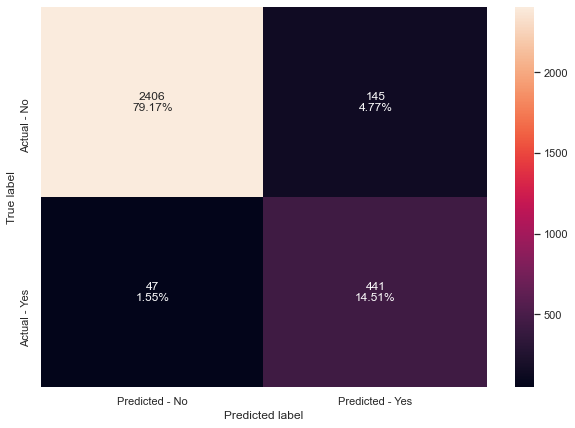

In [178]:
# Calculating different metrics
get_metrics_score(rf_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(rf_tuned2, y_test)

- Recall on training set is 96% and recall on test set is 90%
- Precision and Accuracy scores have improved compared to Decision Tree tuned model using RandomSearch
- Looking at the confusion matrix, False Negative is low, which is good
- True positives which are correct positive predictions is 14%, which is also very good for the model

#### Feature importance - Random Forest using Random Search

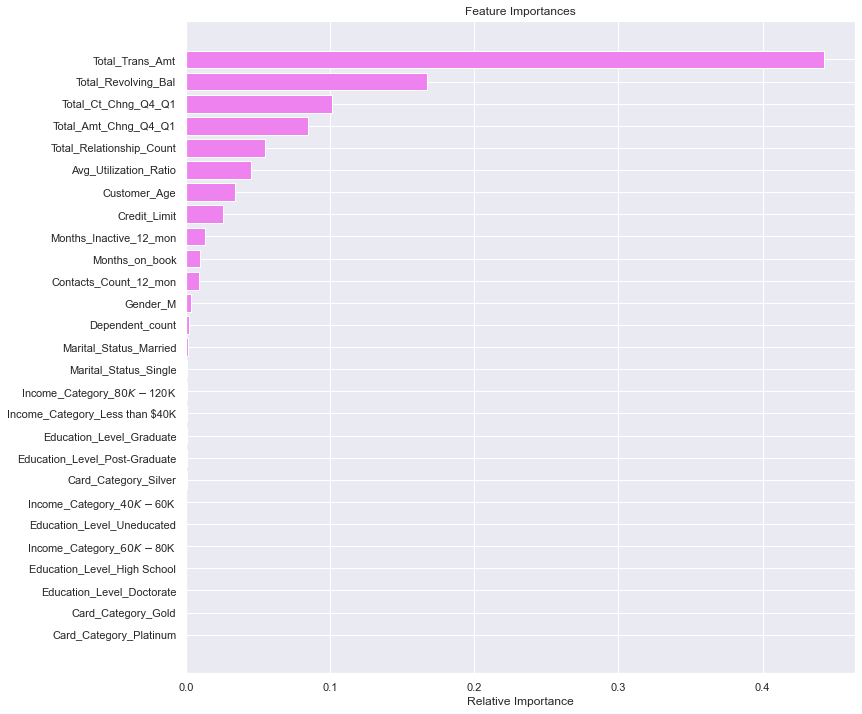

In [179]:
feature_names = X_train.columns
importances = rf_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Total_Revolving_bal are the 2 most important features impacting attrition from Random Forest using Random Search
- This model is not over-fitting on training data and gives good scores
- False Negative is low and True positive is 14% which is good

#### Bagging Classifier - RandomizedSearchCV

In [180]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),BaggingClassifier(random_state=1))

#Parameter distribution to pass in RandomSearchCV
param_dist= {
               'baggingclassifier__max_samples': np.arange(0.7,1.1,0.1), 
               'baggingclassifier__max_features': np.arange(0.7,1.1,0.1),
               'baggingclassifier__n_estimators' : np.arange(10,60,10)
             }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_dist, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 40, 'baggingclassifier__max_samples': 0.7999999999999999, 'baggingclassifier__max_features': 0.9999999999999999} with CV score=0.7840520905788702:
Wall time: 1min 31s


In [181]:
# Creating new pipeline with best parameters
bc_tuned2 = make_pipeline(
    StandardScaler(),
    BaggingClassifier(
        random_state=1,
        max_features=0.9999999999999999,
        max_samples=0.7999999999999999,
        n_estimators=40
    )
)

# Fit the model on training data
bc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingclassifier',
                 BaggingClassifier(max_features=0.9999999999999999,
                                   max_samples=0.7999999999999999,
                                   n_estimators=40, random_state=1))])

Accuracy on training set :  0.9974604966139955
Accuracy on test set :  0.9555774925962488
Recall on training set :  0.9850746268656716
Recall on test set :  0.8012295081967213
Precision on training set :  0.9991095280498664
Precision on test set :  0.9114219114219114


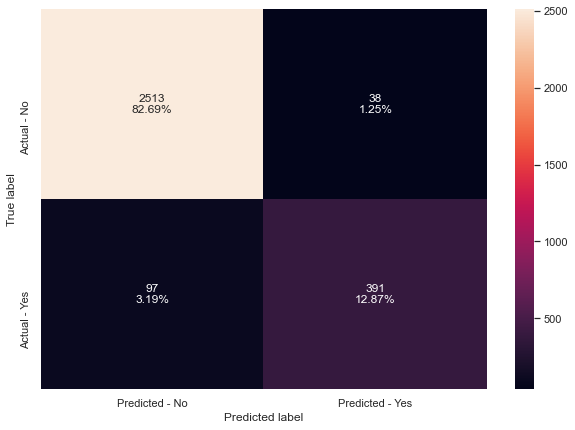

In [182]:
# Calculating different metrics
get_metrics_score(bc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(bc_tuned2, y_test)

- Recall on training set is 98% and recall on test set is 80%
- The model shows over-fitting on training dataset
- Looking at the confusion matrix, False Negative is high compared to all other models so far
- True positives which are correct positive predictions is 13%, which is low compared to other models so far

#### ***Bagging Classifier has no feature importance attribute***

#### XGBoost - RandomizedSearchCV

In [183]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),XGBClassifier(random_state=1,eval_metric='logloss'))

#Parameter distribution to pass in RandomSearchCV
param_dist= {
                  'xgbclassifier__n_estimators': np.arange(75,175,25), 
                  'xgbclassifier__subsample':np.arange(0.7,1.1,0.1),
                  'xgbclassifier__learning_rate':[0.01,0.1,0.2,0.05],
                  #'xgbclassifier__gamma':np.arange(0,6,1),
                  'xgbclassifier__colsample_bytree':np.arange(0.5,1.0,0.2),
                  'xgbclassifier__colsample_bylevel':np.arange(0.5,1.0,0.2),
                  'xgbclassifier__scale_pos_weight':np.arange(5,7,1)
              }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_dist, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'xgbclassifier__subsample': 0.7, 'xgbclassifier__scale_pos_weight': 6, 'xgbclassifier__n_estimators': 75, 'xgbclassifier__learning_rate': 0.1, 'xgbclassifier__colsample_bytree': 0.5, 'xgbclassifier__colsample_bylevel': 0.8999999999999999} with CV score=0.921864131694876:
Wall time: 1min 18s


In [184]:
# Creating new pipeline with best parameters
xgb_tuned2 = make_pipeline(
    StandardScaler(),
    XGBClassifier(
        random_state=1,
        eval_metric='logloss',
        n_estimators=75,
        subsample=0.7,
        learning_rate=0.1,
        #gamma=5,
        colsample_bytree=0.5,
        colsample_bylevel=0.8999999999999999,
        scale_pos_weight=6
    )
)

# Fit the model on training data
xgb_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.8999999999999999,
                               colsample_bynode=1, colsample_bytree=0.5,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=75,
                               n_jobs=8, num_parallel_tree=1, random_state=1,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=6,
                               subsample=0.7, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

Accuracy on training set :  0.9748871331828443
Accuracy on test set :  0.953932214544258
Recall on training set :  0.9982440737489026
Recall on test set :  0.9385245901639344
Precision on training set :  0.865955826351866
Precision on test set :  0.8063380281690141


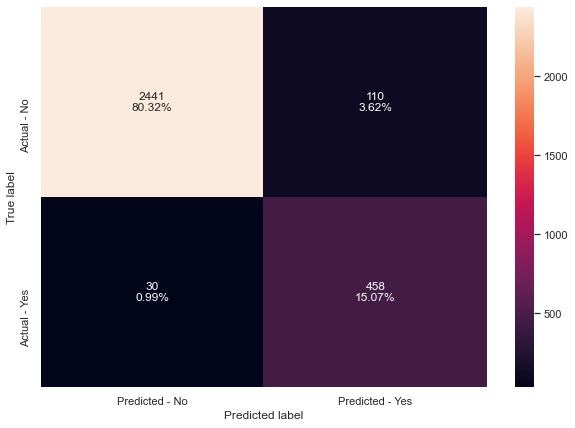

In [185]:
# Calculating different metrics
get_metrics_score(xgb_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb_tuned2, y_test)

- Recall on training set is 99% and recall on test set is 94 %
- Precision and Accuracy scores are good
- Looking at the confusion matrix, False Negative is very low, which is good, as explained in "how to interpret confusion matrix"
- True positives which are correct positive predictions is 15%, which is also very good for the model

#### Feature importance - XGBoost using Random Search

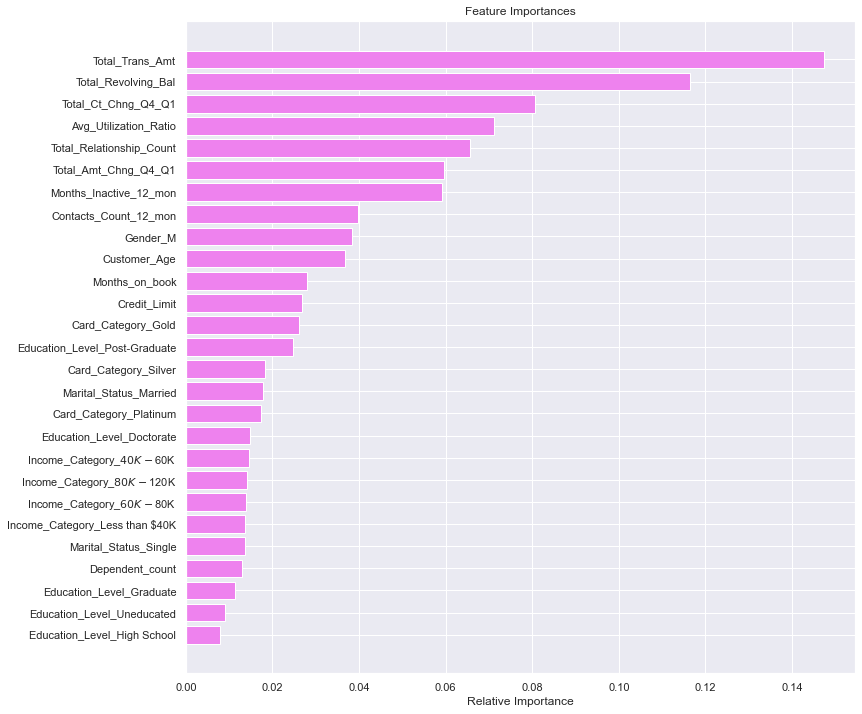

In [186]:
feature_names = X_train.columns
importances = xgb_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Total_Revolving_bal are the 2 most important features impacting attrition from XGBoost using Random Search
- This model is not over-fitting on training data and gives good scores
- False Negative is very low and true positive is higher, which is good

#### Adaboost - RandomizedSearchCV

In [187]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),AdaBoostClassifier(random_state=1))

#Parameter distribution to pass in RandomSearchCV
param_dist= {
                "adaboostclassifier__n_estimators": np.arange(10, 110, 10),
                "adaboostclassifier__learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
                "adaboostclassifier__base_estimator": [
                                                        DecisionTreeClassifier(max_depth=1, random_state=1),
                                                        DecisionTreeClassifier(max_depth=2, random_state=1),
                                                        DecisionTreeClassifier(max_depth=3, random_state=1),
                                                      ]
            }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_dist, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'adaboostclassifier__n_estimators': 90, 'adaboostclassifier__learning_rate': 0.2, 'adaboostclassifier__base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8200247314321045:
Wall time: 2min 28s


In [188]:
# Creating new pipeline with best parameters
abc_tuned2 = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier(
        random_state=1,        
        n_estimators=90,
        learning_rate=0.2,
        base_estimator=DecisionTreeClassifier(max_depth=3, random_state=1)
    )
)

# Fit the model on training data
abc_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('adaboostclassifier',
                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                          random_state=1),
                                    learning_rate=0.2, n_estimators=90,
                                    random_state=1))])

Accuracy on training set :  0.9825056433408578
Accuracy on test set :  0.9667653833497861
Recall on training set :  0.926251097453907
Recall on test set :  0.8524590163934426
Precision on training set :  0.9634703196347032
Precision on test set :  0.9348314606741573


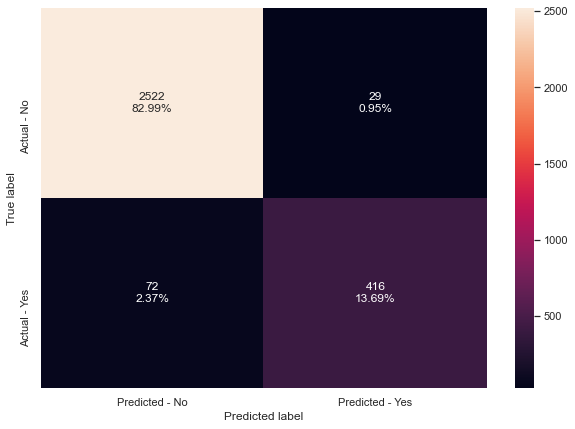

In [189]:
# Calculating different metrics
get_metrics_score(abc_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(abc_tuned2, y_test)

- Recall on training set is 92% and recall on test set is 85 %
- Precision and Accuracy scores are good too
- Looking at the confusion matrix, False Negative is low, which is good, bit more compared to xgboost
- True positives which are correct positive predictions is 13%, slightly lower than xgboost

#### Feature importance - Adaboost using Random Search

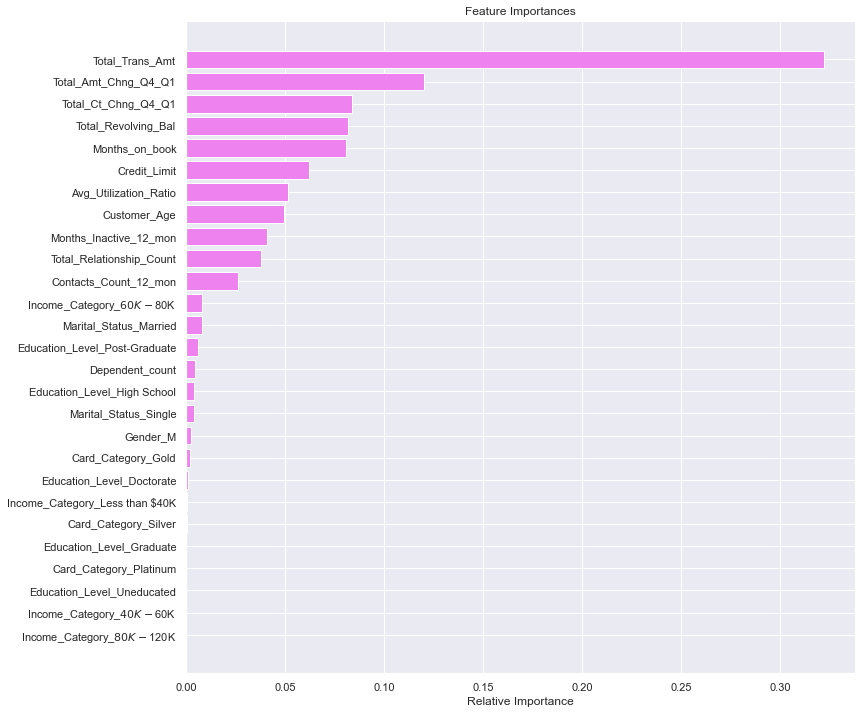

In [190]:
feature_names = X_train.columns
importances = abc_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Change in Transaction Amount (Q4 over Q1) are the 2 most important features impacting attrition from Adaboost using Random Search
- This model is not over-fitting on training data and gives good scores
- Looking at the confusion matrix, False Negative is low, which is good, bit more compared to xgboost
- True positives which are correct positive predictions is 13%, slightly lower than xgboost

#### GradientBoost - RandomizedSearchCV

In [191]:
%%time 

#Creating pipeline
pipe=make_pipeline(StandardScaler(),GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1))

#Parameter distribution to pass in RandomSearchCV
param_dist= {
                  'gradientboostingclassifier__n_estimators': np.arange(50,200,25), 
                  'gradientboostingclassifier__subsample':np.arange(0.7,1.1,0.1),
                  'gradientboostingclassifier__max_features':np.arange(0.7,1.1,0.1)
                  
              }



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_dist, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'gradientboostingclassifier__subsample': 0.7999999999999999, 'gradientboostingclassifier__n_estimators': 175, 'gradientboostingclassifier__max_features': 0.7999999999999999} with CV score=0.8095022799288971:
Wall time: 3min 33s


In [192]:
# Creating new pipeline with best parameters
gbm_tuned2 = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(
        random_state=1,        
        n_estimators=175,
        subsample=0.7999999999999999,
        max_features=0.7999999999999999,
        init=AdaBoostClassifier(random_state=1)
    )
)

# Fit the model on training data
gbm_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                            max_features=0.7999999999999999,
                                            n_estimators=175, random_state=1,
                                            subsample=0.7999999999999999))])

Accuracy on training set :  0.9738995485327314
Accuracy on test set :  0.9624876604146101
Recall on training set :  0.8937664618086041
Recall on test set :  0.8381147540983607
Precision on training set :  0.9408502772643254
Precision on test set :  0.9211711711711712


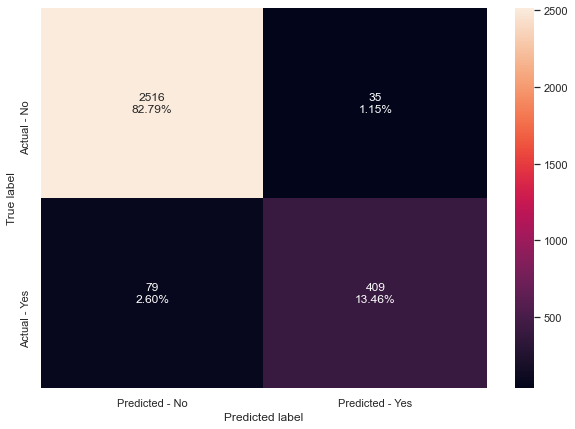

In [193]:
# Calculating different metrics
get_metrics_score(gbm_tuned2,X_train,X_test,y_train,y_test)

# Creating confusion matrix
make_confusion_matrix(gbm_tuned2, y_test)

- Recall on training set is 89% and recall on test set is 84 %
- Precision and Accuracy scores are good
- Looking at the confusion matrix, False Negative is low, which is good, as explained in "how to interpret confusion matrix"
- True positives which are correct positive predictions is 13.5%, which is also good for the model

#### Feature importance - GradientBoost using Random Search

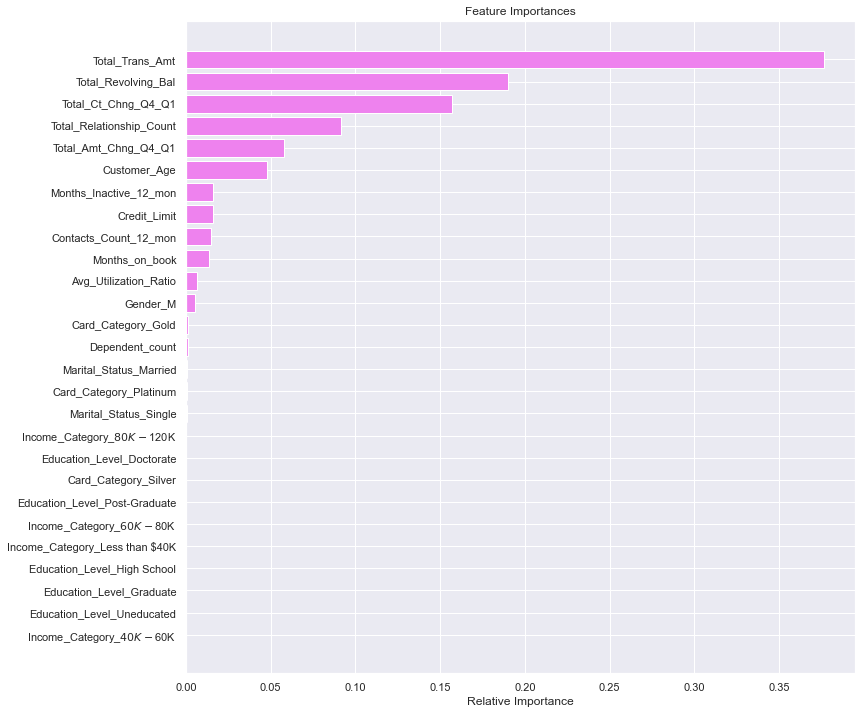

In [194]:
feature_names = X_train.columns
importances = gbm_tuned2[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- Total_Trans_Amt, Total_Revolving_bal are the 2 most important features impacting attrition from Gradient Boost using Random Search
- This model is not over-fitting on training data and gives good scores
- False negative and true positive also good from confusion matrix

#### Comparing models

In [195]:
# defining list of model - logistic regression
models = [lr]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [196]:
# defining list of models - logistic regression over-sampling,regularization
models = [log_reg_over, lr_estimator]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_over,X_test,y_train_over,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [197]:
# defining list of model - logistic regression undersampling
models = [log_reg_under]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [198]:
# defining list of model - Bagging/Boosting without hyper parameter tuning
models = [dtree,rf,bc,xgb,abc,gbm]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [199]:
# defining list of model - Bagging/Boosting with hyper parameter tuning using GridSearch
models = [dtree_tuned1,rf_tuned1,bc_tuned1,xgb_tuned1,abc_tuned1,gbm_tuned1]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [200]:
# defining list of model - Bagging/Boosting with hyper parameter tuning using RandomSearch
models = [dtree_tuned2,rf_tuned2,bc_tuned2,xgb_tuned2,abc_tuned2,gbm_tuned2]

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train_un,X_test,y_train_un,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])

In [201]:
comparison_frame = pd.DataFrame(
    
    {
      'Model':['Logistic Regression',
              'Logistic Regression - Oversampled data',
              'Logistic Regression-Regularized-OversampledData',
              'Logistic Regression - Undersampled data',
               'Decision Tree Classifier',
               'RandomForest Classifier',
               'Bagging Classifier',
               'XGBoost Classifier',
               'Adaboost Classifier',
               'GradientBoost Classifier',
               'Decision Tree - GridSearch',
               'RandomForest - GridSearch',
               'Bagging - GridSearch',
               'XGBoost - GridSearch',
               'Adaboost - GridSearch',
               'GradientBoost - GridSearch',
               'Decision Tree - RandomSearch',
               'RandomForest - RandomSearch',
               'Bagging - RandomSearch',
               'XGBoost - RandomSearch',
               'Adaboost - RandomSearch',
               'GradientBoost - RandomSearch'
               
              ], 
      'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
      'Train_Recall':recall_train,'Test_Recall':recall_test,
      'Train_Precision':precision_train,'Test_Precision':precision_test
    }
) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  \
19                           XGBoost - RandomSearch        0.983319   
13                             XGBoost - GridSearch        0.974539   
10                       Decision Tree - GridSearch        0.825285   
17                      RandomForest - RandomSearch        0.948639   
11                        RandomForest - GridSearch        0.951273   
7                                XGBoost Classifier        1.000000   
14                            Adaboost - GridSearch        0.952590   
20                          Adaboost - RandomSearch        0.959614   
15                       GradientBoost - GridSearch        0.936787   
16                     Decision Tree - RandomSearch        0.830992   
21                     GradientBoost - RandomSearch        0.938543   
12                             Bagging - GridSearch        0.997805   
9                          GradientBoost Classifier        0.906058   
18                           Bagging - RandomSearch        0.992537   
6                                Bagging Classifier        0.988586   
4                          Decision Tree Classifier        1.000000   
8                               Adaboost Classifier        0.863477   
5                           RandomForest Classifier        1.000000   
3           Logistic Regression - Undersampled data        0.739245   
1            Logistic Regression - Oversampled data        0.787779   
2   Logistic Regression-Regularized-OversampledData        0.702975   
0                               Logistic Regression        0.879515   

    Test_Accuracy  Train_Recall  Test_Recall  Train_Precision  Test_Precision  
19       0.953932      0.998244     0.938525         0.969309        0.806338  
13       0.951629      0.990342     0.938525         0.960000        0.796522  
10       0.781178      0.909570     0.909836         0.778362        0.416901  
17       0.936821      0.958736     0.903689         0.939759        0.752560  
11       0.938138      0.957858     0.899590         0.945407        0.759516  
7        0.966765      1.000000     0.868852         1.000000        0.919740  
14       0.960842      0.918349     0.864754         0.985862        0.888421  
20       0.966765      0.926251     0.852459         0.992474        0.934831  
15       0.963804      0.887621     0.842213         0.984421        0.925676  
16       0.821981      0.856014     0.838115         0.815217        0.469575  
21       0.962488      0.893766     0.838115         0.981678        0.921171  
12       0.959855      0.995610     0.829918         1.000000        0.912162  
9        0.960513      0.825285     0.805328         0.984293        0.940191  
18       0.955577      0.985075     0.801230         1.000000        0.911422  
6        0.949654      0.979807     0.774590         0.997319        0.897862  
4        0.924975      1.000000     0.766393         1.000000        0.766393  
8        0.935176      0.759438     0.727459         0.958980        0.847255  
5        0.945706      1.000000     0.725410         1.000000        0.919481  
3        0.753866      0.740123     0.696721         0.738826        0.361702  
1        0.767687      0.787359     0.651639         0.788022        0.372365  
2        0.749918      0.609682     0.557377         0.749535        0.333333  
0        0.874301      0.346795     0.313525         0.782178        0.765000

- Based on test recall, the best model is XGBoost - RandomSearch, followed by XGBoost - GridSearch
- Decision Tree - GridSearch shows 3rd best test recall, but the precision score is very low
- RandomForest - RandomSearch and RandomForest - GridSearch show good test recall and precision scores and hence is better than decision tree - gridsearch
- Models that over-fit are XGBoost Classifier,Decision Tree Classifier,RandomForest Classifier and Bagging Classifier (train and test scores are not close)
- When we consider Logistic Regression models alone, undersampled model gives better preformance than other LR models. But compared to other models, LR models perform poor for this classification problem
- When we consider base models alone, XGBoost performs better than other models
- Even though the focus for this classification problem is recall score, we should be choosing a model that gives better precision too, since that results in more resources. In that aspect, XGBoost - RandomSearch gives better precision score too
- We can also see that hyper-parameter tuning definitely improves the performance of models, when carefully done, without over-fitting
- For a given set of parameters, random search runs faster than grid search

#### Top 5 features impacting attrition based on xgboost random search model are

- Total_Trans_Amt (Total Transaction Amount last 12 months)
- Total_Revolving_Bal (Total Revolving Balance or unpaid amount carried over to next billing cycle on the Credit Card)
- Total_Ct_Chng_Q4_Q1 (Change in Transaction Count Q4 over Q1)
- Total_Amt_Chng_Q4_Q1 (Change in Transaction Amount Q4 over Q1)
- Total_Relationship_Count (Total no. of products held by the customer)

#### Time taken by grid and randomized search

In [203]:
time_df = pd.DataFrame(
    
    {
      'Model':[
               'Decision Tree',
               'Random Forest',
               'Bagging Classifier',
               'XGBoost',
               'Adaboost',
               'GradientBoost'
                              
              ], 
      'Grid Search': ['2min 49s','1h 7 min 19s','4min 15s','44min 32s','7min 3s','10min 41s'],
      'Randomized Search': ['4.27s','5min 1s','1min 31s','1min 18s','2min 28s','3min 33s']
      
    }
) 

time_df

Model   Grid Search Randomized Search
0       Decision Tree      2min 49s             4.27s
1       Random Forest  1h 7 min 19s           5min 1s
2  Bagging Classifier      4min 15s          1min 31s
3             XGBoost     44min 32s          1min 18s
4            Adaboost       7min 3s          2min 28s
5       GradientBoost     10min 41s          3min 33s

- We can see that, Random Search always takes less time compared to Grid Search
- This is because, Grid Search tries out all possible combinations of hyper parameters given and finds the best from the given set, whereas Random Search tries random number of samples (equal to n_iter) and chooses the best one
- And from the model analysis we have seen that Random Search can also provide better result by doing random sample search
- Random Forest and XGBoost GridSearch take longer compared to other models

#### NOTE on hyper parameter tuning
- For each model, same parameter grid/distribution is used between GridSearch and RandomSearch to get a true compare between the two. For example, XGBoost GridSearch and XGBoost RandomSearch uses same set of hyper parameters
- Ideally for RandomSearch we should be giving a parameter distribution of continuous values
- But in this case, since we need to perform a true compare between GridSearch and RandomSearch, we should be using same set of parameters for both
- Using a wide range of parameter values for GridSearch was taking really long especially for XGBoost, Random Forest etc. and sometimes takes forever
- So due to limitation in computation efficiency, I had to use discrete values for RandomSearch in some cases

#### Business recommendations and insights

- This model can be used to predict if a customer is going to leave credit card services or not, provided the feature set is going to be the same. Even though the model gives more focus on false negative predictions (model predicts customer will NOT leave credit card services, but customer actually leaves credit card services), there is some insight towards false positive predictions (model predicts customer will leave credit card services, but customer actually does NOT leave credit card services) too, which in turn causes the bank extra resources.
- Based on the analysis done by using different models, these are some of the key features bank can focus on while deciding if a customer is going to leave credit card services or not
    - Total_Trans_Amt (Total Transaction Amount last 12 months)
    - No. of Contacts in the last 12 months
    - No. of months inactive in the last 12 months
    - Total_Revolving_Bal (Total Revolving Balance or unpaid amount carried over to next billing cycle on the Credit Card)
    - Total_Ct_Chng_Q4_Q1 (Change in Transaction Count Q4 over Q1)
    - Total_Amt_Chng_Q4_Q1 (Change in Transaction Amount Q4 over Q1)
    - Total_Relationship_Count (Total no. of products held by the customer)    
    - Total Transaction Count (Last 12 months)
    - Avg_Utilization_Ratio (Average Card Utilization Ratio)
- Bank can focus more on customers having more total revolving balance, since these customers tend to keep using credit card services
- Bank can focus more on customers having more total transaction amount in last 12 months, since these customers tend to keep using credit card services
- Bank can focus more on customers having more total transaction count in last 12 months, since these customers tend to keep using credit card services
- Bank can focus more on customers having more card utilization, since these customers tend to keep using credit card services
- Bank can focus more on customers having more products offered by the bank, since these customers tend to keep using credit card services
- Bank should keep an eye on customers not using the card for months (number of inactive months), since when the card is inactive for longer period, those customers tend to leave credit card services
- Bank should keep an eye on customers who need to be contacted more (number of contacts b/w bank and customer), since those customers seem to be leaving credit card services more
- Bank can see why Platinum card shows bit more attrition rate than other tyeps of cards
- Bank can see why attrition rate is slightly more for females,even though the difference is not significant
- Bank can increase credit limit for the above scenarios where there is more chances of a customer leaving credit card services, which in turn increases open to buy credit line, and increases the chance of customers sticking to credit card services
- Since Platinum card shows bit more attrition rate than other tyeps of cards, additional benefits can be offered for Platinum card like cash back etc.
- Female customers can be given shopping offers, since the attrition rate seems to be slightly higher for them
- Similarly attrition rate seems to be slightly more for education level = doctorate, some kind of offer/discount can be given to them to make them keep using credit card services